In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
canada = pd.read_csv('datasets/CAvideos.csv')
germany = pd.read_csv('datasets/DEvideos.csv')
france = pd.read_csv('datasets/FRvideos.csv')
uk = pd.read_csv('datasets/GBvideos.csv')
india = pd.read_csv('datasets/INvideos.csv')
japan = pd.read_csv('datasets/JPvideos.csv', engine='python')
korea = pd.read_csv('datasets/KRvideos.csv', engine='python')
mexico = pd.read_csv('datasets/MXvideos.csv', engine='python')
russia = pd.read_csv('datasets/RUvideos.csv', engine='python')
us = pd.read_csv('datasets/USvideos.csv')

In [3]:
#Function that reads json file and returns dictionary with category id as key and category title as value
def read_json_files(filename):
    json = pd.read_json(filename)
    Dict = {}
    for item in json['items']: 

        category_id = item['id']
        category = item['snippet']['title']
        Dict[category_id] = category
        
    #check if category id 29 exists in dict - for some regions this id is missing in the json file for some reason
    if not('29' in Dict):
        Dict['29'] = 'Nonprofits & Activism'
        
    return Dict


In [4]:
def clean_data(df, json_file):

    df_clean = df.copy()
    df_clean = df_clean.drop(['thumbnail_link'], axis=1)

    #change the type of date columns from object to datetime64[ns] to be able to change the formatting
    #publish time - timezone is UTC - coordinated universal time
    df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], format = '%y.%d.%m')
    df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%f%z')

    #change the formatting of date columns
    df_clean['trending_date'] = df_clean['trending_date'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
    df_clean['publish_time'] = df_clean['publish_time'].dt.strftime('%Y-%m-%d %H:%M:%S').astype('datetime64[ns]')

    #cleaning up tags column
    #replaces |" (first tag is not enclosed with "") and "|" with ',' and removes last trailing character "
    df_clean['tags'] = df_clean['tags'].replace(to_replace='"\|"|\|"',value=',', regex=True).str.rstrip('"')
    
    #replace the value [none] in tags column with NaN
    df_clean['tags'].replace('[none]', np.nan, inplace=True)
    
    #replace value 'Deleted video' in title column with NaN
    df_clean['title'].replace('Deleted video', np.nan, inplace=True)
    
    #create dictionary of category id's and values
    category_dict = read_json_files(json_file)

    #change category_id type to string and rename column
    df_clean['category_id'] = df_clean['category_id'].astype(str)
    df_clean = df_clean.rename(columns={'category_id':'category'})

    #replace id's with category name
    df_clean['category'] = df_clean['category'].apply(category_dict.get)
    
    return df_clean



In [5]:
canada_clean = clean_data(canada, 'datasets/CA_category_id.json')
germany_clean = clean_data(germany, 'datasets/DE_category_id.json')
france_clean = clean_data(france, 'datasets/FR_category_id.json')
uk_clean = clean_data(uk, 'datasets/GB_category_id.json')
india_clean = clean_data(india, 'datasets/IN_category_id.json')
japan_clean = clean_data(japan, 'datasets/JP_category_id.json')
korea_clean = clean_data(korea, 'datasets/KR_category_id.json')
mexico_clean = clean_data(mexico, 'datasets/MX_category_id.json')
russia_clean = clean_data(russia, 'datasets/RU_category_id.json')
us_clean = clean_data(us, 'datasets/US_category_id.json')


In [25]:
canada_clean.head()
#germany_clean.head()
#france_clean.head()
#uk_clean.head()
#india_clean.head()
#japan_clean.head()
#korea_clean.head()
#mexico_clean.head()
#russia_clean.head()
#us_clean.head()

,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10 17:00:03,"Eminem,Walk,On,Water,Aftermath/Shady/Interscop...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,2017-11-13 17:00:00,"plush,bad unboxing,unboxing,fan mail,idubbbztv...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12 19:05:24,"racist superman,rudy,mancuso,king,bach,racist,...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12 18:01:41,"ryan,higa,higatv,nigahiga,i dare you,idy,rhpc,...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09 11:04:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",33523622,1634130,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [8]:
ca = canada_clean.copy()
ca['country'] = 'Canada'

de = germany_clean.copy()
de['country'] = 'Germany'

fr = france_clean.copy()
fr['country'] = 'France'

gb = uk_clean.copy()
gb['country'] = 'Great Britain'

ind = india_clean.copy()
ind['country'] = 'India'

jp = japan_clean.copy()
jp['country'] = 'Japan'

kr = korea_clean.copy()
kr['country'] = 'Korea'

mx = mexico_clean.copy()
mx['country'] = 'Mexico'

ru = russia_clean.copy()
ru['country'] = 'Russia'

usa = us_clean.copy()
usa['country'] = 'USA'

all_data = pd.concat([ca, de, fr, gb, ind, jp, kr, mx, ru, usa])
all_data.reset_index(drop=True, inplace=True)

#check videos where video id = #VALUE!
all_data[all_data['video_id'] == '#VALUE!']

idx1 = [182059, 182255, 182473, 182710]
idx2 = [183801, 184007, 184282]

#Replace the id of same videos with AA or BB - these id's are not present in the dataset
for i in range(len(idx1)):
    all_data.loc[idx1[i], 'video_id'] = 'AA'
    
for i in range(len(idx2)):
    all_data.loc[idx2[i], 'video_id'] = 'BB'
    
all_data[all_data['video_id'] == '#VALUE!']


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country
182059,#VALUE!,2018-03-09,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",68027,4963,169,477,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182255,#VALUE!,2018-03-10,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",143872,6914,297,540,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182473,#VALUE!,2018-03-11,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",233118,8381,400,624,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
182710,#VALUE!,2018-03-12,ऐसे झूठ जिनको देख कर आप तुरंत विश्वास कर लेते ...,Rahasya,Education,2018-03-08 07:03:27,"myth,facts,top interesting facts,most interest...",258163,8991,430,640,False,False,False,FOLLOW US ON FACEBOOK : https://goo.gl/UhDWrn\...,India
183801,#VALUE!,2018-03-19,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",111087,3513,65,183,False,False,False,Watch the official teaser of upcoming Marathi ...,India
184007,#VALUE!,2018-03-20,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",156320,4299,93,230,False,False,False,Watch the official teaser of upcoming Marathi ...,India
184282,#VALUE!,2018-03-21,FARZAND | Official Teaser | Upcoming Marathi M...,Rajshri Marathi,Entertainment,2018-03-18 04:30:00,"Farzand,Marathi Movie Farzand,Marathi Movie 20...",206364,4930,111,252,False,False,False,Watch the official teaser of upcoming Marathi ...,India


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country


In [9]:
#Find all videos where video_id is #NAME?, find which of these videos are the same videos (by comparing channel title 
#and published time) and replace them with custom id

#Video-id is not important in itself, important thing is to separate unique videos

id_counter = 1

#.copy() is necessary to avoid SettingwithCopyWarning error
data_to_correct = all_data[all_data.video_id == '#NAME?'].copy()
    

while not data_to_correct.empty:
    #take the first item from data_to_correct, find indexes where the channel and published time is the same as in the first video
    idx = data_to_correct.index[(data_to_correct['channel_title'] == data_to_correct.iloc[0].channel_title) & (data_to_correct['publish_time'] == data_to_correct.iloc[0].publish_time)]
  
    #replace video_id in original data with generated id
    #delete the row from data_to_correct
    for i in range(len(idx)):
        all_data.loc[idx[i], 'video_id'] = str(id_counter)
        data_to_correct.drop(idx[i], inplace=True)
        
    #when we have replaced the id of the same videos, we can increase the id
    id_counter += 1
        

In [10]:
#check newly created id-s

#pd.set_option('display.max_rows', 2320)
#all_data[all_data['video_id'].apply(lambda x: len(x)<11)].sort_values('video_id')
pd.set_option('display.max_rows', 50)

In [11]:
import matplotlib.pyplot as plt

# allows to output plots in the notebook
%matplotlib inline 

# Set the default style
plt.style.use("ggplot")

In [12]:
sorted_data = all_data.sort_values(by=["title", "trending_date"])
sorted_data["time_to_trending"] = sorted_data.trending_date.dt.date - sorted_data.publish_time.dt.date
# This is a bit of a hack so that we could find the maximum and minimum time between trending_date and publish time in the next step
sorted_data["trending_time"] = sorted_data.trending_date.dt.date - sorted_data.publish_time.dt.date

In [13]:
# Group videos by titles (find unique videos) and create a dataframe of results
# There are two trending times: max and min difference between trending_date and publish_time
unique_videos = sorted_data.groupby(["video_id", "title", "channel_title", "category", "publish_time", "country"], as_index=False).agg({"trending_date": min, "time_to_trending": min, "trending_time": max})

# Difference between max and min trending time is how long the video was in the trending page
# Add 1 day to all trending durations (if the video was trending on 2 days, then trending time will be 2 instead of 1)
unique_videos["trending_time"] = unique_videos["trending_time"] - unique_videos["time_to_trending"] + pd.Timedelta("1 day")

In [14]:
# Since this gives more than 10 (nr of countries) rows for some video ids, then some additional grouping must be done.
# See videos with video ids below for more info
unique_videos.video_id.value_counts()

FeRi86DcfyA    16
qUmfriZoMw0    13
tjA7nAHOAww    12
4xTpw-05J0k    11
Jz50eTT6y8g    11
u9Mv98Gr5pY    10
pVxOVlm_lE8    10
elwTgpHlty0    10
9_LIP7qguYw    10
OrnpSe4OChM    10
tCXGJQYZ9JA    10
g4Hbz2jLxvQ    10
ogfYd705cRs    10
DkeiKbqa02g    10
_y2-Aj53sxw    10
_I_D_8Z4sJE    10
XiHiW4N7-bo    10
iWZmdoY1aTE    10
4uTNVumfm84     9
3N3c3ZX6hoM     9
7C2z4GqqS5E     9
VYOjWnS4cMY     9
aj8mN_7Apcw     9
QwievZ1Tx-8     9
9v_rtaye2yY     9
               ..
bDvBnkc6VkA     1
RKwYOrsIBlc     1
SNHc2PxY8lY     1
piEzWT2EiGU     1
jC6rIWg1v0w     1
ya99owHrxvI     1
OrnYMmWBuV4     1
1eMH05yznCg     1
KqIukxcgk1U     1
A63M7n4yaGQ     1
9YvUs4ebpiw     1
01Qs-Oo3ajM     1
FiFdHr1qbII     1
jJQ-nrn4Bc4     1
w6KTYyVmEWw     1
_0VybgPBNAs     1
ctWhgovItVs     1
N1lJj8Txupc     1
ugcs_WLVaD0     1
Aony5w31Qis     1
eszAgtg-Z9U     1
741             1
6UroLa7nwJM     1
sr49lAydbJc     1
8D26NqE7N9w     1
Name: video_id, Length: 185754, dtype: int64

In [15]:
# Do some additional grouping to account for the fact that some videos had changed titles/categories or had been published multiple times
unique_videos = unique_videos.groupby(["video_id", "channel_title", "country"], as_index=False).agg({"title": "first", "publish_time": "first", "category": "last", "trending_date": min, "time_to_trending": min, "trending_time": max})
unique_videos.video_id.value_counts()

g4Hbz2jLxvQ    10
u9Mv98Gr5pY    10
tCXGJQYZ9JA    10
pVxOVlm_lE8    10
tjA7nAHOAww    10
XiHiW4N7-bo    10
iWZmdoY1aTE    10
DkeiKbqa02g    10
OrnpSe4OChM    10
r-3iathMo7o     9
p8npDG2ulKQ     9
dzxFdtWmjto     9
aJOTlE1K90k     9
WS7f5xpGYn8     9
aj8mN_7Apcw     9
7C2z4GqqS5E     9
dfnCAmr569k     9
2tDKp41nrw8     9
iN8zmmCRqUA     9
QwievZ1Tx-8     9
cSp1dM2Vj48     9
M4ZoCHID9GI     9
wbSwFU6tY1c     9
ad_higXixRA     9
4uTNVumfm84     9
               ..
2pZyWUzy-FM     1
hjE4NtntEbc     1
lGTqyFWXPcs     1
0yiP3oXcbDk     1
hag_Tgl7bBg     1
NIWhqXZqYNs     1
dnEBuvfcFJE     1
oV_Z6DX9-4g     1
H0WPmfC51_U     1
So2n2tSn2Gc     1
nc1GE0O0L2U     1
rHX7lHnuAw0     1
aHrQy3hdOmE     1
-63PYSC0p10     1
KprO-48DhKc     1
qWrp3DAlPgE     1
akbomnuac_A     1
lSOvfZy9_AQ     1
pvIGyNR0-Xw     1
yDJoWlfXcFs     1
8NwNz72Gbw8     1
zaKi1tZHGto     1
5pbh6r2FIXg     1
848             1
8D26NqE7N9w     1
Name: video_id, Length: 185754, dtype: int64

In [16]:
unique_videos.trending_time.value_counts()

1 days     144524
2 days      38001
3 days      12681
4 days       4913
5 days       2418
6 days       1265
7 days        959
8 days        533
9 days        420
11 days       367
12 days       341
13 days       334
10 days       330
14 days       280
15 days       175
16 days       128
17 days       120
18 days        99
20 days        95
19 days        83
21 days        74
36 days        73
22 days        62
23 days        54
28 days        49
24 days        48
25 days        45
37 days        44
27 days        42
35 days        41
26 days        40
29 days        39
30 days        30
34 days        27
31 days        27
32 days        25
33 days        25
38 days         3
Name: trending_time, dtype: int64

In [17]:
print("Average time until a video trends is:", unique_videos.time_to_trending.mean())
print("Median time until a video trends is:", unique_videos.time_to_trending.median())
print("Average time a video stays in trending is:", unique_videos.trending_time.mean())
print("Median time a video stays in trending is:", unique_videos.trending_time.median())

Average time until a video trends is: 3 days 05:49:21.353165
Median time until a video trends is: 1 days 00:00:00
Average time a video stays in trending is: 1 days 18:00:39.514591
Median time a video stays in trending is: 1 days 00:00:00


In [18]:
countries = ["Canada", "Germany", "Great Britain", "France", "USA", "India", "Japan", "Korea", "Mexico", "Russia"]
country_stats = pd.DataFrame({"Country": countries})

,Country,average_time_to_trending,median_time_to_trending,average_time_in_trending,median_time_in_trending
0,Canada,2 days 21:00:15.028239,1 days,1 days 16:01:09.542440,1 days
1,Germany,1 days 13:39:54.816414,1 days,1 days 08:57:57.537796,1 days
2,Great Britain,37 days 01:12:35.420589,2 days,12 days 09:54:16.726389,10 days
3,France,2 days 19:25:50.524767,1 days,1 days 07:50:12.417851,1 days
4,USA,22 days 11:42:20.710468,2 days,6 days 16:56:17.051241,6 days
5,India,1 days 07:24:25.052950,1 days,1 days 23:16:41.464447,2 days
6,Japan,1 days 09:10:15.116811,1 days,1 days 02:46:20.393953,1 days
7,Korea,1 days 23:08:06.004458,1 days,1 days 23:36:32.816447,2 days
8,Mexico,1 days 18:54:01.049191,1 days,1 days 04:26:18.238982,1 days
9,Russia,2 days 05:16:30.704095,1 days,1 days 03:58:09.001380,1 days


C:\Users\Laima\Anaconda3\lib\site-packages\pandas\plotting\_core.py:223: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


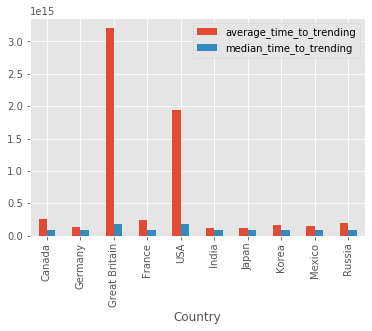

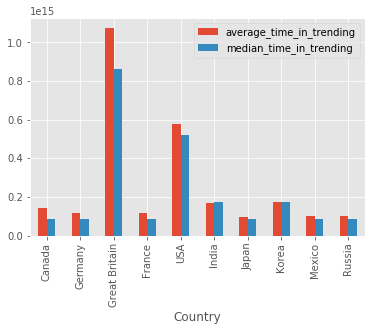

In [19]:
avg_time_to_trending = []
median_time_to_trending = []
avg_time_in_trending = []
median_time_in_trending = []

# For each country in the list of countries (defined above)
for c in countries:
    # Add median time until video makes it to trending by country
    median_time_to_trending.append(unique_videos[unique_videos.country == c].time_to_trending.median())
    avg_time_to_trending.append(unique_videos[unique_videos.country == c].time_to_trending.mean())
    median_time_in_trending.append(unique_videos[unique_videos.country == c].trending_time.median())
    avg_time_in_trending.append(unique_videos[unique_videos.country == c].trending_time.mean())
    
country_stats["average_time_to_trending"] = avg_time_to_trending
country_stats["median_time_to_trending"] = median_time_to_trending
country_stats["average_time_in_trending"] = avg_time_in_trending
country_stats["median_time_in_trending"] = median_time_in_trending
country_stats

# Currently, something is fucked up with the plots, because y-axis values are wrong
country_stats.plot.bar(x="Country", y=["average_time_to_trending", "median_time_to_trending"])
country_stats.plot.bar(x="Country", y=["average_time_in_trending", "median_time_in_trending"])

In [104]:
#Most popular attributes for all data
print('\033[1m' + "Categories" + '\033[0m') # '\033[1m' is bold, '\033[0m' is the end
all_data.category.value_counts() #most popular categories
print('\033[1m' + "Channels")
all_data.channel_title.value_counts().head(20) #Most popular channels

#Most popular tags
print('\033[1m' + "Tags")
tags=[]
for a in all_data.tags:
    for tag in str(a).split(','):
        tags.append(tag)
df = pd.DataFrame(tags,columns=['tags'])
df.tags.value_counts().head(50)

#Biggest views
print('\033[1m' + "Views")
biggestViews = all_data.views.nlargest(500) #500 biggest viewed videos
views = []
for i in range(len(biggestViews)):
    views.append(all_data.loc[biggestViews.index[i]])
views=pd.DataFrame(views) #all 500 videos in dataframe

unique_views = views.video_id.unique() #unique video ids from 500 videos
biggestViews20 = []
for i in range(20):
    biggestViews20.append(views[views.video_id==unique_views[i]].iloc[0]) #find the first video with such id
biggestViews20 = pd.DataFrame(biggestViews20)
biggestViews20["likes/all"] = biggestViews20.likes/(biggestViews20.likes+biggestViews20.dislikes)
biggestViews20["dislikes/all"] = biggestViews20.dislikes/(biggestViews20.likes+biggestViews20.dislikes)
biggestViews20 #first 20 unique video with biggest views

#Biggest amount of likes
print('\033[1m' + "Likes")
biggestLikes = all_data.likes.nlargest(500) #500 most liked videos
likes = []
for i in range(len(biggestLikes)):
    likes.append(all_data.loc[biggestLikes.index[i]])
likes=pd.DataFrame(likes) #all 500 videos in dataframe

unique_likes = likes.video_id.unique() #unique video ids from 500 videos
biggestLikes20 = []
for i in range(20):
    biggestLikes20.append(likes[likes.video_id==unique_likes[i]].iloc[0]) #find the first video with such id
biggestLikes20 = pd.DataFrame(biggestLikes20)
biggestLikes20["likes/all"] = biggestLikes20.likes/(biggestLikes20.likes+biggestLikes20.dislikes)
biggestLikes20["dislikes/all"] = biggestLikes20.dislikes/(biggestLikes20.likes+biggestLikes20.dislikes)
biggestLikes20 #first 20 unique video with most likes

#Biggest amount of dislikes
print('\033[1m' + "Dislikes")
biggestDislikes = all_data.dislikes.nlargest(500) #500 most disliked videos
dislikes = []
for i in range(len(biggestDislikes)):
    dislikes.append(all_data.loc[biggestDislikes.index[i]])
dislikes=pd.DataFrame(dislikes) #all 500 videos in dataframe

unique_dislikes = dislikes.video_id.unique() #unique video ids from 500 videos
biggestDislikes20 = []
for i in range(20):
    biggestDislikes20.append(dislikes[dislikes.video_id==unique_dislikes[i]].iloc[0]) #find the first video with such id
biggestDislikes20 = pd.DataFrame(biggestDislikes20)
biggestDislikes20["likes/all"] = biggestDislikes20.likes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
biggestDislikes20["dislikes/all"] = biggestDislikes20.dislikes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
biggestDislikes20 #first 20 unique video with most dislikes

#Biggest amount of comments
print('\033[1m' + "Comments")
biggestComments = all_data.comment_count.nlargest(500) #500 most commented videos
comments = []
for i in range(len(biggestComments)):
    comments.append(all_data.loc[biggestComments.index[i]])
comments=pd.DataFrame(comments) #all 500 videos in dataframe

unique_comments = comments.video_id.unique() #unique video ids from 500 videos
biggestComments20 = []
for i in range(20):
    biggestComments20.append(comments[comments.video_id==unique_comments[i]].iloc[0]) #find the first video with such id
biggestComments20 = pd.DataFrame(biggestComments20)
biggestComments20["likes/all"] = biggestComments20.likes/(biggestComments20.likes+biggestComments20.dislikes)
biggestComments20["dislikes/all"] = biggestComments20.dislikes/(biggestComments20.likes+biggestComments20.dislikes)
biggestComments20 #first 20 unique video with most comments

#Likes and dislikes rates
allLikesDislikes = all_data.copy() #calculating likes and dislikes rates
allLikesDislikes["likes/all"] = allLikesDislikes.likes/(allLikesDislikes.likes+allLikesDislikes.dislikes)
allLikesDislikes["dislikes/all"] = allLikesDislikes.dislikes/(allLikesDislikes.likes+allLikesDislikes.dislikes)

#Biggest likes over dislikes rate
print('\033[1m' + "Likes over dislikes")
likesDislikes=allLikesDislikes.copy()
#find where views are bigger than 100 000
likesDislikes=likesDislikes.where(likesDislikes["views"]>100000).sort_values(by=['likes/all','trending_date'],ascending=False) 
likesDislikes=likesDislikes.head(500)

unique_likesDislikes = likesDislikes.video_id.unique() #unique video ids from 500 videos
biggestlikesDislikes20 = []
for i in range(20):
    biggestlikesDislikes20.append(likesDislikes[likesDislikes.video_id==unique_likesDislikes[i]].iloc[0]) 
biggestlikesDislikes20 = pd.DataFrame(biggestlikesDislikes20)
biggestlikesDislikes20 #first 20 unique video with biggest likes/dislikes rate

#Biggest dislikes over likes rate
print('\033[1m' + "Dislikes over likes")
dislikesLikes=allLikesDislikes.copy()
#find where views are bigger than 100 000
dislikesLikes=dislikesLikes.where(dislikesLikes["views"]>100000).sort_values(by=['dislikes/all','trending_date'],ascending=False) 
dislikesLikes=dislikesLikes.head(500)

unique_dislikesLikes = dislikesLikes.video_id.unique() #unique video ids from 500 videos
biggestdislikesLikes20 = []
for i in range(20):
    biggestdislikesLikes20.append(dislikesLikes[dislikesLikes.video_id==unique_dislikesLikes[i]].iloc[0]) 
biggestdislikesLikes20 = pd.DataFrame(biggestdislikesLikes20)
biggestdislikesLikes20 #first 20 unique video with biggest dislikes/likes rate


Categories


Entertainment            109006
People & Blogs            54052
Music                     42514
News & Politics           37288
Comedy                    26970
Sports                    23684
Film & Animation          20932
Howto & Style             18856
Gaming                    11498
Science & Technology       8171
Education                  7788
Pets & Animals             4863
Autos & Vehicles           4734
Nonprofits & Activism      2795
Travel & Events            1776
Shows                       974
Movies                       36
Trailers                      5
Name: category, dtype: int64

Channels


The Late Show with Stephen Colbert        984
WWE                                       804
Late Night with Seth Meyers               773
VikatanTV                                 763
TheEllenShow                              743
Jimmy Kimmel Live                         707
The Tonight Show Starring Jimmy Fallon    705
PewDiePie                                 652
RadaanMedia                               651
The Late Late Show with James Corden      583
CNN                                       579
Netflix                                   566
FBE                                       555
MLG Highlights                            549
SET India                                 528
Screen Junkies                            494
ESPN                                      486
Marvel Entertainment                      482
BuzzFeedVideo                             481
Warner Bros. Pictures                     470
Name: channel_title, dtype: int64

Tags


nan              37699
funny            15075
comedy           12356
2018             11390
news              6415
music             5918
2017              5698
video             5640
humor             5058
television        4174
show              4158
review            4068
vlog              3979
Pop               3963
interview         3861
live              3809
food              3688
funny videos      3610
comedian          3601
tv                3453
trailer           3428
how to            3286
movie             3239
Comedy            3213
funny video       3211
entertainment     3076
rap               3072
new               2981
celebrity         2939
official          2888
celebrities       2883
talk show         2812
humour            2804
fun               2767
jokes             2745
hollywood         2706
film              2698
reaction          2685
challenge         2674
football          2662
late night        2592
youtube           2544
music video       2501
politics   

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
156905,9jI-z9QN6g8,2018-05-18,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,Music,2018-04-11 22:00:00,"Te Bote,Te Bote Remix,Flow La Movie,Ozuna,Nio ...",337621571,2581961,166549,113564,False,False,False,Flow La Movie Presenta - Te Boté Remix - Caspe...,Great Britain,0.939404,0.060596
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
143607,wfWkmURBNv8,2018-03-01,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,Music,2018-01-30 15:00:05,"Ozuna,Reggaeton,Odisea,Odisea The Album,Romeo ...",288811992,1618180,151147,67506,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,Great Britain,0.914574,0.085426
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
158168,zEf423kYfqk,2018-05-26,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,2018-04-20 10:40:51,"Becky G,Natti Natasha,Natti Natasha Music,Natt...",200862743,1668418,142569,97826,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,Great Britain,0.921276,0.078724
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
140620,sGIm0-dQd8M,2018-02-14,Dura - Daddy Yankee (Video Oficial),Daddy Yankee,Music,2018-01-18 22:32:49,"daddy yankee reggaeton,daddy yankee youtube,mu...",167456025,1633407,74005,65395,False,False,False,Dura - Daddy Yankee - nuevo video oficial 2018...,Great Britain,0.956657,0.043343


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
127229,kTlv5_Bs8aw,2017-12-07,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",54083634,2960250,57944,556154,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.980802,0.019198
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
128636,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",100672931,2701353,56313,368739,False,False,False,There was an idea… Avengers: Infinity War. In ...,Great Britain,0.979579,0.020421
156454,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29742824,2700801,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Great Britain,0.989253,0.010747


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
2898,pOHQdIDds6s,2017-11-28,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",12921578,448453,504340,168477,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Canada,0.470672,0.529328
143214,qtTM2YV3bI8,2018-02-27,Lucas Lucco e Pabllo Vittar - Paraíso,Lucas Lucco,Music,2018-01-28 23:41:31,"paraiso,lucas lucco,pabllo vittar,lucas lucco ...",54087829,1184184,421473,275795,False,False,False,Ouça e baixe Paraíso em todas as plataformas d...,Great Britain,0.737507,0.262493
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
76034,84LBjXaeKk4,2018-05-17,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",20929664,184529,361763,91466,False,False,False,Netta represented Israel at the Grand Final of...,Germany,0.337785,0.662215
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537
315047,ZGEoqPpJQLE,2018-02-28,FACE - Ð¯ Ð ÐžÐ�Ð¯Ð® Ð—Ð�ÐŸÐ�Ð” (prod. by Julo...,FACE,Music,2018-02-25 16:37:52,"#FACE #Ð¯Ð ÐžÐ�Ð¯Ð®Ð—Ð�ÐŸÐ�Ð”,Ñ„ÐµÐ¹Ñ�,Ð±ÑƒÑ€Ð...",3209893,123077,270121,56272,False,False,False,FOLLOW:\nvk.com/face\ninstagram.com/facepublic...,Russia,0.313015,0.686985
132430,LFhT6H6pRWg,2018-01-02,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1348067,10576,258504,33809,False,False,False,Ajit Pai has been at the heart of the net neut...,Great Britain,0.039304,0.960696


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
126802,kTlv5_Bs8aw,2017-12-05,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",48759109,2901830,54630,559197,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.981522,0.018478
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
314825,51wobJ4jOU4,2018-02-27,Ð Ð°Ñ�Ð¿Ð°ÐºÐ¾Ð²ÐºÐ° Samsung Galaxy S9+,Wylsacom,Science & Technology,2018-02-25 17:01:22,"iPhone,Apple,wylsa,Wylsacom,galaxy,Ñ€Ð°Ñ�Ð¿Ð°Ð...",2606405,535682,10490,523855,False,False,False,Ð’Ñ‹Ð¸Ð³Ñ€Ð°Ð¹ Galaxy S9+ Ð½Ð° 64 GB:\n1. ÐŸÐ¾...,Russia,0.980794,0.019206
144437,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672433,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Great Britain,0.989233,0.010767
34599,32sYGCOYJUM,2018-05-14,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",29662624,827026,135931,445251,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Canada,0.858840,0.141160
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
161317,N1HAMUAXzbs,2018-06-14,Kris Wu – Like That (Official Music Video),Kris Wu,Music,2018-05-22 15:05:18,"Kris Wu,Wu Yi Fan,吴亦凡,fan shi,wuyifan,kw,kris,...",13799079.0,123856.0,0.0,10903.0,0.0,0.0,0.0,Special thanks to Stella Maxwell.Get “Like Tha...,Great Britain,1.000000,0.000000
303525,n_SuWOaNQMA,2017-12-30,Ð’Ð»Ð°Ñ�Ñ‚Ð¸ Ð¯Ð�Ð�Ðž ÑƒÑ�Ñ‚Ñ€Ð°Ð¸Ð²Ð°ÑŽÑ‚ Ð¼Ð...,Roman Max,People & Blogs,2017-12-29 07:27:29,"Ð¯Ð¼Ð°Ð»,Ð¯Ð�Ð�Ðž,Ð¼Ð¸Ñ‚Ð¸Ð½Ð³,ÐºÐ¾Ñ€Ñ€ÑƒÐ¿Ñ†Ð...",124706.0,1047.0,0.0,19.0,0.0,0.0,0.0,"Ð�Ð° Ð¯Ð¼Ð°Ð»Ðµ Ð»ÑŽÐ´Ð¸, Ñ�Ð²Ñ�Ð·Ð°Ð½Ð½Ñ‹Ðµ Ñ...",Russia,1.000000,0.000000
127220,xF9kTkjrHdQ,2017-12-07,Roberto Carlos vs France 1997,Saint,Sports,2011-02-03 14:07:55,"536282C,1",111834.0,13.0,0.0,1.0,0.0,0.0,0.0,,Great Britain,1.000000,0.000000
44017,KqNX5O1m9dc,2017-11-29,Star Wars: Die letzten Jedi - Kinospot: Das Er...,Star Wars Deutschland,Film & Animation,2017-11-28 16:26:36,"Star Wars,Kinospot,Filmclip,The Last Jedi,Die ...",841961.0,194.0,0.0,24.0,0.0,0.0,0.0,Die Saga geht weiter und die Zeit ist gekommen...,Germany,1.000000,0.000000
331431,apgEUxQGOHg,2018-05-27,Alone in the Game | AT&T AUDIENCE Network,Audience Network,Entertainment,2018-05-25 00:57:02,"AT&T,ATT,AT&T AUDIENCE,DirectTV,Direct TV,U-Ve...",564044.0,11688.0,1.0,2.0,0.0,0.0,0.0,Alone in the Game premieres Thursday June 28th...,Russia,0.999914,0.000086
219772,XdVhT60Loxg,2017-11-16,ìœ ì„¤(YUSEOL) - 'Ocean View' M/V Teaser,NEWPLAN ENTERTAINMENT,Music,2017-11-11 09:00:02,NaN,331219.0,10533.0,5.0,261.0,0.0,0.0,0.0,ìœ ì„¤(YUSEOL) - 'Ocean View' M/V Teaser\n\n#ì...,Korea,0.999526,0.000474
251776,PVrgn2oshDI,2018-06-03,180602 LOVE YOURSELF íŒ¬ì‹¸ì�¸íšŒ EUPHORIA / ë...,HEADLINER,Entertainment,2018-06-02 15:32:01,"JUNGKOOK,ì •êµ­,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„,ì „...",134108.0,15749.0,10.0,382.0,0.0,0.0,0.0,HDLNR FILM by HEADLINER- í—¤ë“œë�¼ì�´ë„ˆ ì±„ë„...,Korea,0.999365,0.000635
222543,_9SguIVvAaE,2017-12-02,[BT21] Animated Stickers - UNIVERSTAR #2,BT21,People & Blogs,2017-11-30 09:44:53,"BT21,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„,ì•„ë¯¸,ARMY,A....",172931.0,32763.0,23.0,1108.0,0.0,0.0,0.0,The Scene Stealer!\n\nDownload on LINE ðŸ“± ðŸ...,Korea,0.999298,0.000702
60030,T99oRpCsLtc,2018-02-19,[MIXTAPE] I.M - Fly With Me (Teaser),starshipTV,Music,2018-02-18 12:00:01,"몬스타엑스,몬엑,몬베베,몬스타,아이엠,믹스테잎,믹테,플라이위드미,뮤비,티저,셔누,원...",127877.0,35338.0,25.0,2829.0,0.0,0.0,0.0,스타쉽 엔터테인먼트 STARSHIP ENTERTAINMENT\nArtist : 몬스...,Germany,0.999293,0.000707
220253,CTTQG7A_ScU,2017-11-19,[BT21] Making of BT21 - EP.10,BT21,People & Blogs,2017-11-17 09:54:31,"Making,episode,BT21,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„...",291387.0,33576.0,26.0,926.0,0.0,0.0,0.0,"Stars of tomorrow, Universtar BT21, created by...",Korea,0.999226,0.000774


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
269863,D8S7yuE4eIY,2018-02-04,ATLAS 2 - 1 CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LI...,ViralFutbolHD,Sports,2018-02-03 06:31:18,NaN,144137.0,1.0,140.0,5.0,0.0,0.0,0.0,ATLAS VS CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LIGA ...,Mexico,0.007092,0.992908
309870,pay0OHVh3L0,2018-02-02,Ð¢Ñ€ÐµÐ¹Ð»ÐµÑ€ Ð¿Ñ€ÐµÑ�ÐºÐ¾Ð½Ñ„ÐµÑ€ÐµÐ½Ñ†Ð¸Ð¸ ...,Ð¡Ð¾Ð²Ñ€ÐµÐ¼ÐµÐ½Ð½Ð°Ñ� ÐšÐ¾Ð¼Ð¼ÑƒÐ½Ð°,People & Blogs,2018-02-01 06:01:23,"Ð³Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½,Ð³Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½2018,Ð·Ð°Ð³Ñ€...",252243.0,47.0,3128.0,513.0,0.0,0.0,0.0,NaN,Russia,0.014803,0.985197
210897,_NIULCv8yMc,2018-04-25,æ³°è‘‰ã�‹ã‚‰ã�®ã�ŠçŸ¥ã‚‰ã�›ã�§ã�™,æ³°è‘‰ã‚¨ãƒ³ã‚¿ãƒ¼ãƒ†ã‚¤ãƒ¡ãƒ³ãƒˆ,Music,2018-04-23 22:32:07,æ³°è‘‰,105447.0,129.0,5083.0,0.0,1.0,0.0,0.0,ã�¿ã�ªã�•ã�¾ã�„ã�¤ã‚‚å¿œæ�´ã�‚ã‚Šã�Œã�¨ã�†ã�”ã...,Japan,0.024751,0.975249
306061,mXy8kiFUb4I,2018-01-14,"Ð®Ð»Ð¸Ð¹ ÐžÐ½ÐµÑˆÐºÐ¾, Ñ�Ñ‚Ð¾ Ð²Ð¸Ð´ÐµÐ¾ Ð´Ð»Ñ...",Dasha Day,People & Blogs,2018-01-13 07:26:04,"ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ�,ÑŽÐ¼Ð¾Ñ€,Ñ�Ð¼ÐµÑˆÐ½Ð¾,Ð±Ð»Ð¾Ð³,...",223493.0,2547.0,99863.0,9090.0,0.0,0.0,0.0,"Ð®Ð»Ð¸Ð¹ ÐžÐ½ÐµÑˆÐºÐ¾, Ñ�Ñ‚Ð¾ Ð²Ð¸Ð´ÐµÐ¾ Ð´Ð»Ñ...",Russia,0.024871,0.975129
307095,tsijLVXpPNg,2018-01-19,Ð ÐµÐ°Ð»Ð¸Ñ‚Ð¸ ÑˆÐ¾Ñƒ Ð˜Ð³Ñ€Ð° Ð·Ð° ÐŸÑ€ÐµÑ�Ñ‚...,ÐŸÐ¸Ñ€Ð°Ð¼Ð¸Ð´Ð° ÐšÐ¾Ð·Ð»Ð¾Ñƒ,People & Blogs,2018-01-18 08:50:36,"Ð’Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð’Ñ‹Ð±Ð¾Ñ€Ñ‹ ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ð°...",104173.0,84.0,3232.0,100.0,0.0,0.0,0.0,ÐšÐ°Ð½Ð´Ð¸Ð´Ð°Ñ‚ Ð² ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ñ‹ Ð Ð¤ ...,Russia,0.025332,0.974668
307472,EQrof-5Waag,2018-01-21,Ð—Ð° Ñ�ÐºÐ¾Ð»ÑŒÐºÐ¾ Ð“Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½ Ð¿Ñ€Ð¾Ð´Ð...,Ð›ÐµÐ²Ð¾Ð¹ Ð¿Ñ€Ð°Ð²Ð¾Ð™,People & Blogs,2018-01-19 16:42:54,"Ð³Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½,ÐºÐ¿Ñ€Ñ„,Ð²Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð¿Ð¾Ð»Ð...",135182.0,447.0,14918.0,1930.0,0.0,0.0,0.0,NaN,Russia,0.029092,0.970908
308547,yZTxKkGrIL4,2018-01-26,ÐžÐ¡Ð¢ÐžÐ ÐžÐ–Ð�Ðž ÐœÐžÐ¨Ð•Ð�Ð�Ð˜ÐšÐ˜ Ð½Ð° Ñ‚Ð...,Ð˜Ð³Ñ€Ð° Ð·Ð° ÐŸÑ€ÐµÑ�Ñ‚Ð¾Ð»,People & Blogs,2018-01-25 05:01:19,"Ð²Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð¼Ð¸Ñ…Ð°Ð¸Ð» ÐºÐ¾Ð·Ð»Ð¾Ð²,Ð¿Ñ€ÐµÐ...",109028.0,24.0,705.0,64.0,0.0,0.0,0.0,ÐšÐ°Ð½Ð´Ð¸Ð´Ð°Ñ‚ Ð² ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ñ‹ ÐœÐ¸Ñ...,Russia,0.032922,0.967078
307652,dyD3ryhnn_4,2018-01-22,ÐžÑ‚Ñ‡Ñ‘Ñ‚ Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ð¾Ð³Ð¾ Ð¿ÐµÑ€ÐµÐ´ Ñ�Ð...,Ð�Ñ€Ñ‚ÐµÐ¼ Ð—Ð°Ñ…Ð°Ñ€Ð¾Ð²,People & Blogs,2018-01-21 05:36:24,"Ð®Ð¼Ð¾Ñ€,Ñ�Ð¼ÐµÑˆÐ½Ð¾,Ñ€ÑƒÐºÐ¸ Ð±Ð°Ð·ÑƒÐºÐ¸,Ñˆ...",191804.0,1544.0,43758.0,1446.0,0.0,0.0,0.0,NaN,Russia,0.034082,0.965918
6216,LFhT6H6pRWg,2017-12-15,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",649781.0,5505.0,140080.0,16730.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,Canada,0.037813,0.962187
306884,FVxoMfzsIZQ,2018-01-18,Ð¢Ñ€ÐµÐ¹Ð»ÐµÑ€ Ñ�ÐµÐ½Ñ�Ð°Ñ†Ð¸Ð¾Ð½Ð½Ð¾Ð³Ð¾ Ñ€Ðµ...,ÐŸÐ¸Ñ€Ð°Ð¼Ð¸Ð´Ð° ÐšÐ¾Ð·Ð»Ð¾Ñƒ,People & Blogs,2018-01-16 07:20:17,"Ð’Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð’Ñ‹Ð±Ð¾Ñ‹ ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ð°,Ð...",219644.0,1627.0,38985.0,1253.0,0.0,0.0,0.0,Ð ÐµÐ°Ð»ÑŒÐ½Ñ‹Ð¹ ÐºÐ°Ð½Ð´Ð¸Ð´Ð°Ñ‚ Ð¿Ñ�Ð¸Ñ…Ð¾Ð»...,Russia,0.040062,0.959938


In [111]:
#Most popular attributes for each country separately
countries = ["Canada", "Germany", "Great Britain", "France", "USA", "India", "Japan", "Korea", "Mexico", "Russia"]
for c in countries:
    country_data = all_data[all_data['country']==c]
    print('\033[1m' + c)
    print('\033[1m' + "Categories" + '\033[0m') # '\033[1m' is bold, '\033[0m' is the end
    country_data.category.value_counts() #most popular categories
    print('\033[1m' + "Channels")
    country_data.channel_title.value_counts().head(20) #Most popular channels

    #Most popular tags
    print('\033[1m' + "Tags")
    tags=[]
    for a in country_data.tags:
        for tag in str(a).split(','):
            tags.append(tag)
    df = pd.DataFrame(tags,columns=['tags'])
    df.tags.value_counts().head(50)

    #Biggest views
    print('\033[1m' + "Views")
    biggestViews = country_data.views.nlargest(500) #500 biggest viewed videos
    views = []
    for i in range(len(biggestViews)):
        views.append(country_data.loc[biggestViews.index[i]])
    views=pd.DataFrame(views) #all 500 videos in dataframe

    unique_views = views.video_id.unique() #unique video ids from 500 videos
    biggestViews20 = []
    for i in range(20):
        biggestViews20.append(views[views.video_id==unique_views[i]].iloc[0]) #find the first video with such id
    biggestViews20 = pd.DataFrame(biggestViews20)
    biggestViews20["likes/all"] = biggestViews20.likes/(biggestViews20.likes+biggestViews20.dislikes)
    biggestViews20["dislikes/all"] = biggestViews20.dislikes/(biggestViews20.likes+biggestViews20.dislikes)
    biggestViews20 #first 20 unique video with biggest views

    #Biggest amount of likes
    print('\033[1m' + "Likes")
    biggestLikes = country_data.likes.nlargest(500) #500 most liked videos
    likes = []
    for i in range(len(biggestLikes)):
        likes.append(country_data.loc[biggestLikes.index[i]])
    likes=pd.DataFrame(likes) #all 500 videos in dataframe

    unique_likes = likes.video_id.unique() #unique video ids from 500 videos
    biggestLikes20 = []
    for i in range(20):
        biggestLikes20.append(likes[likes.video_id==unique_likes[i]].iloc[0]) #find the first video with such id
    biggestLikes20 = pd.DataFrame(biggestLikes20)
    biggestLikes20["likes/all"] = biggestLikes20.likes/(biggestLikes20.likes+biggestLikes20.dislikes)
    biggestLikes20["dislikes/all"] = biggestLikes20.dislikes/(biggestLikes20.likes+biggestLikes20.dislikes)
    biggestLikes20 #first 20 unique video with most likes

    #Biggest amount of dislikes
    print('\033[1m' + "Dislikes")
    biggestDislikes = country_data.dislikes.nlargest(500) #500 most disliked videos
    dislikes = []
    for i in range(len(biggestDislikes)):
        dislikes.append(country_data.loc[biggestDislikes.index[i]])
    dislikes=pd.DataFrame(dislikes) #all 500 videos in dataframe

    unique_dislikes = dislikes.video_id.unique() #unique video ids from 500 videos
    biggestDislikes20 = []
    for i in range(20):
        biggestDislikes20.append(dislikes[dislikes.video_id==unique_dislikes[i]].iloc[0]) #find the first video with such id
    biggestDislikes20 = pd.DataFrame(biggestDislikes20)
    biggestDislikes20["likes/all"] = biggestDislikes20.likes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
    biggestDislikes20["dislikes/all"] = biggestDislikes20.dislikes/(biggestDislikes20.likes+biggestDislikes20.dislikes)
    biggestDislikes20 #first 20 unique video with most dislikes

    #Biggest amount of comments
    print('\033[1m' + "Comments")
    biggestComments = country_data.comment_count.nlargest(500) #500 most commented videos
    comments = []
    for i in range(len(biggestComments)):
        comments.append(country_data.loc[biggestComments.index[i]])
    comments=pd.DataFrame(comments) #all 500 videos in dataframe

    unique_comments = comments.video_id.unique() #unique video ids from 500 videos
    biggestComments20 = []
    for i in range(20):
        biggestComments20.append(comments[comments.video_id==unique_comments[i]].iloc[0]) #find the first video with such id
    biggestComments20 = pd.DataFrame(biggestComments20)
    biggestComments20["likes/all"] = biggestComments20.likes/(biggestComments20.likes+biggestComments20.dislikes)
    biggestComments20["dislikes/all"] = biggestComments20.dislikes/(biggestComments20.likes+biggestComments20.dislikes)
    biggestComments20 #first 20 unique video with most comments

    #Likes and dislikes rates
    allLikesDislikes = country_data.copy() #calculating likes and dislikes rates
    allLikesDislikes["likes/all"] = allLikesDislikes.likes/(allLikesDislikes.likes+allLikesDislikes.dislikes)
    allLikesDislikes["dislikes/all"] = allLikesDislikes.dislikes/(allLikesDislikes.likes+allLikesDislikes.dislikes)

    #Biggest likes over dislikes rate
    print('\033[1m' + "Likes over dislikes")
    likesDislikes=allLikesDislikes.copy()
    #find where views are bigger than 100 000
    likesDislikes=likesDislikes.where(likesDislikes["views"]>100000).sort_values(by=['likes/all','trending_date'],ascending=False) 
    likesDislikes=likesDislikes.head(500)

    unique_likesDislikes = likesDislikes.video_id.unique() #unique video ids from 500 videos
    biggestlikesDislikes20 = []
    for i in range(20):
        biggestlikesDislikes20.append(likesDislikes[likesDislikes.video_id==unique_likesDislikes[i]].iloc[0]) 
    biggestlikesDislikes20 = pd.DataFrame(biggestlikesDislikes20)
    biggestlikesDislikes20 #first 20 unique video with biggest likes/dislikes rate

    #Biggest dislikes over likes rate
    print('\033[1m' + "Dislikes over likes")
    dislikesLikes=allLikesDislikes.copy()
    #find where views are bigger than 100 000
    dislikesLikes=dislikesLikes.where(dislikesLikes["views"]>100000).sort_values(by=['dislikes/all','trending_date'],ascending=False) 
    dislikesLikes=dislikesLikes.head(500)

    unique_dislikesLikes = dislikesLikes.video_id.unique() #unique video ids from 500 videos
    biggestdislikesLikes20 = []
    for i in range(20):
        biggestdislikesLikes20.append(dislikesLikes[dislikesLikes.video_id==unique_dislikesLikes[i]].iloc[0]) 
    biggestdislikesLikes20 = pd.DataFrame(biggestdislikesLikes20)
    biggestdislikesLikes20 #first 20 unique video with biggest dislikes/likes rate
    



Canada
Categories


Entertainment            13451
News & Politics           4159
People & Blogs            4105
Comedy                    3773
Music                     3731
Sports                    2787
Film & Animation          2060
Howto & Style             2007
Gaming                    1344
Science & Technology      1155
Education                  991
Travel & Events            392
Pets & Animals             369
Autos & Vehicles           353
Shows                      124
Nonprofits & Activism       74
Movies                       6
Name: category, dtype: int64

Channels


SET India                             192
MSNBC                                 189
FBE                                   188
The Young Turks                       186
REACT                                 183
CNN                                   182
VikatanTV                             182
The Late Show with Stephen Colbert    172
ARY Digital                           168
RadaanMedia                           168
Philip DeFranco                       167
MLG Highlights                        165
Comment Awards                        163
BuzzFeedVideo                         160
Good Mythical Morning                 157
CollegeHumor                          153
TheEllenShow                          150
Breakfast Club Power 105.1 FM         149
The View                              149
Late Night with Seth Meyers           148
Name: channel_title, dtype: int64

Tags


funny              3416
comedy             2432
nan                2386
news               1452
2018               1147
video              1034
politics           1010
humor               959
food                915
review              911
music               875
reaction            854
2017                767
family friendly     764
talk show           757
interview           750
comedian            730
donald trump        693
News                675
trump               660
funny videos        655
react               637
Donald Trump        634
television          627
how to              622
nba                 618
entertainment       594
science             593
basketball          582
sports              575
jokes               569
podcast             547
celebrity           546
hollywood           544
movie               543
show                539
family              530
game                520
Entertainment       518
Comedy              516
rap                 506
animation       

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
5900,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",137843120,3014479,1602383,817582,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.652928,0.347072
34361,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",98938809,3037318,161813,319502,False,False,False,“This is America” by Childish Gambino http://s...,Canada,0.949420,0.050580
4699,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606665,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,Canada,0.980069,0.019931
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
22029,_I_D_8Z4sJE,2018-03-06,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",61163906,629164,23851,26762,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Canada,0.963476,0.036524
1712,TyHvyGVs42U,2017-11-22,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",56843038,1904853,87444,108084,False,False,False,“Échame La Culpa” disponible ya en todas las p...,Canada,0.956109,0.043891
31796,u9Mv98Gr5pY,2018-04-30,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",53071887,1243479,44414,134673,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Canada,0.965514,0.034486
17237,BhIEIO0vaBE,2018-02-10,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",51243149,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Canada,NaN,NaN
39208,aJOTlE1K90k,2018-06-06,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",47778378,2178332,36133,128810,False,False,False,Girls Like You” is out now.http://smarturl.it/...,Canada,0.983683,0.016317
20055,xpVfcZ0ZcFM,2018-02-24,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",47362934,2469057,31843,158262,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Canada,0.987267,0.012733


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
34361,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",98938809,3037318,161813,319502,False,False,False,“This is America” by Childish Gambino http://s...,Canada,0.949420,0.050580
5900,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",137843120,3014479,1602383,817582,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.652928,0.347072
4699,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606665,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,Canada,0.980069,0.019931
2873,kTlv5_Bs8aw,2017-11-28,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",27670973,2542863,41122,519092,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Canada,0.984086,0.015914
20055,xpVfcZ0ZcFM,2018-02-24,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",47362934,2469057,31843,158262,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Canada,0.987267,0.012733
33633,p8npDG2ulKQ,2018-05-09,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",18574625,2407419,21907,340125,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Canada,0.990982,0.009018
21466,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392594,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Canada,0.990941,0.009059
30900,ffxKSjUwKdU,2018-04-25,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",45998071,2195120,78228,192685,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Canada,0.965589,0.034411
39208,aJOTlE1K90k,2018-06-06,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",47778378,2178332,36133,128810,False,False,False,Girls Like You” is out now.http://smarturl.it/...,Canada,0.983683,0.016317


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
5900,FlsCjmMhFmw,2017-12-13,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",137843120,3014479,1602383,817582,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.652928,0.347072
2898,pOHQdIDds6s,2017-11-28,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",12921578,448453,504340,168477,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Canada,0.470672,0.529328
14852,oWjxSkJpxFU,2018-01-29,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",22387656,1919980,461660,625010,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Canada,0.806159,0.193841
305,PRlmRnU9qts,2017-11-15,Jake Paul - Saturday Night (Song) feat. Nick C...,Jake Paul,People & Blogs,2017-11-12 00:26:46,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",5156718,198368,200391,74776,False,False,False,😃 SUBSCRIBE ► http://bit.ly/SUB2JAKEPAUL | ★ P...,Canada,0.497463,0.502537
6686,LFhT6H6pRWg,2017-12-17,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",961961,7955,190227,24116,False,False,False,Ajit Pai has been at the heart of the net neut...,Canada,0.040140,0.959860
35970,ooyjaVdt-jA,2018-05-21,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",7576267,301840,174645,122659,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,Canada,0.633472,0.366528
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
20325,V5cOvyDpWfM,2018-02-25,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",19890243,53817,164693,60921,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,Canada,0.246291,0.753709
8769,Tz50vEX0nwE,2017-12-27,Объявляем забастовку избирателей,Алексей Навальный,Nonprofits & Activism,2017-12-25 14:28:08,"Навальный,Навальный2018,ЦИК,Панфилова,Отказ,От...",2226879,247289,163586,84945,False,False,False,Алексея Навального незаконно не допустили до в...,Canada,0.601859,0.398141
35735,xBht9TG7ySw,2018-05-20,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,2018-05-15 12:13:00,"Race 3,Race 3 Official Trailer,Salman Khan,Rem...",24523092,525575,162731,88851,False,False,False,Jo dikhta hai woh hamesha sach nahi hota! The ...,Canada,0.763578,0.236422


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
36453,7C2z4GqqS5E,2018-05-23,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",80738011,5053338,165854,1114800,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Canada,0.968222,0.031778
4996,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251826,1127811,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Canada,0.666292,0.333708
14852,oWjxSkJpxFU,2018-01-29,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",22387656,1919980,461660,625010,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Canada,0.806159,0.193841
2873,kTlv5_Bs8aw,2017-11-28,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",27670973,2542863,41122,519092,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Canada,0.984086,0.015914
34599,32sYGCOYJUM,2018-05-14,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",29662624,827026,135931,445251,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Canada,0.858840,0.141160
21466,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392594,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Canada,0.990941,0.009059
29241,FhllRWReNEE,2018-04-17,Melting Every Lipstick From Sephora Together,Safiya Nygaard,People & Blogs,2018-04-14 19:55:26,"melting every lipstick from sephora together,m...",5534178,335949,6707,349112,False,False,False,We melted one of every lipstick from Sephora t...,Canada,0.980426,0.019574
4699,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606665,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,Canada,0.980069,0.019931
33633,p8npDG2ulKQ,2018-05-09,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",18574625,2407419,21907,340125,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Canada,0.990982,0.009018
34361,VYOjWnS4cMY,2018-05-13,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",98938809,3037318,161813,319502,False,False,False,“This is America” by Childish Gambino http://s...,Canada,0.949420,0.050580


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
33206,nByvlE7y71Q,2018-05-07,THE POPULAR DANCE TUTORIALS OF 90s-CURRENT W/B...,JaeSix,People & Blogs,2018-05-06 15:00:07,"Jae,Jae Park,Jae Hyung Park,박제형,데이식스,JYP,JYPE,...",165176.0,34756.0,28.0,4429.0,0.0,0.0,0.0,I DON'T KNOW WHY I'M WRITING IN CAPS BUT EVERY...,Canada,0.999195,0.000805
32215,PMEkmiQP5bg,2018-05-02,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2942269.0,688754.0,687.0,61516.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Canada,0.999004,0.000996
35790,udAQmQ7W0Q8,2018-05-20,BTS Dish About Debuting New Music At The 2018 ...,Access,Entertainment,2018-05-18 16:09:39,"Access,bts jimin,rm,bts kpop,billboard music a...",189531.0,16371.0,20.0,737.0,0.0,0.0,0.0,BTS sits with Access' Scott Evans and dish abo...,Canada,0.998780,0.001220
13374,_N6QovHPQmo,2018-01-21,Sing Anything Challenge ( w/Jess and Gabriel C...,Jacko Brazier,Entertainment,2018-01-20 22:23:21,"comedy,Jacko brazier,jess conte,gabriel xonte,...",138532.0,13799.0,17.0,778.0,0.0,0.0,0.0,Well... this was a bad idea..\n\n* vomit warni...,Canada,0.998770,0.001230
6771,tb-dW5x2DAc,2017-12-17,BTS Tell Us What They Love About Each Other & ...,AskAnythingChat,Music,2017-12-16 13:12:08,"AskAnythingChat,Ask Anything Chat,Live Chat,Li...",324230.0,31439.0,40.0,2575.0,0.0,0.0,0.0,BTS Tell Us What They Love About Each Other & ...,Canada,0.998729,0.001271
14448,1Cj8d6EcFp0,2018-01-27,The Adventure Zone: Balance trailer,MBMBaM,Entertainment,2018-01-25 22:20:25,"mbmbam,my brother my brother and me,comedy pod...",124681.0,16317.0,24.0,850.0,0.0,0.0,0.0,Listen to The Adventure Zone now: https://itun...,Canada,0.998531,0.001469
40781,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,방탄소년단,bts festa v jin,v jin hwarang ost,hw...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,Canada,0.998524,0.001476
35328,MWb2vazaD28,2018-05-18,BTS On Their Favorite Body Parts & Their Fan-O...,Access,Entertainment,2018-05-17 23:35:18,"Access,hollywood,access hollywood,music,k-pop,...",262771.0,42936.0,66.0,3772.0,0.0,0.0,0.0,BTS loves their devoted fans. The boy band tel...,Canada,0.998465,0.001535
9960,S9TdkoI7-mA,2018-01-02,인피니트(INFINITE) Tell Me MV Teaser (Short ver.),woolliment,Entertainment,2018-01-01 15:00:02,"인피니트,INFINITE,TOP SEED,TELL ME,성규,동우,우현,성열,엘,성종",195269.0,33774.0,52.0,4351.0,0.0,0.0,0.0,"If you like this Video, Plz click LIKE and SUB...",Canada,0.998463,0.001537
4386,3tU8ad5Sosk,2017-12-05,The Guys Go Camping,SuperMega,Comedy,2017-12-03 16:00:00,"supermega,super mega,super mega show,supermega...",120208.0,15331.0,24.0,998.0,0.0,0.0,0.0,Here's a short little thing we threw together ...,Canada,0.998437,0.001563


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
6216,LFhT6H6pRWg,2017-12-15,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",649781.0,5505.0,140080.0,16730.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,Canada,0.037813,0.962187
6229,8d_202l55LU,2017-12-15,The FCC repeals its net neutrality rules,Washington Post,News & Politics,2017-12-14 18:49:06,"fcc net neutrality,breaking news video,video u...",985179.0,4870.0,110709.0,19843.0,0.0,0.0,0.0,Federal regulators vote to allow Internet prov...,Canada,0.042136,0.957864
24901,0m4RQ_wOXCk,2018-03-20,Cirque Du Soleil Performer Falls To His Death ...,Wochit News,News & Politics,2018-03-19 00:47:09,"Cirque du Soleil,Instagram,Florida,Death,Time,...",198215.0,33.0,554.0,20.0,0.0,0.0,0.0,"Cirque du Soleil said on Sunday, an experience...",Canada,0.056218,0.943782
6247,8I_NkJ8VTEI,2017-12-15,Judge Roy Moore Campaign Statement,Roy Moore for Senate,People & Blogs,2017-12-14 03:04:05,NaN,603783.0,3307.0,46779.0,0.0,1.0,0.0,0.0,"December 13, 2017 | Montgomery, Alabama",Canada,0.066026,0.933974
6567,0OMx2rinpbI,2017-12-16,FCC Has Voted To Repeal Net Neutrality | TIME,TIME,News & Politics,2017-12-14 17:35:55,"fcc net neutrality,net neutrality,fcc,internet...",349669.0,1288.0,17657.0,111.0,0.0,0.0,0.0,The landmark Federal Communications Commission...,Canada,0.067986,0.932014
19789,l8B5dqjsZUs,2018-02-23,Reboot: The Guardian Code Official Trailer,ReBoot: The Guardian Code,Film & Animation,2018-02-22 00:54:24,"ReBoottgc,Netflix,NetflixKids,Mainframe,Rainma...",140413.0,436.0,5630.0,2306.0,0.0,0.0,0.0,It’s official! We are excited to share a sneak...,Canada,0.071876,0.928124
19145,Kp0cKMxlFWg,2018-02-20,French Figure Skater Finishes Despite Wardrobe...,Wochit Entertainment,Sports,2018-02-19 14:58:17,"Figure skating,Nightmare,Gabriella Papadakis,C...",553655.0,162.0,1276.0,83.0,0.0,0.0,0.0,Gabriella Papadakis suffered a figure skating ...,Canada,0.112656,0.887344
19506,Z25jDxWVIEc,2018-02-21,JO 2018 : Oups ! La patineuse Gabriella Papada...,Closer,People & Blogs,2018-02-19 12:52:03,"insolite,yt,closer",220550.0,140.0,1047.0,142.0,0.0,0.0,0.0,Le programme court de Gabriella Papadakis et G...,Canada,0.117944,0.882056
10381,p80Ltsq8l9o,2018-01-04,LOGAN PAUL FINDS DEAD MAN (DELETED VIDEO),Thenewlorayo,Entertainment,2018-01-02 22:22:04,NaN,159710.0,228.0,1345.0,136.0,0.0,0.0,0.0,"hes a fucking moron, so is his stupid little b...",Canada,0.144946,0.855054
22590,AKfU_lzEnWw,2018-03-09,Копия видео 8 марта 2018 г.,Serghei Arhirii,People & Blogs,2018-03-08 11:14:53,NaN,186044.0,648.0,3651.0,197.0,0.0,0.0,0.0,NaN,Canada,0.150733,0.849267


Germany
Categories


Entertainment            15292
People & Blogs            5988
News & Politics           2935
Sports                    2752
Comedy                    2534
Film & Animation          2376
Music                     2372
Howto & Style             1745
Gaming                    1565
Autos & Vehicles           873
Education                  844
Science & Technology       806
Nonprofits & Activism      256
Pets & Animals             251
Travel & Events            141
Shows                      107
Movies                       2
Trailers                     1
Name: category, dtype: int64

Channels


Galileo                               200
Ruhrpottwache                         185
Анатолий Шарий                        182
Auf Streife                           180
Çukur                                 180
atv                                   179
Promiflash                            172
JP Performance                        159
The Daily Show with Trevor Noah       140
Söz Dizi                              140
Adını Sen Koy                         134
Klinik am Südring                     133
Россия 24                             131
Made My Day                           130
VikatanTV                             130
Esra Erol'da                          127
Sallys Welt                           126
The Late Show with Stephen Colbert    126
Beni Affet                            125
World Wide Wohnzimmer                 123
Name: channel_title, dtype: int64

Tags


nan                   3031
2018                  1399
funny                 1232
comedy                1192
deutsch               1122
TV                    1064
tv                     911
german                 734
2017                   722
news                   708
atv                    689
dizi                   671
lustig                 645
music                  585
rap                    565
Deutschland            560
star tv                512
essen                  509
Comedy                 506
Reality TV             505
humor                  497
review                 496
SAT.1                  493
video                  490
Highlights             478
diy                    476
yeni dizi              453
challenge              445
DIY                    441
hd                     420
comedian               413
AfD                    411
vlog                   410
youtube                397
tricks                 395
show                   390
kochen                 389
F

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
46336,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811217,1470386,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.656580,0.343420
44943,6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",80360459,2513103,49170,335920,False,False,False,There was an idea… Avengers: Infinity War. In ...,Germany,0.980810,0.019190
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
74985,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Germany,0.952255,0.047745
62772,_I_D_8Z4sJE,2018-03-05,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",50896717,550476,20865,23521,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Germany,0.963481,0.036519
72276,u9Mv98Gr5pY,2018-04-28,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",49185287,1204863,42254,130891,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Germany,0.966119,0.033881
57917,BhIEIO0vaBE,2018-02-09,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",48635732,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Germany,NaN,NaN
64610,-BQJo3vK8O8,2018-03-14,Maluma - El Préstamo (Official Video),MalumaVEVO,Music,2018-03-09 11:00:01,"Maluma Music,Maluma Official Video,Maluma Vide...",44725448,575878,48583,28152,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,Germany,0.922200,0.077800
65932,QwievZ1Tx-8,2018-03-21,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",42862117,1465000,28312,182514,False,False,False,In theaters April 27. Get your tickets now: ht...,Germany,0.981041,0.018959
71537,ffxKSjUwKdU,2018-04-24,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",39530559,2068564,72572,185944,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Germany,0.966106,0.033894


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
46336,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811217,1470386,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.656580,0.343420
44943,6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",80360459,2513103,49170,335920,False,False,False,There was an idea… Avengers: Infinity War. In ...,Germany,0.980810,0.019190
74985,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,“This is America” by Childish Gambino http://s...,Germany,0.952255,0.047745
43661,kTlv5_Bs8aw,2017-11-27,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",24628712,2454901,37133,502471,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Germany,0.985099,0.014901
74303,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285426,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Germany,0.991583,0.008417
60625,xpVfcZ0ZcFM,2018-02-22,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",33591858,2152153,24525,140517,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Germany,0.988733,0.011267
71537,ffxKSjUwKdU,2018-04-24,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",39530559,2068564,72572,185944,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Germany,0.966106,0.033894
62164,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050551,14714,387391,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Germany,0.992875,0.007125
55605,oWjxSkJpxFU,2018-01-28,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",21104436,1867615,435190,607646,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Germany,0.811017,0.188983


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
46336,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811217,1470386,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.656580,0.343420
55605,oWjxSkJpxFU,2018-01-28,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",21104436,1867615,435190,607646,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Germany,0.811017,0.188983
76034,84LBjXaeKk4,2018-05-17,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",20929664,184529,361763,91466,False,False,False,Netta represented Israel at the Grand Final of...,Germany,0.337785,0.662215
43275,pOHQdIDds6s,2017-11-25,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",8834904,386849,350118,156609,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Germany,0.524920,0.475080
77646,HfRZ67HSDdA,2018-05-25,"Тимати feat. Егор Крид - Гучи (премьера клипа,...",Тимати,Music,2018-05-22 09:12:47,"тимати,timati,black star,Егор Крид,где ты где ...",11026129,457218,216944,59106,False,False,False,Слушай и скачивай трек «Гучи»: https://black-s...,Germany,0.678202,0.321798
61621,ZGEoqPpJQLE,2018-02-27,FACE - Я РОНЯЮ ЗАПАД (prod. by JuloOntheTrack),FACE,Music,2018-02-25 16:37:52,#FACE #ЯРОНЯЮЗАПАД,2386955,105530,199587,39185,False,False,False,FOLLOW:\nvk.com/face\ninstagram.com/facepublic...,Germany,0.345867,0.654133
76965,ooyjaVdt-jA,2018-05-21,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",7576267,301840,174645,122659,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,Germany,0.633472,0.366528
49549,Tz50vEX0nwE,2017-12-27,Объявляем забастовку избирателей,Алексей Навальный,Nonprofits & Activism,2017-12-25 14:28:08,"Навальный,Навальный2018,ЦИК,Панфилова,Отказ,От...",2226879,247289,163586,84945,False,False,False,Алексея Навального незаконно не допустили до в...,Germany,0.601859,0.398141
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
50868,SUMFmOpFw7w,2018-01-02,Новогоднее обращение Алексея Навального,Алексей Навальный,Nonprofits & Activism,2017-12-31 11:55:06,"Навальный,Обращение,Новогоднее обращение 2017,...",1628572,187475,149738,34973,False,False,False,Новогоднее обращение Алексея Навального. Включ...,Germany,0.555954,0.444046


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
77172,7C2z4GqqS5E,2018-05-22,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",73463137,4924056,156026,1084435,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Germany,0.969287,0.030713
45885,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251819,1127810,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Germany,0.666292,0.333708
55291,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782257,398360,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Germany,0.817318,0.182682
61493,51wobJ4jOU4,2018-02-27,Распаковка Samsung Galaxy S9+,Wylsacom,Science & Technology,2018-02-25 17:01:22,"iPhone,Apple,wylsa,Wylsacom,galaxy,распаковка,...",2606405,535674,10490,523850,False,False,False,Выиграй Galaxy S9+ на 64 GB:\n1. Подпишись на ...,Germany,0.980793,0.019207
43661,kTlv5_Bs8aw,2017-11-27,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",24628712,2454901,37133,502471,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Germany,0.985099,0.014901
75359,32sYGCOYJUM,2018-05-13,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,Music,2018-05-11 17:00:47,"chạy ngay đi mv,chạy ngay đi,chay ngay di mv,c...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...,Germany,0.863647,0.136353
62164,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",10695328,2050551,14714,387391,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Germany,0.992875,0.007125
44943,6ZfuNTqbHE8,2017-12-04,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",80360459,2513103,49170,335920,False,False,False,There was an idea… Avengers: Infinity War. In ...,Germany,0.980810,0.019190
74303,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285426,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Germany,0.991583,0.008417
81263,PM47LAAT3j8,2018-06-12,EL SECUESTRO - ESPECIAL 8 MILLONES,AuronPlay,Comedy,2018-06-11 16:22:24,NaN,2497718,421493,5431,315801,False,False,False,PARTICIPA AQUÍ: https://goo.gl/ZkKBWg ES UN SO...,Germany,0.987279,0.012721


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
44017,KqNX5O1m9dc,2017-11-29,Star Wars: Die letzten Jedi - Kinospot: Das Er...,Star Wars Deutschland,Film & Animation,2017-11-28 16:26:36,"Star Wars,Kinospot,Filmclip,The Last Jedi,Die ...",841961.0,194.0,0.0,24.0,0.0,0.0,0.0,Die Saga geht weiter und die Zeit ist gekommen...,Germany,1.000000,0.000000
60030,T99oRpCsLtc,2018-02-19,[MIXTAPE] I.M - Fly With Me (Teaser),starshipTV,Music,2018-02-18 12:00:01,"몬스타엑스,몬엑,몬베베,몬스타,아이엠,믹스테잎,믹테,플라이위드미,뮤비,티저,셔누,원...",127877.0,35338.0,25.0,2829.0,0.0,0.0,0.0,스타쉽 엔터테인먼트 STARSHIP ENTERTAINMENT\nArtist : 몬스...,Germany,0.999293,0.000707
74208,nByvlE7y71Q,2018-05-07,THE POPULAR DANCE TUTORIALS OF 90s-CURRENT W/B...,JaeSix,People & Blogs,2018-05-06 15:00:07,"Jae,Jae Park,Jae Hyung Park,박제형,데이식스,JYP,JYPE,...",165176.0,34756.0,28.0,4429.0,0.0,0.0,0.0,I DON'T KNOW WHY I'M WRITING IN CAPS BUT EVERY...,Germany,0.999195,0.000805
77148,I_YATAIvd4g,2018-05-22,Jackson Wang - Fendiman (Teaser),JacksonWangVEVO,Music,2018-05-21 16:00:03,"Jackson,Wang,OKAY,TEAM,WANG,Pop,王嘉尔,王嘉爾,JYP,GO...",189799.0,43504.0,37.0,2731.0,0.0,0.0,0.0,Official teaser for Jackson Wang's Fendiman vi...,Germany,0.999150,0.000850
73111,PMEkmiQP5bg,2018-05-02,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2942269.0,688754.0,687.0,61516.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Germany,0.999004,0.000996
76653,udAQmQ7W0Q8,2018-05-20,BTS Dish About Debuting New Music At The 2018 ...,Access,Entertainment,2018-05-18 16:09:39,"Access,bts jimin,rm,bts kpop,billboard music a...",189531.0,16371.0,20.0,737.0,0.0,0.0,0.0,BTS sits with Access' Scott Evans and dish abo...,Germany,0.998780,0.001220
41404,1YEXXIWqkMM,2017-11-16,[PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...,BANGTANTV,Music,2017-11-15 15:00:10,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1002924.0,237301.0,299.0,11933.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Germany,0.998742,0.001258
70602,D5tett-Kb6w,2018-04-19,Black on Black,SMTOWN,Music,2018-04-18 11:01:38,"NCT,NCT 2018,TAEYONG,JAEHYUN,JUNGWOO,KUN,CHENL...",338711.0,57202.0,86.0,3525.0,0.0,0.0,0.0,NCT 2018's Black on Black MV will be released ...,Germany,0.998499,0.001501
76257,MWb2vazaD28,2018-05-18,BTS On Their Favorite Body Parts & Their Fan-O...,Access,Entertainment,2018-05-17 23:35:18,"Access,hollywood,access hollywood,music,k-pop,...",262771.0,42936.0,66.0,3772.0,0.0,0.0,0.0,BTS loves their devoted fans. The boy band tel...,Germany,0.998465,0.001535
78923,eW7LqZkIF2E,2018-05-31,NCT RECORDING DIARY #1,SMTOWN,Music,2018-05-31 10:00:11,"NCT U,NCT,NCT 2018,엔시티,TAEYONG,WINWIN,LUCAS,TE...",237667.0,54860.0,97.0,4873.0,0.0,0.0,0.0,NaN,Germany,0.998235,0.001765


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
47200,8d_202l55LU,2017-12-15,The FCC repeals its net neutrality rules,Washington Post,News & Politics,2017-12-14 18:49:06,"fcc net neutrality,breaking news video,video u...",985179.0,4870.0,110709.0,19843.0,0.0,0.0,0.0,Federal regulators vote to allow Internet prov...,Germany,0.042136,0.957864
48992,I5GaxM-DydU,2017-12-24,Michael Schumacher: Das wunder der weihnacht -...,Promi News,Entertainment,2017-12-20 10:21:32,"Michael Schumacher,Das große Weihnachts Wunder...",588667.0,1515.0,21958.0,1823.0,0.0,0.0,0.0,Michael Schumacher: Das große Weihnachts-Wunde...,Germany,0.064542,0.935458
70389,tqUtEAnEEYU,2018-04-18,Traut sich Kollegah nicht mehr alleine raus? |...,BILD,News & Politics,2018-04-16 10:00:08,"Bild,Bild Zeitung,Nachrichten,Unterhaltung,Sta...",437653.0,2216.0,28975.0,4059.0,0.0,0.0,0.0,+++ KORREKTUR: bei 0:42 steht fälschlicherweis...,Germany,0.071046,0.928954
69577,VUiqCH48ztg,2018-04-14,Echo: Farid Bang und Kollegah werden ausgebuht,BILD,News & Politics,2018-04-12 21:41:45,"Bild,Bild Zeitung,Nachrichten,Unterhaltung,Sta...",111330.0,604.0,6216.0,1122.0,0.0,0.0,0.0,"Schande beim Echo, Deutschlands wichtigstem Mu...",Germany,0.088563,0.911437
71727,JvWSwTvInGA,2018-04-25,Единственное опубликованное видео смертельног...,Первый Криворожский,News & Politics,2018-04-24 04:29:03,"кривой рог,дтп,авария,проспект металлургов,пер...",279296.0,252.0,1990.0,182.0,0.0,0.0,0.0,Потерпевшей стороной передано в распоряжении р...,Germany,0.112400,0.887600
56085,o-HkuyyBEHM,2018-01-31,Lil Lano - FALSCHEN SUPREME Pt.2 (prod.by Benn...,Lil Lano,Entertainment,2018-01-28 19:15:08,"Alec,Lil Lano,Trap,ich bin der beste",611142.0,12546.0,72237.0,18266.0,0.0,0.0,0.0,Ananas ist der Squad🍍 #pineapplegang #kellerga...,Germany,0.147978,0.852022
60760,KC7dNncfbQA,2018-02-23,MasterChefGR – 2ος Κύκλος – Επεισόδιο 34,MasterChef Greece,People & Blogs,2018-02-22 21:00:01,"MasterChef,MasterChefGR,MasterChefGreece,Maste...",114548.0,463.0,2632.0,1260.0,0.0,0.0,0.0,----------------------------------------------...,Germany,0.149596,0.850404
42081,KfQCTUNyoac,2017-11-20,British rider Daniel Hegarty dies in crash at ...,奇趣探索,Education,2017-11-18 10:39:51,"奇趣探索,格蘭披治,電單車,轉灣失控,車手,格蘭披治26,格蘭披治機車,格蘭披治摩托車,赫加...",560530.0,255.0,1428.0,442.0,0.0,0.0,0.0,格蘭披治電單車轉灣失控車手飛出，Daniel Hegarty R.I.P.\n\nBriti...,Germany,0.151515,0.848485
62168,YYzcHyhj4u8,2018-03-02,Ich habe MiiMii getroffen | Leon Machère,Leon Machère,Entertainment,2018-02-25 10:30:12,"Leon,Machere,Pranks,Funny,FAME,F.A.M.E,King of...",706004.0,18731.0,97323.0,12924.0,0.0,0.0,0.0,FOLGT MIR AUF:\nInstagram ► https://instagram....,Germany,0.161399,0.838601
70209,R8_7qgXm_Tg,2018-04-17,Skandal bei ECHO-Party: Hier prügelt sich Rapp...,Promiflash,Entertainment,2018-04-13 15:11:58,"Echo,Kollegah,Farid Bang,Deutsche Stars",467026.0,2381.0,12157.0,1763.0,0.0,0.0,0.0,Die Schlagzeilen um Farid Bang (31) werden woh...,Germany,0.163778,0.836222


Great Britain
Categories


Music                    13754
Entertainment             9124
People & Blogs            2926
Film & Animation          2577
Howto & Style             1928
Sports                    1907
Comedy                    1828
Gaming                    1788
News & Politics           1225
Pets & Animals             534
Science & Technology       518
Education                  457
Autos & Vehicles           144
Travel & Events             96
Nonprofits & Activism       90
Shows                       20
Name: category, dtype: int64

Channels


The Tonight Show Starring Jimmy Fallon    208
Jimmy Kimmel Live                         207
TheEllenShow                              207
Saturday Night Live                       206
WWE                                       205
The Late Late Show with James Corden      202
Late Night with Seth Meyers               194
Breakfast Club Power 105.1 FM             193
The Late Show with Stephen Colbert        189
Netflix                                   187
SMTOWN                                    178
Warner Bros. Pictures                     168
RedLetterMedia                            162
Movieclips Trailers                       162
BBC Radio 1                               157
jypentertainment                          155
PewDiePie                                 152
Marvel Entertainment                      148
TMZSports                                 145
WORLDSTARHIPHOP                           143
Name: channel_title, dtype: int64

Tags


funny             2629
comedy            2322
nan               2010
music             1972
Pop               1556
2018              1383
video             1189
music video       1159
Records           1137
interview         1124
official          1106
humor             1072
live              1011
Rap                987
vlog               959
trailer            940
movie              867
hip hop            857
celebrity          833
Music              831
comedian           820
Trailer            784
rap                756
2017               754
late night         749
celebrities        744
hollywood          726
new                724
pop                708
film               696
television         684
funny video        682
jokes              678
star wars          655
Hip Hop            640
christmas          614
news               613
review             610
Comedy             598
Alternative        596
entertainment      593
fashion            584
Hop                580
NBC        

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
156905,9jI-z9QN6g8,2018-05-18,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,Music,2018-04-11 22:00:00,"Te Bote,Te Bote Remix,Flow La Movie,Ozuna,Nio ...",337621571,2581961,166549,113564,False,False,False,Flow La Movie Presenta - Te Boté Remix - Caspe...,Great Britain,0.939404,0.060596
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
143607,wfWkmURBNv8,2018-03-01,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,Music,2018-01-30 15:00:05,"Ozuna,Reggaeton,Odisea,Odisea The Album,Romeo ...",288811992,1618180,151147,67506,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,Great Britain,0.914574,0.085426
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
158168,zEf423kYfqk,2018-05-26,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,2018-04-20 10:40:51,"Becky G,Natti Natasha,Natti Natasha Music,Natt...",200862743,1668418,142569,97826,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,Great Britain,0.921276,0.078724
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
140620,sGIm0-dQd8M,2018-02-14,Dura - Daddy Yankee (Video Oficial),Daddy Yankee,Music,2018-01-18 22:32:49,"daddy yankee reggaeton,daddy yankee youtube,mu...",167456025,1633407,74005,65395,False,False,False,Dura - Daddy Yankee - nuevo video oficial 2018...,Great Britain,0.956657,0.043343


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
148381,xpVfcZ0ZcFM,2018-03-25,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",258164991,4737873,117198,301756,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,Great Britain,0.975861,0.024139
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
158165,ffxKSjUwKdU,2018-05-26,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",208876887,3394437,150086,259613,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Great Britain,0.957657,0.042343
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
127229,kTlv5_Bs8aw,2017-12-07,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",54083634,2960250,57944,556154,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.980802,0.019198
150857,_I_D_8Z4sJE,2018-04-07,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",424538912,2818771,149275,99380,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Great Britain,0.949706,0.050294
128636,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",100672931,2701353,56313,368739,False,False,False,There was an idea… Avengers: Infinity War. In ...,Great Britain,0.979579,0.020421
156454,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29742824,2700801,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Great Britain,0.989253,0.010747


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
143214,qtTM2YV3bI8,2018-02-27,Lucas Lucco e Pabllo Vittar - Paraíso,Lucas Lucco,Music,2018-01-28 23:41:31,"paraiso,lucas lucco,pabllo vittar,lucas lucco ...",54087829,1184184,421473,275795,False,False,False,Ouça e baixe Paraíso em todas as plataformas d...,Great Britain,0.737507,0.262493
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
139249,_5d-sQ7Fh5M,2018-02-08,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",13754992,1207457,280675,432534,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,Great Britain,0.811391,0.188609
132430,LFhT6H6pRWg,2018-01-02,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1348067,10576,258504,33809,False,False,False,Ajit Pai has been at the heart of the net neut...,Great Britain,0.039304,0.960696
147990,kLpH1nSLJSs,2018-03-23,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,Music,2018-02-15 00:00:03,"Bad,Bunny,Bad Bunny,Video Oficial,Music Video,...",328860380,3823879,215530,225216,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,Great Britain,0.946643,0.053357
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
148776,V5cOvyDpWfM,2018-03-27,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",22975455,69172,193053,71735,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,Great Britain,0.263789,0.736211


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
135229,QwZT7T-TXT0,2018-01-18,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",45349447,1572111,1944971,1626501,False,False,False,NaN,Great Britain,0.446993,0.553007
159083,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Great Britain,0.964456,0.035544
130634,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",169884583,3312868,1753274,845233,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Great Britain,0.653923,0.346077
138755,oWjxSkJpxFU,2018-02-05,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",26703269,2061275,545595,704824,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Great Britain,0.790709,0.209291
126802,kTlv5_Bs8aw,2017-12-05,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",48759109,2901830,54630,559197,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Great Britain,0.981522,0.018478
160846,VYOjWnS4cMY,2018-06-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",259721696,5444541,379862,553371,False,False,False,“This is America” by Childish Gambino http://s...,Great Britain,0.934781,0.065219
144437,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672433,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,Great Britain,0.989233,0.010767
139249,_5d-sQ7Fh5M,2018-02-08,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",13754992,1207457,280675,432534,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,Great Britain,0.811391,0.188609
156454,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29742824,2700801,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,Great Britain,0.989253,0.010747
128636,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",100672931,2701353,56313,368739,False,False,False,There was an idea… Avengers: Infinity War. In ...,Great Britain,0.979579,0.020421


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
161317,N1HAMUAXzbs,2018-06-14,Kris Wu – Like That (Official Music Video),Kris Wu,Music,2018-05-22 15:05:18,"Kris Wu,Wu Yi Fan,吴亦凡,fan shi,wuyifan,kw,kris,...",13799079.0,123856.0,0.0,10903.0,0.0,0.0,0.0,Special thanks to Stella Maxwell.Get “Like Tha...,Great Britain,1.000000,0.000000
127220,xF9kTkjrHdQ,2017-12-07,Roberto Carlos vs France 1997,Saint,Sports,2011-02-03 14:07:55,"536282C,1",111834.0,13.0,0.0,1.0,0.0,0.0,0.0,,Great Britain,1.000000,0.000000
136692,v9ea5VDQfXg,2018-01-26,JONGHYUN 종현 '우린 봄이 오기 전에 (Before Our Spring)' MV,SMTOWN,Music,2018-01-24 03:00:02,"JONGHYUN,종현,샤이니,SHINee,우린 봄이 오기 전에,Before Our ...",1745016.0,332997.0,354.0,27522.0,0.0,0.0,0.0,JONGHYUN's Poet | Artist has been released.\nL...,Great Britain,0.998938,0.001062
141970,N6hVmn9FM7o,2018-02-21,Farewell.,ArchD n' Bacon_,Gaming,2018-02-02 20:41:43,Oblivion,149127.0,10189.0,12.0,242.0,0.0,0.0,0.0,NaN,Great Britain,0.998824,0.001176
125690,c5_LROaHGtw,2017-11-30,[EPISODE] BTS (방탄소년단) 'MIC Drop' MV Shooting,BANGTANTV,Music,2017-11-29 10:00:03,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1447420.0,245075.0,354.0,12157.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Great Britain,0.998558,0.001442
130927,bUMWiiOlee4,2017-12-26,[몬채널][S] 몬스타엑스(MONSTA X) - 그놈의 크리스마스 (Lonely C...,MONSTA X,Music,2017-12-18 09:00:02,"MONSTAX,MX,MONSTA X,MONSTA,LONELY CHRISTMAS,ME...",331120.0,46699.0,69.0,2490.0,0.0,0.0,0.0,iTunes Download ▶https://itunes.apple.com/us/a...,Great Britain,0.998525,0.001475
133854,o8lSb-UOA3M,2018-01-12,Dan and Phil Video Bloopers 2017!,AmazingPhil,Howto & Style,2018-01-10 19:30:44,"dan and phil,phil lester,dan howell,bloopers,f...",609056.0,103689.0,171.0,8155.0,0.0,0.0,0.0,Come and see us LIVE on tour in 2018!! http://...,Great Britain,0.998354,0.001646
160890,nc6pLSQGcHQ,2018-06-12,Shawn Mendes: Perfectly Wrong #LateLateShow,The Late Late Show with James Corden,Entertainment,2018-06-08 05:51:33,"The Late Late Show,Late Late Show,James Corden...",580038.0,58921.0,99.0,2999.0,0.0,0.0,0.0,Music guest Shawn Mendes wraps up his week wit...,Great Britain,0.998323,0.001677
123231,nshmwFK3yd8,2017-11-17,[Mnet Present Special] SEVENTEEN - CHANGE UP,M2,Entertainment,2017-11-07 11:12:56,"엠넷,Mnet,엠투,M2,MPD,엠피디,엠넷 프레젠트,프레젠트,present,mne...",138991.0,10009.0,17.0,306.0,0.0,0.0,0.0,페이스북 : facebook.com/2ndmnet\n유튜브 : youtube.com...,Great Britain,0.998304,0.001696
131887,DrApVH3afMI,2017-12-31,some bloopers from phil is not on fire 9,danisnotinteresting,People & Blogs,2017-12-25 20:21:57,"some bloopers from phil is not on fire 9,some,...",866694.0,115790.0,203.0,12870.0,0.0,0.0,0.0,Interactive Introverts if you don't come our f...,Great Britain,0.998250,0.001750


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
128644,LFhT6H6pRWg,2017-12-15,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",649781.0,5505.0,140077.0,16730.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,Great Britain,0.037814,0.962186
129276,8I_NkJ8VTEI,2017-12-18,Judge Roy Moore Campaign Statement,Roy Moore for Senate,People & Blogs,2017-12-14 03:04:05,NaN,773421.0,4234.0,58327.0,0.0,1.0,0.0,0.0,"December 13, 2017 | Montgomery, Alabama",Great Britain,0.067678,0.932322
142235,l8B5dqjsZUs,2018-02-23,Reboot: The Guardian Code Official Trailer,ReBoot: The Guardian Code,Film & Animation,2018-02-22 00:54:24,"ReBoottgc,Netflix,NetflixKids,Mainframe,Rainma...",140413.0,436.0,5630.0,2306.0,0.0,0.0,0.0,It’s official! We are excited to share a sneak...,Great Britain,0.071876,0.928124
128682,tT-lTxhW7pY,2017-12-15,Roy Moore Delivers Concession Speech From Alab...,NBC News,News & Politics,2017-12-13 04:37:41,"nbc news,breaking news,us news,politics,curren...",194417.0,603.0,4732.0,0.0,1.0,0.0,0.0,Roy Moore delivers his concession speech after...,Great Britain,0.113027,0.886973
155922,Os4MTTzTKRo,2018-05-13,Amy Schumer Is Ready to Host the Best SNL Yet,Saturday Night Live,Entertainment,2018-05-11 13:00:04,"snl,aidy bryant,amy schumer snl promo,snl prom...",112317.0,1084.0,5790.0,890.0,0.0,0.0,0.0,Amy Schumer hosts Saturday Night Live on May 1...,Great Britain,0.157696,0.842304
137405,Ct_lrDNvxoA,2018-01-29,HEATHERS Official Trailer (2018) Comedy TV Sho...,Rapid Trailer,Film & Animation,2018-01-18 18:44:03,"Heathers,Trailer,Heathers Trailer,Movie,2018,T...",257727.0,2577.0,13707.0,3624.0,0.0,0.0,0.0,HEATHERS Official Trailer (2018) Comedy TV Sho...,Great Britain,0.158254,0.841746
141429,V5cOvyDpWfM,2018-02-19,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",1211176.0,3551.0,18199.0,8338.0,0.0,0.0,0.0,🏀Fergie Performs The U.S. National Anthem / 20...,Great Britain,0.163264,0.836736
151427,mjtn3EEG65Q,2018-04-17,Billy Mitchell Statement,Ryan Burger,People & Blogs,2018-04-15 19:57:15,NaN,151559.0,350.0,1739.0,747.0,0.0,0.0,0.0,"At the Midwest Gaming Classic today, Billy Mit...",Great Britain,0.167544,0.832456
125514,qu-biRtYEcU,2017-11-29,Volar - Jaime Ciero,paulitaale,Music,2011-12-26 02:50:18,"Jaime Ciero,compositor,cantautor Chileno Me Fa...",1552023.0,1151.0,5011.0,2225.0,0.0,0.0,0.0,"Jaime Ciero, compositor, cantautor Chileno Me ...",Great Britain,0.186790,0.813210
156242,QW8whgmyTNU,2018-05-15,This Is America: Women's Edit,Nicole Arbour,Entertainment,2018-05-12 22:42:24,"Nicole Arbour,World's Sexiest Comedian,funny,c...",868163.0,17644.0,75955.0,0.0,1.0,0.0,0.0,About This Is America: Women’s EditI thought i...,Great Britain,0.188506,0.811494


France
Categories


Entertainment            9819
People & Blogs           5719
Comedy                   4343
Sports                   4342
Music                    3946
News & Politics          3752
Howto & Style            2361
Film & Animation         2157
Gaming                   1459
Science & Technology      802
Education                 769
Autos & Vehicles          673
Pets & Animals            237
Travel & Events           119
Nonprofits & Activism     114
Shows                      99
Movies                     11
Trailers                    2
Name: category, dtype: int64

Channels


Troom Troom FR                  195
Elhiwar Ettounsi                181
sam zirah                       173
Lama Faché                      171
Marodi TV Sénégal               169
VikatanTV                       167
Touche pas à mon poste !        157
Çukur                           151
Topito                          150
RadaanMedia                     147
Lolywood                        143
THIRU TV                        139
Attessia TV                     137
France Inter                    134
WatchMojo Français              133
BRICO SYMPA                     128
Un gars une fille | Officiel    128
Dr Nozman                       125
Okay.africa                     124
NDEKO ELIEZER TOKOKOMA          123
Name: channel_title, dtype: int64

Tags


nan               5304
humour            2034
2018              1489
football          1176
france             835
2017               628
rap                627
video              614
divertissement     609
musique            603
live               602
tv                 596
freestyle          552
interview          550
funny              539
France             524
foot               514
senegal            482
paris              468
drole              466
sport              461
français           461
vidéo              456
sketch             447
amour              433
news               429
film               423
série              412
tuto               411
maroc              409
replay             407
comedy             398
fun                388
top 10             385
vlog               385
theatre            383
zap                381
fr                 381
politique          380
clip               353
rire               352
télé réalité       352
couple             352
Football   

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
87063,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100911567,2656682,1353661,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.662458,0.337542
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618
83319,TyHvyGVs42U,2017-11-21,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",47078714,1763400,78228,101453,False,False,False,“Échame La Culpa” disponible ya en todas las p...,France,0.957522,0.042478
98598,BhIEIO0vaBE,2018-02-08,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",44818108,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,France,NaN,NaN
103317,_I_D_8Z4sJE,2018-03-04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",40567774,448371,16682,19908,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,France,0.964129,0.035871
106476,QwievZ1Tx-8,2018-03-20,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",39980116,1420090,26137,177598,False,False,False,In theaters April 27. Get your tickets now: ht...,France,0.981927,0.018073
92853,LsoLEjrDogU,2018-01-08,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,Music,2018-01-04 04:49:43,"Bruno Mars,Finesse,Cardi B,Finesse Remix,Bruno...",37728802,1629948,56305,116255,False,False,False,Finesse (Remix) Feat. Cardi B Available Now: h...,France,0.966609,0.033391
94094,dfnCAmr569k,2018-01-16,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",34708457,1681449,91764,141243,False,False,False,Music video by Taylor Swift performing End Gam...,France,0.948250,0.051750
81895,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09 11:04:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",33523622,1634134,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,France,0.987263,0.012737


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
87063,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100911567,2656682,1353661,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.662458,0.337542
103247,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392595,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,France,0.990941,0.009059
84203,kTlv5_Bs8aw,2017-11-26,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",20565795,2320652,33226,477215,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,France,0.985885,0.014115
115093,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285431,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,France,0.991583,0.008417
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618
101117,xpVfcZ0ZcFM,2018-02-21,Drake - God’s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake God’s Pl...",28866802,1997355,21453,131284,False,False,False,God’s Plan (Official Video)\n\nSong Available ...,France,0.989373,0.010627
112076,ffxKSjUwKdU,2018-04-23,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",32331284,1890564,64058,176926,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,France,0.967227,0.032773
96215,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782258,398361,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,France,0.817317,0.182683
120453,aJOTlE1K90k,2018-06-04,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",32513514,1780890,27830,109533,False,False,False,Girls Like You” is out now.http://smarturl.it/...,France,0.984613,0.015387


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
87063,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100911567,2656682,1353661,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.662458,0.337542
96215,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782258,398361,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,France,0.817317,0.182683
116933,84LBjXaeKk4,2018-05-17,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",20929664,184529,361763,91466,False,False,False,Netta represented Israel at the Grand Final of...,France,0.337785,0.662215
117380,ooyjaVdt-jA,2018-05-20,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",6886948,285349,164004,115501,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,France,0.635022,0.364978
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
101119,V5cOvyDpWfM,2018-02-21,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",14647590,32892,117128,44404,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,France,0.219251,0.780749
90198,Tz50vEX0nwE,2017-12-26,Объявляем забастовку избирателей,Алексей Навальный,Nonprofits & Activism,2017-12-25 14:28:08,"Навальный,Навальный2018,ЦИК,Панфилова,Отказ,От...",1626228,214608,115658,64876,False,False,False,Алексея Навального незаконно не допустили до в...,France,0.649803,0.350197
110975,DPxL7dO5XPc,2018-04-17,Lil Pump - ESSKEETIT (Official Music Video),Lil pump,Music,2018-04-13 03:59:40,"lilpump,esskeetit,esskeetitmusicvideo,eskeeti,...",28997182,1461135,112987,161259,False,False,False,Get ESSKEETIT here: https://ad.gt/esskeetit\n\...,France,0.928222,0.071778
118044,HfRZ67HSDdA,2018-05-23,"Тимати feat. Егор Крид - Гучи (премьера клипа,...",Тимати,Music,2018-05-22 09:12:47,"тимати,timati,black star,Егор Крид,где ты где ...",4778385,272458,111144,32074,False,False,False,Слушай и скачивай трек «Гучи»: https://black-s...,France,0.710262,0.289738
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
117623,7C2z4GqqS5E,2018-05-21,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",65396157,4750254,141966,1040912,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,France,0.970981,0.029019
86761,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251828,1127813,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",France,0.666292,0.333708
96215,oWjxSkJpxFU,2018-01-27,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",19092511,1782258,398361,611327,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,France,0.817317,0.182683
84203,kTlv5_Bs8aw,2017-11-26,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",20565795,2320652,33226,477215,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,France,0.985885,0.014115
103247,OK3GJ0WIQ8s,2018-03-03,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15777624,2392595,21872,437036,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,France,0.990941,0.009059
115093,p8npDG2ulKQ,2018-05-08,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",15875379,2285431,19400,326719,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,France,0.991583,0.008417
121961,PM47LAAT3j8,2018-06-12,EL SECUESTRO - ESPECIAL 8 MILLONES,AuronPlay,Comedy,2018-06-11 16:22:24,NaN,2497718,421493,5431,315801,False,False,False,PARTICIPA AQUÍ: https://goo.gl/ZkKBWg ES UN SO...,France,0.987279,0.012721
121012,J2HytHu5VBI,2018-06-07,we broke up,David Dobrik,People & Blogs,2018-06-05 04:54:35,"lizzza,lizza,liza,koshy,david,dobrik,vlog,vlog...",20928215,1535643,71750,264405,False,False,False,Sorry we didn't let you know sooner... we want...,France,0.955363,0.044637
115441,VYOjWnS4cMY,2018-05-10,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",60776509,2183745,104379,232723,False,False,False,“This is America” by Childish Gambino http://s...,France,0.954382,0.045618
109889,kX0vO4vlJuU,2018-04-06,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",7518990,1573030,8113,180262,False,False,False,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,France,0.994869,0.005131


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
100824,T99oRpCsLtc,2018-02-19,[MIXTAPE] I.M - Fly With Me (Teaser),starshipTV,Music,2018-02-18 12:00:01,"몬스타엑스,몬엑,몬베베,몬스타,아이엠,믹스테잎,믹테,플라이위드미,뮤비,티저,셔누,원...",127877.0,35338.0,25.0,2829.0,0.0,0.0,0.0,스타쉽 엔터테인먼트 STARSHIP ENTERTAINMENT\nArtist : 몬스...,France,0.999293,0.000707
114926,nByvlE7y71Q,2018-05-07,THE POPULAR DANCE TUTORIALS OF 90s-CURRENT W/B...,JaeSix,People & Blogs,2018-05-06 15:00:07,"Jae,Jae Park,Jae Hyung Park,박제형,데이식스,JYP,JYPE,...",165176.0,34757.0,28.0,4429.0,0.0,0.0,0.0,I DON'T KNOW WHY I'M WRITING IN CAPS BUT EVERY...,France,0.999195,0.000805
117809,I_YATAIvd4g,2018-05-22,Jackson Wang - Fendiman (Teaser),JacksonWangVEVO,Music,2018-05-21 16:00:03,"Jackson,Wang,OKAY,TEAM,WANG,Pop,王嘉尔,王嘉爾,JYP,GO...",189799.0,43507.0,37.0,2731.0,0.0,0.0,0.0,Official teaser for Jackson Wang's Fendiman vi...,France,0.999150,0.000850
113960,PMEkmiQP5bg,2018-05-02,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",2942269.0,688754.0,687.0,61516.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,France,0.999004,0.000996
117486,udAQmQ7W0Q8,2018-05-20,BTS Dish About Debuting New Music At The 2018 ...,Access,Entertainment,2018-05-18 16:09:39,"Access,bts jimin,rm,bts kpop,billboard music a...",189531.0,16371.0,20.0,737.0,0.0,0.0,0.0,BTS sits with Access' Scott Evans and dish abo...,France,0.998780,0.001220
82302,1YEXXIWqkMM,2017-11-16,[PREVIEW] BTS (방탄소년단) 2018 Season’s greetings ...,BANGTANTV,Music,2017-11-15 15:00:10,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1002924.0,237303.0,299.0,11933.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,France,0.998742,0.001258
122392,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,방탄소년단,bts festa v jin,v jin hwarang ost,hw...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,France,0.998524,0.001476
111342,D5tett-Kb6w,2018-04-19,Black on Black,SMTOWN,Music,2018-04-18 11:01:38,"NCT,NCT 2018,TAEYONG,JAEHYUN,JUNGWOO,KUN,CHENL...",338711.0,57203.0,86.0,3525.0,0.0,0.0,0.0,NCT 2018's Black on Black MV will be released ...,France,0.998499,0.001501
117091,MWb2vazaD28,2018-05-18,BTS On Their Favorite Body Parts & Their Fan-O...,Access,Entertainment,2018-05-17 23:35:18,"Access,hollywood,access hollywood,music,k-pop,...",262771.0,42936.0,66.0,3772.0,0.0,0.0,0.0,BTS loves their devoted fans. The boy band tel...,France,0.998465,0.001535
91607,S9TdkoI7-mA,2018-01-02,인피니트(INFINITE) Tell Me MV Teaser (Short ver.),woolliment,Entertainment,2018-01-01 15:00:02,"인피니트,INFINITE,TOP SEED,TELL ME,성규,동우,우현,성열,엘,성종",195269.0,33774.0,52.0,4351.0,0.0,0.0,0.0,"If you like this Video, Plz click LIKE and SUB...",France,0.998463,0.001537


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
92200,le-oP6wa5ps,2018-01-05,Champigny-sur-Marne (94) : une policière lynch...,Youtube dans le monde,News & Politics,2018-01-01 20:01:12,NaN,155953.0,69.0,941.0,352.0,0.0,0.0,0.0,pour voiR Jul fait des jongles durant son conc...,France,0.068317,0.931683
112618,kio6A5y8xBk,2018-04-26,في أول خروج إعلامي شركة سنطرال ترد على حملة ال...,Hespress,News & Politics,2018-04-25 16:58:06,"أخنوش,عزيز أخنوش,sidi ali,lait jaouda,مقاطعة ا...",266398.0,699.0,6792.0,3773.0,0.0,0.0,0.0,في أول خروج إعلامي شركة سنطرال ترد على حملة ال...,France,0.093312,0.906688
101308,Z25jDxWVIEc,2018-02-22,JO 2018 : Oups ! La patineuse Gabriella Papada...,Closer,People & Blogs,2018-02-19 12:52:03,"insolite,yt,closer",258926.0,170.0,1278.0,177.0,0.0,0.0,0.0,Le programme court de Gabriella Papadakis et G...,France,0.117403,0.882597
105888,3mEE5frVCeM,2018-03-17,Johnny Hallyday : fin de l'histoire de l'hérit...,Actualités du jour,People & Blogs,2018-03-10 16:20:07,"Johnny Hallyday,enregistrement,l'héritage,leat...",217037.0,420.0,2834.0,203.0,0.0,0.0,0.0,"Un enregistrement qui sort de nul part , pourr...",France,0.129072,0.870928
92096,p80Ltsq8l9o,2018-01-04,LOGAN PAUL FINDS DEAD MAN (DELETED VIDEO),Thenewlorayo,Entertainment,2018-01-02 22:22:04,NaN,159710.0,228.0,1345.0,136.0,0.0,0.0,0.0,"hes a fucking moron, so is his stupid little b...",France,0.144946,0.855054
104479,fEzuWWrYA4M,2018-03-10,Hatim Idar - Banat dounia (Exclusive Music Vid...,Hatim Idar | حاتم إدار,Music,2018-03-09 19:38:58,"Hatim Idar,حاتم إدار,حاتم ادار,Idar,حاتم ايدار...",276387.0,6383.0,28372.0,5210.0,0.0,0.0,0.0,حاتم إدار - بنات الدنيا (فيديو كليب) | 2018\nH...,France,0.183657,0.816343
100899,V5cOvyDpWfM,2018-02-20,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",9994516.0,16677.0,67317.0,26971.0,0.0,0.0,0.0,🏀Fergie Performs The U.S. National Anthem / 20...,France,0.198550,0.801450
119262,V6aM41BYNTU,2018-05-29,தமிழ்நாடு முன்னேறாது : Sterlite owner Anil Aga...,Dinamalar,News & Politics,2018-05-28 14:50:17,"dinamalar tamil daily,dinamalar daily,dinamala...",300432.0,1387.0,5464.0,1914.0,0.0,0.0,0.0,தமிழ்நாடு முன்னேறாது : Sterlite owner Anil Aga...,France,0.202452,0.797548
112188,41X68iz6jcU,2018-04-24,Tous les musical.ly de Swan the voice !,la petite folle bg,People & Blogs,2018-04-22 18:20:57,NaN,178985.0,1315.0,4912.0,1289.0,0.0,0.0,0.0,Si t'aime Swan the voice met le #swanthevoice,France,0.211177,0.788823
106320,ivYp5NMaUY4,2018-03-19,Выборы-2018. Подсчет голосов. Прямой эфир,Политика сегодня: Россия США Украина,News & Politics,2018-03-19 00:53:55,"соловьев,владимир,политика россии,политика,тра...",1524665.0,11331.0,37610.0,2971.0,0.0,0.0,0.0,ПОДПИСКА ЛУЧШЕ ДОНАТА - http://bit.ly/2nZJUXo\...,France,0.231524,0.768476


USA
Categories


Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category, dtype: int64

Channels


ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
Vox                                       193
TheEllenShow                              193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
Name: channel_title, dtype: int64

Tags


funny              3603
comedy             2931
how to             1604
nan                1535
music              1302
Pop                1280
2018               1275
humor              1185
food               1159
science            1111
review             1005
makeup              990
news                988
celebrity           930
vlog                928
video               890
tutorial            864
live                862
comedian            861
interview           845
cooking             802
television          779
celebrities         769
fun                 737
movie               734
cute                730
family friendly     719
Comedy              716
trailer             711
Trailer             702
beauty              695
official            690
2017                676
NBC                 675
hollywood           675
funny video         673
challenge           659
animation           654
entertainment       653
education           649
Records             647
sports          

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
341174,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.653114,0.346886
369701,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",148689896,3094021,129502,242039,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,USA,0.959826,0.040174
369881,zEf423kYfqk,2018-05-15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,Music,2018-04-20 10:40:51,"Becky G,Natti Natasha,Natti Natasha Music,Natt...",139334502,1425496,119798,83941,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,USA,0.922476,0.077524
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
369740,M4ZoCHID9GI,2018-05-14,The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,Music,2018-04-12 16:00:04,"The,Weeknd,Call,Out,My,Name",122544931,1427436,40837,55320,False,False,False,Call Out My Name (Official Video)Taken from th...,USA,0.972187,0.027813
337580,TyHvyGVs42U,2017-11-26,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",102012605,2376636,117196,134224,False,False,False,“Échame La Culpa” disponible ya en todas las p...,USA,0.953006,0.046994
375862,xTlNMmZKwpA,2018-06-14,"Cardi B, Bad Bunny & J Balvin - I Like It [Off...",Cardi B,Music,2018-05-29 14:05:10,"Cardi B,I Like It,Invasion of Privacy,Bad Bunn...",94254507,1816753,102474,101077,False,False,False,"Cardi B, Bad Bunny & J Balvin - I Like It from...",USA,0.946607,0.053393
339990,6ZfuNTqbHE8,2017-12-08,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",91933007,2625661,53709,350458,False,False,False,There was an idea… Avengers: Infinity War. In ...,USA,0.979955,0.020045
360940,-BQJo3vK8O8,2018-03-25,Maluma - El Préstamo (Official Video),MalumaVEVO,Music,2018-03-09 11:00:01,"Maluma Music,Maluma Official Video,Maluma Vide...",87264467,815369,71494,35945,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,USA,0.919386,0.080614


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
369701,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",148689896,3094021,129502,242039,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,USA,0.959826,0.040174
341174,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.653114,0.346886
338574,kTlv5_Bs8aw,2017-12-01,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",36857298,2729292,47896,546100,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,USA,0.982754,0.017246
370073,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29741771,2700800,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,USA,0.989253,0.010747
357033,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672431,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,USA,0.989233,0.010767
339990,6ZfuNTqbHE8,2017-12-08,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",91933007,2625661,53709,350458,False,False,False,There was an idea… Avengers: Infinity War. In ...,USA,0.979955,0.020045
374807,aJOTlE1K90k,2018-06-09,Maroon 5 - Girls Like You ft. Cardi B,Maroon5VEVO,Music,2018-05-31 04:00:00,"Maroon,Girls,Like,You,Interscope,Records*,Pop",66529577,2488565,43464,142410,False,False,False,Girls Like You” is out now.http://smarturl.it/...,USA,0.982834,0.017166
337580,TyHvyGVs42U,2017-11-26,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Échame,La,Culpa,UMLE,La...",102012605,2376636,117196,134224,False,False,False,“Échame La Culpa” disponible ya en todas las p...,USA,0.953006,0.046994


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
346316,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",37539570,1402578,1674420,1361580,False,False,False,NaN,USA,0.455827,0.544173
341174,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.653114,0.346886
350564,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",24286474,1988746,497847,658130,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,USA,0.799788,0.200212
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537
342587,LFhT6H6pRWg,2017-12-21,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1205682,9572,228426,29634,False,False,False,Ajit Pai has been at the heart of the net neut...,USA,0.040219,0.959781
375941,ooyjaVdt-jA,2018-06-14,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,2018-05-17 17:09:38,"call of duty,cod,activision,Black Ops 4",10306119,357079,212976,144795,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,USA,0.626394,0.373606
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
355932,V5cOvyDpWfM,2018-02-28,Fergie Performs The U.S. National Anthem / 201...,MLG Highlights,Sports,2018-02-19 01:37:11,"mlg highlights,mlg,basketball,highlights,sport...",21005589,59281,176903,65181,False,False,False,🏀Fergie Performs The U.S. National Anthem / 20...,USA,0.250995,0.749005
344960,WS7f5xpGYn8,2018-01-02,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",33420138,821971,165109,81388,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,USA,0.832730,0.167270


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
346316,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,Entertainment,2018-01-02 16:42:21,"logan paul vlog,logan paul,logan,paul,olympics...",37539570,1402578,1674420,1361580,False,False,False,NaN,USA,0.455827,0.544173
373266,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄,FAKE LOVE,FAKE...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,USA,0.964456,0.035544
340013,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251797,1127798,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",USA,0.666292,0.333708
350564,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",24286474,1988746,497847,658130,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,USA,0.799788,0.200212
338574,kTlv5_Bs8aw,2017-12-01,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",36857298,2729292,47896,546100,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,USA,0.982754,0.017246
373540,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,USA,0.935990,0.064010
357033,OK3GJ0WIQ8s,2018-03-06,j-hope 'Daydream (백일몽)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",23416810,2672431,29088,477233,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...,USA,0.989233,0.010767
352056,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,Entertainment,2018-02-04 22:02:27,"logan paul vlog,logan paul,logan,paul,olympics...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,USA,0.806463,0.193537
365242,FhllRWReNEE,2018-04-22,Melting Every Lipstick From Sephora Together,Safiya Nygaard,People & Blogs,2018-04-14 19:55:26,"melting every lipstick from sephora together,m...",7645235,402569,9373,383762,False,False,False,We melted one of every lipstick from Sephora t...,USA,0.977247,0.022753
370073,p8npDG2ulKQ,2018-05-16,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,빅히트,방탄소년단,BTS,BANGTAN,방탄",29741771,2700800,29341,371864,False,False,False,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,USA,0.989253,0.010747


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
346660,ONI_06wGbsQ,2018-01-13,THINGS THAT ARE LOWER,Amber Liu,Entertainment,2018-01-12 03:15:43,"fx,amber,amber liu,kpop,luna,lower,smtown,엠버,루...",109642.0,21080.0,25.0,2033.0,0.0,0.0,0.0,LOOOWAHHH LOWAAAH~~ check out our new single!\...,USA,0.998815,0.001185
335184,6ixU_vdE0Es,2017-11-14,BOYFRIEND DOES MY MAKEUP | Madelaine Petsch,Madelaine Petsch,People & Blogs,2017-11-08 22:13:18,"madelaine,madelainepetsch,madelaine petsch,pet...",280065.0,20289.0,38.0,939.0,0.0,0.0,0.0,I asked Travis to replicate my everyday makeup...,USA,0.998131,0.001869
344203,Q48VduIflPk,2017-12-30,[STATION] SMTOWN 'Dear My Family (Live Concert...,SMTOWN,Music,2017-12-29 09:00:02,"SM STATION,SMTOWN,Dear My Family,SM Entertainm...",1475878.0,277429.0,548.0,20109.0,0.0,0.0,0.0,SMTOWN's STATION track Dear My Family has been...,USA,0.998029,0.001971
351783,K_XXXDPODmw,2018-02-08,Taking Riverdale Quizzes with Camila Mendes an...,Madelaine Petsch,People & Blogs,2018-02-07 20:36:59,"madelaine,madelainepetsch,madelaine petsch,pet...",417295.0,42720.0,97.0,2196.0,0.0,0.0,0.0,I had Cami & Hart over and we took the 'Which ...,USA,0.997735,0.002265
348823,J41qe-TM1DY,2018-01-24,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,SMTOWN,Music,2018-01-23 04:00:00,"JONGHYUN,종현,SHINee,샤이니,빛이 나,Shinin',Poet | Artist",4285299.0,827151.0,1897.0,104986.0,0.0,0.0,0.0,JONGHYUN's Poet | Artist has been released.\nL...,USA,0.997712,0.002288
372348,nQySbNGu4g0,2018-05-28,[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance P...,BANGTANTV,Music,2018-05-27 11:00:03,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",4196932.0,845029.0,1948.0,56047.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.comBT...,USA,0.997700,0.002300
354958,X5YJU6_Mfpg,2018-02-23,looking back,Julien Solomita,Entertainment,2018-02-15 16:00:02,"sony a7sii,jenna,Julien,julien solomita,vlogs,...",141366.0,15728.0,37.0,1734.0,0.0,0.0,0.0,video by julien\n//\nwould really love to hear...,USA,0.997653,0.002347
349616,floMqK_yHf8,2018-01-28,[BANGTAN BOMB] 'MIC Drop' Special Stage (BTS f...,BANGTANTV,Music,2018-01-27 05:00:00,"방탄소년단,BTS,BANGTAN,HIPHOP,랩몬스터,RapMonster,슈가,SU...",1835185.0,342655.0,807.0,25545.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,USA,0.997650,0.002350
354989,2wbc8x-RHiY,2018-02-24,THE FIRST TIME WE MET!,ShibSibs,People & Blogs,2018-02-23 02:31:14,"shibsibs,maia shibutani,alex shibutani,figure ...",107663.0,12088.0,29.0,1053.0,0.0,0.0,0.0,This is some home video shot by our Dad of the...,USA,0.997607,0.002393
365797,IUsFWiE0d20,2018-04-25,"🍒 april favs 🍒 (music, clothes, life)",Conan Gray,People & Blogs,2018-04-22 16:00:01,"conanxcanon,joeygraceffa,connor,franta,conan,g...",128633.0,17483.0,42.0,1867.0,0.0,0.0,0.0,Big thanks to Audible for sponsoring~ Get a FR...,USA,0.997603,0.002397


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
342109,LFhT6H6pRWg,2017-12-19,PSA from Chairman of the FCC Ajit Pai,Daily Caller,People & Blogs,2017-12-13 22:52:57,"thedc,dc,washington dc,washington,the district...",1142585.0,9100.0,218841.0,28013.0,0.0,0.0,0.0,Ajit Pai has been at the heart of the net neut...,USA,0.039923,0.960077
341194,8d_202l55LU,2017-12-15,The FCC repeals its net neutrality rules,Washington Post,News & Politics,2017-12-14 18:49:06,"fcc net neutrality,breaking news video,video u...",985179.0,4870.0,110707.0,19843.0,0.0,0.0,0.0,Federal regulators vote to allow Internet prov...,USA,0.042136,0.957864
350340,DQDj074iEuM,2018-01-31,LuLaRoe Consultant Mocks Those With Special Needs,J S,People & Blogs,2018-01-25 02:35:03,LuLaRoe Budenberger MLMs,212858.0,27.0,591.0,209.0,0.0,0.0,0.0,Apologyvideo found here: https://www.youtube.c...,USA,0.043689,0.956311
341198,8I_NkJ8VTEI,2017-12-15,Judge Roy Moore Campaign Statement,Roy Moore for Senate,People & Blogs,2017-12-14 03:04:05,NaN,603783.0,3307.0,46778.0,0.0,1.0,0.0,0.0,"December 13, 2017 | Montgomery, Alabama",USA,0.066028,0.933972
341246,tT-lTxhW7pY,2017-12-15,Roy Moore Delivers Concession Speech From Alab...,NBC News,News & Politics,2017-12-13 04:37:41,"nbc news,breaking news,us news,politics,curren...",194417.0,603.0,4732.0,0.0,1.0,0.0,0.0,Roy Moore delivers his concession speech after...,USA,0.113027,0.886973
350418,6HOO1d3ltA8,2018-02-01,Grammys 2018: Hillary Clinton surprises crowd ...,CBS News,News & Politics,2018-01-29 04:34:55,"video,live streaming,live video,cbsn,The Gramm...",467531.0,4028.0,20385.0,4612.0,0.0,0.0,0.0,Hillary Clinton participated in a skit among d...,USA,0.164994,0.835006
336750,pi0ePRY7TSc,2017-11-22,Terry Crews Says He Was Sexually Assaulted,Wendy Williams,Entertainment,2017-11-16 02:00:03,"terry crews,good morning america,mariah carey,...",451381.0,3110.0,14575.0,3095.0,0.0,0.0,0.0,Actor Terry Crews spoke out on Good Morning Am...,USA,0.175855,0.824145
344157,KFm7fKqg13E,2017-12-29,House Speaker Paul Ryan: ‘Don’t Forget This Is...,TODAY,News & Politics,2017-12-20 13:19:14,"The TODAY Show,TODAY Show,TODAY,NBC,NBC News,C...",288881.0,1876.0,7853.0,3131.0,0.0,0.0,0.0,Speaker of the House Paul Ryan tells TODAY tha...,USA,0.192826,0.807174
350765,w6rzRBHy1tk,2018-02-02,Chloe Grace Moretz on Louis C.K. and the #MeTo...,Variety,Entertainment,2018-01-27 00:37:01,"Variety,Variety Studio",376194.0,1357.0,5089.0,2430.0,0.0,0.0,0.0,http://bit.ly/VarietySubscribe\n\nhttp://www.f...,USA,0.210518,0.789482
352614,IPgdIHV_zMo,2018-02-12,I Feel Pretty Trailer #1 | Movieclips Trailers,Movieclips Trailers,Film & Animation,2018-02-08 20:00:03,"I Feel Pretty,I Feel Pretty Trailer,I Feel Pre...",770633.0,8916.0,32566.0,6343.0,0.0,0.0,0.0,Check out the official I Feel Pretty trailer s...,USA,0.214937,0.785063


India
Categories


Entertainment            16712
News & Politics           5241
Music                     3858
Comedy                    3429
People & Blogs            2624
Film & Animation          1658
Education                 1227
Howto & Style              845
Sports                     731
Science & Technology       552
Shows                      205
Nonprofits & Activism      105
Autos & Vehicles            72
Gaming                      66
Movies                      16
Travel & Events              8
Pets & Animals               3
Name: category, dtype: int64

Channels


VikatanTV             284
etvteluguindia        282
Flowers Comedy        270
ETV Plus India        253
SAB TV                244
RadaanMedia           243
SET India             238
mallemalatv           238
ETV Jabardasth        234
Vijay Television      231
Tarang TV             223
T-Series              221
Mazhavil Manorama     220
Technical Guruji      215
Study IQ education    213
V6 News Telugu        212
zeetv                 198
Speed Records         197
SunTV Tamil           196
zeetvtelugu           193
Name: channel_title, dtype: int64

Tags


comedy                       2384
funny                        2129
television                   1414
show                         1400
nan                          1381
serial                       1330
full episode                 1303
funny videos                 1249
daily soap                   1235
watch online                 1229
latest news                   994
2018                          958
news                          919
jabardasth                    898
India                         836
bollywood                     820
entertainment                 806
telugu                        805
punjabi songs                 786
extra jabardasth              783
latest                        772
india                         772
Zee5                          766
hindi                         765
breaking news                 697
comedy videos                 610
tollywood                     595
Comedy                        560
roja                          556
anchor anasuya

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166769,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",125432237,2912710,1545017,807558,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.653407,0.346593
165838,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606663,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,India,0.980069,0.019931
190659,u9Mv98Gr5pY,2018-05-01,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",53822757,1250535,44796,135405,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,India,0.965417,0.034583
184310,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494997,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,India,0.980449,0.019551
191029,rRr1qiJRsXk,2018-05-03,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,2018-04-24 07:58:08,"Sanju Teaser,Official Teaser,Sanju Official Te...",44171797,780895,30791,47829,False,False,False,Few lives in our times are as dramatic and eni...,India,0.962065,0.037935
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653
173405,dfnCAmr569k,2018-01-18,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",42019590,1804377,100033,146917,False,False,False,Music video by Taylor Swift performing End Gam...,India,0.947473,0.052527
164406,xmU0s2QtaEY,2017-11-29,Swag Se Swagat Song | Tiger Zinda Hai | Salman...,YRF,Music,2017-11-21 07:03:38,"Salman Khan,Katrina Kaif,Tiger Zinda Hai Song,...",40953758,679940,69161,65564,False,False,False,►Watch the Tiger Zinda Hai Official Trailer: h...,India,0.907675,0.092325
161738,2Vv-BfVoq4g,2017-11-15,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09 11:04:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",39082222,1721384,23137,90352,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,India,0.986737,0.013263
161906,ePO5M5DE01I,2017-11-16,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,Film & Animation,2017-11-07 06:01:50,"Tiger Zinda Hai Trailer,Tiger Zinda Hai Offici...",38664360,865914,63908,103907,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,India,0.931269,0.068731


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166769,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",125432237,2912710,1545017,807558,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.653407,0.346593
165838,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606663,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,India,0.980069,0.019931
173405,dfnCAmr569k,2018-01-18,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",42019590,1804377,100033,146917,False,False,False,Music video by Taylor Swift performing End Gam...,India,0.947473,0.052527
161738,2Vv-BfVoq4g,2017-11-15,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,2017-11-09 11:04:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",39082222,1721384,23137,90352,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,India,0.986737,0.013263
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653
184310,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494997,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,India,0.980449,0.019551
190659,u9Mv98Gr5pY,2018-05-01,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",53822757,1250535,44796,135405,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,India,0.965417,0.034583
197715,VY1eFxgRR-k,2018-06-09,Selena Gomez - Back To You,SelenaGomezVEVO,Music,2018-06-05 14:00:07,"Selena,Gomez,Back,To,You,PS,Pop",19687255,1101522,36325,64156,False,False,False,"Get 'Back To You,' out now: http://smarturl.it...",India,0.968076,0.031924
190809,iWZmdoY1aTE,2018-05-02,Ed Sheeran - Happier (Official Video),Ed Sheeran,Music,2018-04-27 08:40:14,"edsheeran,ed sheeran,acoustic,live,cover,offic...",23543061,1095526,23886,58948,False,False,False,÷. Out Now: https://atlanti.cr/yt-album\nSubsc...,India,0.978662,0.021338
187659,T9WN2_ikz6Q,2018-04-15,BB Ki Vines- | The Sacrifice |,BB Ki Vines,Entertainment,2018-04-09 10:21:36,"sacrifice,parents,laptop,office,bonus,message,...",7769007,1084173,9373,125740,False,False,False,Dad's got a bonus from office. How will he spe...,India,0.991429,0.008571


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166769,FlsCjmMhFmw,2017-12-12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",125432237,2912710,1545017,807558,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.653407,0.346593
194650,xBht9TG7ySw,2018-05-23,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,2018-05-15 12:13:00,"Race 3,Race 3 Official Trailer,Salman Khan,Rem...",29437104,564399,182589,95395,False,False,False,Jo dikhta hai woh hamesha sach nahi hota! The ...,India,0.755566,0.244434
167248,khPLWaBioOs,2017-12-14,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,Entertainment,2017-12-10 21:32:44,"logan paul vlog,logan paul,logan,paul,olympics...",11767339,882821,117842,150856,False,False,False,MAVERICK MERCH IS WHERE IT'S AT ► https://Shop...,India,0.882236,0.117764
195904,D9kxpUcWID0,2018-05-30,"Selfish Song Video - Race 3 | Salman Khan, Bob...",Tips Official,Music,2018-05-25 06:29:52,"race 3 trailer,salman khan,jacqueline fernande...",16169625,215228,114882,46332,False,False,False,Atif Aslam & Iulia Vantur team up with Vishal ...,India,0.651989,0.348011
168967,WS7f5xpGYn8,2017-12-23,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",12023527,519160,101457,52759,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,India,0.836522,0.163478
173405,dfnCAmr569k,2018-01-18,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",42019590,1804377,100033,146917,False,False,False,Music video by Taylor Swift performing End Gam...,India,0.947473,0.052527
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653
197396,d8O6SoPOkAk,2018-06-07,Allah Duhai Hai Song Video - Race 3 | Salman K...,Tips Official,Music,2018-06-01 12:30:01,"race 3 trailer,salman khan,jacqueline fernande...",18904020,296229,83691,47404,False,False,False,Song that you have been waiting for is here! P...,India,0.779714,0.220286
184673,q2gICJFG6uw,2018-03-24,Baaghi 2: Ek Do Teen Song | Jacqueline Fernand...,T-Series,Music,2018-03-19 05:30:44,"ek do teen,ek do teen baaghi 2,baaghi 2 songs,...",29503026,320346,80059,31872,False,False,False,Ek Do Teen Chaar Song | Baaghi 2 New Song | Ja...,India,0.800055,0.199945
194808,j-I0Uxbh1uY,2018-05-24,"Heeriye Song Video - Race 3 | Salman Khan, Jac...",Tips Official,Music,2018-05-18 10:41:27,"race 3 trailer,salman khan,jacqueline fernande...",25952473,455361,71793,44916,False,False,False,Blast those speakers and groove to the Hottest...,India,0.863810,0.136190


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
166104,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251815,1127805,827755,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",India,0.666292,0.333708
196806,TyYV_h2bXM0,2018-06-04,OnePlus 6 Top Features and GIVEAWAY 🔥- OnePlus...,Technical Guruji,Science & Technology,2018-06-01 06:57:12,"OnePlus 6,OnePlus 6 Avengers Edition,Oneplus 6...",1158291,370533,2519,382685,False,False,False,"Namaskaar Dosto, is video mein maine aapse One...",India,0.993248,0.006752
195012,X2pdfoBng-A,2018-05-25,Samsung Galaxy J6 Unboxing and Giveaway 🔥🔥🔥,Technical Guruji,Science & Technology,2018-05-21 05:48:44,"samsung galaxy j6,galaxy j6,samsung j6,samsung...",2630109,402773,6780,377912,False,False,False,"Namaskaar Dosto, is video mein maine aapse Sam...",India,0.983445,0.016555
165838,6ZfuNTqbHE8,2017-12-07,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",89930713,2606663,53011,347982,False,False,False,There was an idea… Avengers: Infinity War. In ...,India,0.980069,0.019931
187418,GqCAVnvb3QA,2018-04-14,Samsung Galaxy S9 Top Features and Tips Tricks...,Technical Guruji,Science & Technology,2018-04-12 08:54:34,"samsung galaxy s9+ unboxing,samsung galaxy s9+...",921731,252602,2006,295139,False,False,False,"Namaskaar Dosto, yeh ek bahut hi khaas video h...",India,0.992121,0.007879
178513,w5FdfullATk,2018-02-16,Xiaomi Redmi Note 5 Pro Unboxing and Giveaway 🔥🔥🔥,Technical Guruji,Science & Technology,2018-02-14 09:17:07,"Redmi Note 5 Pro,Redmi Note 5 Pro Unboxing,Not...",1431748,237090,2827,192229,False,False,False,"Namaskaar Dosto, is video mein maine aapse Xia...",India,0.988217,0.011783
184310,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494997,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,India,0.980449,0.019551
167912,1hHvH8xQDKA,2017-12-18,OnePlus 5T Star Wars Limited Edition Unboxing ...,Technical Guruji,Science & Technology,2017-12-15 07:28:33,"oneplus 5t star wars edition,oneplus 5t star w...",611786,173149,2000,153049,False,False,False,"Namaskaar Dosto, is video mein maine aapse One...",India,0.988581,0.011419
167248,khPLWaBioOs,2017-12-14,Logan Paul - SANTA DISS TRACK (Official Music ...,Logan Paul Vlogs,Entertainment,2017-12-10 21:32:44,"logan paul vlog,logan paul,logan,paul,olympics...",11767339,882821,117842,150856,False,False,False,MAVERICK MERCH IS WHERE IT'S AT ► https://Shop...,India,0.882236,0.117764
183670,tCXGJQYZ9JA,2018-03-18,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",43738208,1658756,94043,148548,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,India,0.946347,0.053653


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
169965,x1tFeb7uR7I,2017-12-29,Gurj Sidhu | Yaad Kar | Full Video | Kaos | VI...,VIP Records,Music,2017-12-28 04:38:22,"Jk,tru skool,bhangra,desi,punjab,panjab,punjab...",547365.0,10204.0,23.0,256.0,0.0,0.0,0.0,VIP Records & 360 Worldwide Present\n\nYaad Ka...,India,0.997751,0.002249
167470,TKvGxz_icuo,2017-12-16,Udan Panam l ' Love beyond disabilities' l Maz...,Mazhavil Manorama,Entertainment,2017-12-15 09:47:22,"udan panam,epi 64,short clip",198785.0,6992.0,23.0,369.0,0.0,0.0,0.0,Subscribe to Mazhavil Manorama now for your da...,India,0.996721,0.003279
195236,ELZH3PD3Tlo,2018-05-26,BTS Comeback: Behind the Scenes with BTS on Ellen,TheEllenShow,Entertainment,2018-05-25 13:00:01,"ellen,ellen degeneres,the ellen show,season 15...",437788.0,44207.0,154.0,1269.0,0.0,0.0,0.0,BTS made their second appearance on The Ellen ...,India,0.996528,0.003472
198129,7_VkgZbfmro,2018-06-11,Sahil Sobti - NAFRAT [Full Song] | New Punjabi...,Art Attack Records,Music,2018-06-09 06:51:21,"Sahil Sobti,sahil sobti new song,nafrat sahil ...",1147872.0,45152.0,166.0,1101.0,0.0,0.0,0.0,Presented by- DARVESHPresenting The Official...,India,0.996337,0.003663
165801,rQSbKaLweFs,2017-12-07,TVS Apache RR 310 First Ride Review : The New ...,PowerDrift,Autos & Vehicles,2017-12-06 15:26:44,"PowerDrift Motoring Action,PowerDrift motoring...",190700.0,28800.0,108.0,9345.0,0.0,0.0,0.0,TVS Motors has launched its first fully faired...,India,0.996264,0.003736
186922,UIwdCN4dV6w,2018-04-05,Dope Tech: Camera Robots!,Marques Brownlee,Science & Technology,2018-04-03 23:20:08,"cinema robots,cinema robot,motorized precision...",835935.0,92016.0,346.0,8775.0,0.0,0.0,0.0,Motorized Precision. Bleeding edge dope tech a...,India,0.996254,0.003746
165516,sjN-NGsRg9g,2017-12-05,Crawling (One More Light Live) - Linkin Park,Linkin Park,Music,2017-12-04 15:00:48,"Linkin Park,Live,One More Light,Crawling,Chest...",523885.0,73680.0,286.0,6354.0,0.0,0.0,0.0,'One More Light Live' available everywhere Dec...,India,0.996133,0.003867
197377,8Svg8GG4gHw,2018-06-07,Lakhwinder Wadali - Fakira | Asees | Rana Ranb...,Saga Music,Music,2018-06-06 04:30:48,"fakira,fakira song,fakira new song,lakhwinder ...",252923.0,31872.0,124.0,402.0,0.0,0.0,0.0,Saga Music presenting a new emotional and touc...,India,0.996125,0.003875
196015,8lb7xal3lrg,2018-05-30,Asees - Official Trailer | ਆਸੀਸ | Rana Ranbir ...,Saga Music,Film & Animation,2018-05-28 07:01:19,"asees,asees trailer,aseesa,Rana Ranbir,Rupinde...",403656.0,44210.0,176.0,1149.0,0.0,0.0,0.0,Saga Music proudly presents the First Official...,India,0.996035,0.003965
196636,2s4GMLkTNv0,2018-06-03,Dancing Without Moving!?,nigahiga,Entertainment,2018-06-02 22:28:48,"ryan,higa,higatv,nigahiga,dancing without movi...",1149633.0,168874.0,710.0,18003.0,0.0,0.0,0.0,Nearly 1 whole week of standing still and over...,India,0.995813,0.004187


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
175986,SFQEVtizh24,2018-02-01,Hero Nani Accident Caught on CCTV | సీసీ టీవీ ...,Tollywood Central,Entertainment,2018-01-27 07:38:58,"movie news,latest film updates,telugu full mov...",285556.0,282.0,3288.0,502.0,0.0,0.0,0.0,Tollywood Central FB: https://fb.com/tollywood...,India,0.078992,0.921008
191532,ahMla-qYPT4,2018-05-06,Sri Reddy Sensational Comments On Hero Nani S...,4G Entertainments,Entertainment,2018-05-04 06:12:36,"sri reddy,Shocking Comments On Hero Nani,Sri R...",371753.0,520.0,3439.0,1105.0,0.0,0.0,0.0,Sri Reddy Shocking Comments On Hero Nani Sri ...,India,0.131346,0.868654
188933,6CUPz0mKxMQ,2018-04-22,நான் தெரியமா பண்ணிட்டேன் மன்னிச்சிடுங்க | SV S...,Dinamalar,News & Politics,2018-04-21 08:56:58,"dinamalar tamil daily,dinamalar daily,dinamala...",185999.0,644.0,4187.0,1223.0,0.0,0.0,0.0,SV Sekar apologizes to Journalist | நான் தெரிய...,India,0.133306,0.866694
196842,D93ClwGyKPc,2018-06-04,Veere Di Wedding Movie review by Rajeev Masand,Rajeev Masand,People & Blogs,2018-06-01 11:30:09,"Rajeev Masand,review,Veere Di Wedding,Sonam Ka...",297304.0,1944.0,11347.0,643.0,0.0,0.0,0.0,CNN News18 film critic Rajeev Masand reviews t...,India,0.146264,0.853736
188116,XnCXqz2S8_w,2018-04-18,Sri Reddy Serious Warning To Pawan Kalyan | AB...,ABN Telugu,News & Politics,2018-04-17 08:05:31,"sri reddy,sri reddy on pawan kalyan,pawan kaly...",835382.0,4253.0,23324.0,0.0,1.0,0.0,0.0,ABN Exclusive Interview with Actress Sri Reddy...,India,0.154223,0.845777
174964,U09EYMi6aMc,2018-01-26,ഭാവനയുടെ വിവാഹത്തിൽ ദിലീപ് എത്തിയപ്പോൾ | Dilee...,GOSSIP BAZAAR,Entertainment,2018-01-22 08:37:30,"latest film news,female gossip,star news,movie...",355911.0,215.0,1100.0,179.0,0.0,0.0,0.0,Watch ഭാവനയുടെ വിവാഹത്തിൽ ദിലീപ് എത്തിയപ്പോൾ D...,India,0.163498,0.836502
191202,6XbiNtsnq9M,2018-05-04,Sri Reddy Leaks Actress Jeevitha Rajasekhar HO...,Adya Media,Entertainment,2018-05-01 13:05:17,"sri reddy,jeevitha rajasekhar,sri reddy leaks ...",186431.0,135.0,681.0,0.0,1.0,0.0,0.0,Watch : Sri Reddy Leaks Actress Jeevitha Rajas...,India,0.165441,0.834559
174264,MEreeZO65GY,2018-01-23,ഭാവനയുടെ വിവാഹത്തിന് ഞെട്ടിച്ചു ദിലീപിന്റെ വി...,Red Entertainments,Entertainment,2018-01-22 07:59:37,"dulquer salmaan,dulquer salmaan movies,dulquer...",157988.0,108.0,515.0,73.0,0.0,0.0,0.0,ഭാവനയുടെ വിവാഹത്തിന് ഞെട്ടിച്ചു ദിലീപിന്റെ വി...,India,0.173355,0.826645
176865,6uvlWIfoKgs,2018-02-06,జబర్దస్త్ దీవెన నాన్న ఎవరో తెలిస్తే మీరు అస్సల...,Mirchi Guru,Entertainment,2018-02-02 16:03:35,Jabardasth Deevena Family Latest Unseen Photos...,144612.0,163.0,749.0,0.0,1.0,0.0,0.0,Jabardasth Deevena Family Latest Unseen Photos,India,0.178728,0.821272
198396,smcUETnz2xY,2018-06-13,Sri Reddy Reacts On Nani's Legal Notices | Fil...,Film Jalsa,Entertainment,2018-06-11 14:44:03,"Film Jalsa,Sri Reddy Reacts On Nani's Legal No...",180791.0,610.0,2783.0,675.0,0.0,0.0,0.0,Sri Reddy Reacts On Nani's Legal Notices | Fil...,India,0.179782,0.820218


Japan
Categories


Entertainment            6259
People & Blogs           3915
Sports                   2037
News & Politics          1392
Music                    1290
Film & Animation         1220
Pets & Animals           1127
Gaming                   1030
Howto & Style             799
Comedy                    743
Autos & Vehicles          280
Science & Technology      158
Travel & Events           143
Education                 112
Nonprofits & Activism      18
Name: category, dtype: int64

Channels


DHCãƒ†ãƒ¬ãƒ“                         169
é‡£ã‚Šã‚ˆã�‹ã�§ã�—ã‚‡ã�†ã€‚          145
é‡£ã‚Šã‚ˆã�‹é£¯                      108
MEGWIN TV                             90
ã�¯ã�„ã�˜ã�ƒè¿·ä½œåŠ‡å ´              88
MAXéˆ´æœ¨ TV                          87
ä»Šæ—¥ãƒ¤ãƒ�ã‚¤å¥´ã�«ä¼šã�£ã�Ÿ        84
æ°´æºœã‚Šãƒœãƒ³ãƒ‰                    82
é‡£ã‚Šã‚ˆã�‹HOUSE                     76
Momo and Tenã‚‚ã‚‚ã�¨å¤©              76
ãƒ–ãƒ�ã�‹ã�¾ã�—                       75
é‡£ã‚Šã�„ã‚�ã�¯                       74
AbemaTVå…¬å¼� YouTube                 71
TV Derana                             69
ANNnewsCH                             65
avex                                  62
æ�­ãƒ�ãƒ£ãƒ³ãƒ�ãƒ«                    59
Touch Play                            59
kattyanneru/ã�‹ã�£ã�¡ã‚ƒã‚“ã�­ã‚‹     57
ãƒ�ã‚¤ã‚µã‚¤æŽ¢å�µå›£                 56
Name: channel_title, dtype: int64

Tags


nan                         3200
æ–™ç�†                       800
ã�Šã‚‚ã�—ã‚�                 675
ãƒ‹ãƒ¥ãƒ¼ã‚¹                 592
çŒ«                          591
ã�Šç¬‘ã�„                    571
ã‚¢ãƒ‹ãƒ¡                    530
ã�‹ã‚�ã�„ã�„                 484
é‡£ã‚Š                       480
å¤§é£Ÿã�„                    444
é�¢ç™½                       443
funny                        440
cat                          430
ã‚²ãƒ¼ãƒ                     427
å‹•ç”»                       419
çˆ†ç¬‘                       411
å�¯æ„›ã�„                    388
è¡�æ’ƒ                       384
UUUM                         381
é�¢ç™½ã�„                    373
å®Ÿæ³�                       355
YouTuber                     355
japanese                     355
ãƒ¬ã‚·ãƒ”                    342
éƒ½å¸‚ä¼�èª¬                 342
é‡£ã‚Šã‚ˆã�‹ã�§ã�—ã‚‡ã�†     334
japan                        333
YouTube                      333
ä½�è³€ã‚ˆã�‹ã�§ã�—ã‚‡ã�†     329
æ¤œè¨¼                       327
cute      

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Japan,0.974062,0.025938
211064,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077732,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Japan,0.967881,0.032119
205347,QwievZ1Tx-8,2018-03-18,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",30180849,1242239,16903,158047,False,False,False,In theaters April 27. Get your tickets now: ht...,Japan,0.986576,0.013424
214007,32sYGCOYJUM,2018-05-13,CHáº Y NGAY Ä�I | RUN NOW | SÆ N TÃ™NG M-TP | ...,SÆ¡n TÃ¹ng M-TP Official,Music,2018-05-11 17:00:47,"cháº¡y ngay Ä‘i mv,cháº¡y ngay Ä‘i,chay ngay d...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #à¹€à¸£à¸µà¸¢à¸�à¹ƒà¸Šà¹‰à...,Japan,0.863647,0.136353
204738,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249414,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410
209345,9TUBf6l7FBg,2018-04-16,Coachella 2018 LIVE Channel 1,Coachella,Music,2018-04-05 06:48:28,NaN,24004779,0,0,3,False,True,False,For more cameras and VR180 immersive experienc...,Japan,NaN,NaN
210849,rRr1qiJRsXk,2018-04-25,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,2018-04-24 07:58:08,"Sanju Teaser,Official Teaser,Sanju Official Te...",18639195,511791,15607,32435,False,False,False,Few lives in our times are as dramatic and eni...,Japan,0.970408,0.029592
218859,TIE92mUvSsw,2018-06-12,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,Film & Animation,2018-06-11 06:50:41,"Dharma,Dharma Productions,Dhadak,Janhvi Kapoor...",15969920,308382,36675,33624,False,False,False,"When two worlds collide, they become oneDhadak...",Japan,0.893713,0.106287
213326,p8npDG2ulKQ,2018-05-08,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",15875379,2285436,19400,326719,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Japan,0.991583,0.008417
210092,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386673,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Japan,0.974062,0.025938
213326,p8npDG2ulKQ,2018-05-08,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",15875379,2285436,19400,326719,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Japan,0.991583,0.008417
202759,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (ë°±ì�¼ëª½)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10695328,2050596,14718,387397,False,False,False,j-hope 'Daydream (ë°±ì�¼ëª½)'\n\n\nj-hope's 'D...,Japan,0.992874,0.007126
208688,kX0vO4vlJuU,2018-04-06,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",7518990,1573053,8113,180267,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,Japan,0.994869,0.005131
217197,D_6QmL6rExk,2018-06-02,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,ibighit,Music,2018-06-01 15:00:01,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",5884233,1437903,6390,134721,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,Japan,0.995576,0.004424
210226,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386676,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524
214635,2tDKp41nrw8,2018-05-17,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official Tea...,ibighit,Music,2018-05-16 15:00:03,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",6416697,1290535,4358,113938,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official Tea...,Japan,0.996634,0.003366
204867,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249417,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410
205347,QwievZ1Tx-8,2018-03-18,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",30180849,1242239,16903,158047,False,False,False,In theaters April 27. Get your tickets now: ht...,Japan,0.986576,0.013424
211064,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077732,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Japan,0.967881,0.032119


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Japan,0.974062,0.025938
214112,32sYGCOYJUM,2018-05-13,CHáº Y NGAY Ä�I | RUN NOW | SÆ N TÃ™NG M-TP | ...,SÆ¡n TÃ¹ng M-TP Official,Music,2018-05-11 17:00:47,"cháº¡y ngay Ä‘i mv,cháº¡y ngay Ä‘i,chay ngay d...",27470728,753645,118989,401480,False,False,False,#ChayNgayDi #RunNow #à¹€à¸£à¸µà¸¢à¸�à¹ƒà¸Šà¹‰à...,Japan,0.863644,0.136356
204738,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249414,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410
214523,xBht9TG7ySw,2018-05-16,Race 3 | Official Trailer | Salman Khan | Remo...,Salman Khan Films,Entertainment,2018-05-15 12:13:00,"Race 3,Race 3 Official Trailer,Salman Khan,Rem...",7159306,285946,43760,47275,False,False,False,Jo dikhta hai woh hamesha sach nahi hota! The ...,Japan,0.867276,0.132724
210092,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386673,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524
211546,71PHxecetb4,2018-04-29,ãƒ•ã‚£ãƒƒã‚·ãƒ£ãƒ¼ã‚º Mã‚¹ãƒ†,ã�§ã‚“ã�§ã‚“,People & Blogs,2018-04-27 11:35:31,"ãƒ•ã‚£ãƒƒã‚·ãƒ£ãƒ¼ã‚º,Mã‚¹ãƒ†,ãƒ•ã‚£ãƒƒã‚·ãƒ£ã...",1252283,2408,38912,9135,False,False,False,ãƒ‹ãƒ¥ãƒ¼ã‚¹ã‚„è©±é¡Œã�ªã�©ã‚’æŠ•ç¨¿ã�—ã�¦ã�¾ã...,Japan,0.058277,0.941723
218859,TIE92mUvSsw,2018-06-12,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,Film & Animation,2018-06-11 06:50:41,"Dharma,Dharma Productions,Dhadak,Janhvi Kapoor...",15969920,308382,36675,33624,False,False,False,"When two worlds collide, they become oneDhadak...",Japan,0.893713,0.106287
211064,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077732,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Japan,0.967881,0.032119
202754,Wm_vSSlVsV4,2018-03-02,Kaala (Tamil) - Official Teaser | Rajinikanth ...,Wunderbar Studios,Film & Animation,2018-03-01 18:40:16,"Wunderbar Studios,Wunderbar Films,Dhanush,Kaal...",5050121,268552,32154,14323,False,False,False,Wunderbar Films - Dhanush Proudly Presents | L...,Japan,0.893072,0.106928
214524,2aiGDiSxryQ,2018-05-16,Chi Pu | Ä�Ã“A HOA Há»’NG (QUEEN) - Official M...,Chi Pu Official,Entertainment,2018-05-15 13:07:49,"chi pu,chi pu mv,chi pu official,queen,queen c...",1725429,82270,31987,23673,False,False,False,Chi Pu trá»Ÿ láº¡i vá»›i M/V Ä�Ã³a Hoa Há»“ng ...,Japan,0.720043,0.279957


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
215019,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Japan,0.974062,0.025938
214112,32sYGCOYJUM,2018-05-13,CHáº Y NGAY Ä�I | RUN NOW | SÆ N TÃ™NG M-TP | ...,SÆ¡n TÃ¹ng M-TP Official,Music,2018-05-11 17:00:47,"cháº¡y ngay Ä‘i mv,cháº¡y ngay Ä‘i,chay ngay d...",27470728,753645,118989,401480,False,False,False,#ChayNgayDi #RunNow #à¹€à¸£à¸µà¸¢à¸�à¹ƒà¸Šà¹‰à...,Japan,0.863644,0.136356
202759,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (ë°±ì�¼ëª½)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10695328,2050596,14718,387397,False,False,False,j-hope 'Daydream (ë°±ì�¼ëª½)'\n\n\nj-hope's 'D...,Japan,0.992874,0.007126
213326,p8npDG2ulKQ,2018-05-08,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",15875379,2285436,19400,326719,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Japan,0.991583,0.008417
208688,kX0vO4vlJuU,2018-04-06,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",7518990,1573053,8113,180267,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,Japan,0.994869,0.005131
205347,QwievZ1Tx-8,2018-03-18,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",30180849,1242239,16903,158047,False,False,False,In theaters April 27. Get your tickets now: ht...,Japan,0.986576,0.013424
210092,ffxKSjUwKdU,2018-04-21,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",15873773,1386673,40715,141624,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Japan,0.971476,0.028524
217197,D_6QmL6rExk,2018-06-02,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,ibighit,Music,2018-06-01 15:00:01,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",5884233,1437903,6390,134721,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,Japan,0.995576,0.004424
204779,sS0LCjOiIhc,2018-03-14,GOT7 Look M/V,jypentertainment,Music,2018-03-12 09:00:02,"JYP Entertainment,JYP,GOT7,ê°“ì„¸ë¸�,GOT7 JB,G...",13537642,806488,7138,128441,False,False,False,GOT7(ê°“ì„¸ë¸�) Look M/V\n\nFind GOT7 Eyes On ...,Japan,0.991227,0.008773
204738,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249414,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Japan,0.950590,0.049410


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
211945,PMEkmiQP5bg,2018-05-01,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,HIPHOP,ëž©ëª¬ìŠ¤í„...",2335147.0,612762.0,568.0,56894.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Japan,0.999074,0.000926
206563,aXs8jFCC5xo,2018-03-25,[Preview] ëª¬ìŠ¤íƒ€ì—‘ìŠ¤(MONSTA X) - 'THE CON...,starshipTV,Music,2018-03-24 13:00:00,"monsta x,jealousy,preview,monsta x new song,kp...",200742.0,43655.0,52.0,3878.0,0.0,0.0,0.0,Artist: MONSTA X (ëª¬ìŠ¤íƒ€ì—‘ìŠ¤)\nAlbum: THE...,Japan,0.998810,0.001190
218848,zqaKryi6CVc,2018-06-12,æƒ³ä½ æƒ³ç˜‹äº†(Crazy For You) by æŸ¯ä»¥æ•� (M...,SEVENTEEN,Music,2018-06-11 15:00:14,"ì„¸ë¸�í‹´,SVT,ì¤€,JUN,COVERED BY JUN,COVER,æƒ³...",182632.0,50476.0,65.0,6665.0,0.0,0.0,0.0,æƒ³ä½ æƒ³ç˜‹äº†(Crazy For You) by æŸ¯ä»¥æ•� (M...,Japan,0.998714,0.001286
205766,sJGolNWtHFI,2018-03-20,Special Trailer | BTS: Burn The Stage,BANGTANTV,Entertainment,2018-03-20 03:00:00,"ë°©íƒ„ì†Œë…„ë‹¨,ìŠˆê°€,ì§€ë¯¼,ëž©ëª¬ìŠ¤í„°,ì§„...",690491.0,210297.0,297.0,18803.0,0.0,0.0,0.0,"Episode 1 & 2 release on, March 29th 12 AM KST...",Japan,0.998590,0.001410
218804,K4Melso7MPU,2018-06-12,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'ë°©íƒ„íšŒì‹�' #2018BTSF...,BANGTANTV,Music,2018-06-11 15:00:03,"ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,HIPHOP,ëž©ëª¬ìŠ¤í„...",2384801.0,416032.0,607.0,38992.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.comBT...,Japan,0.998543,0.001457
206235,SdMbg2rqXts,2018-03-23,[MV] ìš©ì¤€í˜•(YONG JUNHYUNG) - ì†Œë‚˜ê¸° (Fea...,OFFICIAL HIGHLIGHT,Music,2018-03-22 09:00:03,"í•˜ì�´ë�¼ì�´íŠ¸,HIGHLIGHT,ìš©ì¤€í˜•,YONGJUNHYU...",142067.0,22558.0,33.0,1699.0,0.0,0.0,0.0,YONG JUNHYUNG DIGITAL SINGLE `ì†Œë‚˜ê¸° (Feat....,Japan,0.998539,0.001461
219092,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,ë°©íƒ„ì†Œë…„ë‹¨,bts festa v jin,v jin hwar...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,Japan,0.998524,0.001476
209859,D5tett-Kb6w,2018-04-19,Black on Black,SMTOWN,Music,2018-04-18 11:01:38,"NCT,NCT 2018,TAEYONG,JAEHYUN,JUNGWOO,KUN,CHENL...",338711.0,57203.0,86.0,3525.0,0.0,0.0,0.0,NCT 2018's Black on Black MV will be released ...,Japan,0.998499,0.001501
213645,50czugdZXgo,2018-05-10,[MV] ìš©ì¤€í˜•(YONG JUN HYUNG) - ë¬´ìŠ¨ ë§�ì�´...,OFFICIAL HIGHLIGHT,Music,2018-05-09 09:00:04,"í•˜ì�´ë�¼ì�´íŠ¸,HIGHLIGHT,ìš©ì¤€í˜•,YONG JUN H...",155489.0,23238.0,35.0,1590.0,0.0,0.0,0.0,YONG JUN HYUNG 1st Album [GOODBYE 20's] TITLE ...,Japan,0.998496,0.001504
212636,334,2018-05-05,ãƒ¨ãƒ«ã‚·ã‚« - ã�Ÿã� å�›ã�«æ™´ã‚Œ (MUSIC VIDEO),ãƒ¨ãƒ«ã‚·ã‚« / n-buna official,Music,2018-05-04 09:00:00,NaN,185745.0,19685.0,31.0,1453.0,0.0,0.0,0.0,ãƒ¨ãƒ«ã‚·ã‚« - ã�Ÿã� å�›ã�«æ™´ã‚ŒYorushika - C...,Japan,0.998428,0.001572


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
210897,_NIULCv8yMc,2018-04-25,æ³°è‘‰ã�‹ã‚‰ã�®ã�ŠçŸ¥ã‚‰ã�›ã�§ã�™,æ³°è‘‰ã‚¨ãƒ³ã‚¿ãƒ¼ãƒ†ã‚¤ãƒ¡ãƒ³ãƒˆ,Music,2018-04-23 22:32:07,æ³°è‘‰,105447.0,129.0,5083.0,0.0,1.0,0.0,0.0,ã�¿ã�ªã�•ã�¾ã�„ã�¤ã‚‚å¿œæ�´ã�‚ã‚Šã�Œã�¨ã�†ã�”ã...,Japan,0.024751,0.975249
202989,pIaM-r5t1wI,2018-03-03,ãƒ¯ãƒ³ãƒ”ãƒ¼ã‚¹ï¼˜ï¼™ï¼–ï¼�æœ€æ–°ã�®æ›´æ–°,Play Manga,Film & Animation,2018-03-02 03:31:14,NaN,118527.0,37.0,765.0,31.0,0.0,0.0,0.0,NaN,Japan,0.046135,0.953865
211337,71PHxecetb4,2018-04-28,ãƒ•ã‚£ãƒƒã‚·ãƒ£ãƒ¼ã‚º Mã‚¹ãƒ†,ã�§ã‚“ã�§ã‚“,People & Blogs,2018-04-27 11:35:31,"ãƒ•ã‚£ãƒƒã‚·ãƒ£ãƒ¼ã‚º,Mã‚¹ãƒ†,ãƒ•ã‚£ãƒƒã‚·ãƒ£ã...",600881.0,1399.0,22850.0,5077.0,0.0,0.0,0.0,ãƒ‹ãƒ¥ãƒ¼ã‚¹ã‚„è©±é¡Œã�ªã�©ã‚’æŠ•ç¨¿ã�—ã�¦ã�¾ã...,Japan,0.057693,0.942307
211544,UTtDzEpNMPw,2018-04-29,ãƒ•ã‚£ãƒƒã‚·ãƒ£ãƒ¼ã‚ºMã‚¹ãƒ† å‡ºå ´ã‚·ãƒ¼ãƒ³ ã...,ãƒ�ãƒ£ãƒ¼ã‚·ãƒ¥ãƒ¼ã€�ãƒ�ã‚¿å‹•ç”»æŠ•ç¨¿è€…ã€‘,People & Blogs,2018-04-28 10:24:50,NaN,240325.0,425.0,6248.0,1758.0,0.0,0.0,0.0,NaN,Japan,0.063689,0.936311
217823,jkPu3NYQdNE,2018-06-06,1æ—¥1é£Ÿãƒ»ãƒ»ãƒ»è™�å¾…æ­»5æ­³å¥³å…�ã€Œã‚‚ã�†ã...,ANNnewsCH,News & Politics,2018-06-06 03:14:15,"ãƒ‹ãƒ¥ãƒ¼ã‚¹,NEWS,ANN,ãƒ†ãƒ¬ãƒ“æœ�æ—¥,ãƒ†ãƒ¬æœ...",173721.0,246.0,3275.0,0.0,1.0,0.0,0.0,æ�±äº¬ãƒ»ç›®é»’åŒºã�®ä½�å®…ã�§5æ­³ã�®é•·å¥³ã�Œ...,Japan,0.069867,0.930133
215648,Fn2lgjqusks,2018-05-24,ã€�ä¼šè¦‹å…¨ç·¨ã€‘ã‚¢ãƒ¡ãƒ•ãƒˆå��å‰‡ã‚¿ãƒƒã‚¯ã...,THE PAGEï¼ˆã‚¶ãƒ»ãƒšãƒ¼ã‚¸ï¼‰,News & Politics,2018-05-23 13:17:11,"news,ãƒ‹ãƒ¥ãƒ¼ã‚¹,æ—¥å¤§,ã‚¢ãƒ¡ãƒ•ãƒˆ,ã‚¢ãƒ¡ãƒ...",985507.0,1041.0,11286.0,1792.0,0.0,0.0,0.0,https://thepage.jp/detail/20180523-00000006-wo...,Japan,0.084449,0.915551
204580,bmY9DnNH7rE,2018-03-13,ç¨²æ�‘äºœç¾Žè§¦ã�£ã�ŸäººRTï¼� 2018å¹´3æœˆ10æ—¥...,ãƒ�ãƒ£ãƒ³ãƒ�ãƒ«C,People & Blogs,2018-03-10 23:07:22,NaN,495681.0,212.0,2192.0,1062.0,0.0,0.0,0.0,NaN,Japan,0.088186,0.911814
211721,V4EpvXaL2iw,2018-04-30,[Tik Tok]ã�“ã‚Œã�¯ã‚„ã�°ã�„ã€�æ¶ˆã�•ã‚Œã‚‹ã�¾ã...,Appleã�¡ã‚ƒã‚“ã�­ã‚‹,People & Blogs,2018-04-14 07:43:49,NaN,622583.0,1295.0,12591.0,2028.0,0.0,0.0,0.0,Tik Tokã�§ã�Šã�™ã�™ã‚�ã�«å‡ºã�¦ã��ã�Ÿå‹•ç”»ã�Œ...,Japan,0.093259,0.906741
209743,BoLXMCWvucw,2018-04-19,ã€�è­¦å‘Šã€‘æ˜Žæ—¥å�—æµ·ãƒˆãƒ©ãƒ•ã�§æ­»ã�«ã�¾ã...,ã‚«ãƒŽãƒ¦ã‚¦å…ˆç”Ÿ,People & Blogs,2018-04-17 11:49:10,"ã‚¸ãƒ³ã‚¸ãƒ«,æ�±æµ·ã‚ªãƒ³ã‚¨ã‚¢,youtube,ãƒ’ã‚«...",1246826.0,3112.0,30166.0,14423.0,0.0,0.0,0.0,ã�”è¦–è�´ã�‚ã‚Šã�Œã�¨ã�†ã�”ã�–ã�„ã�¾ã�—ã�Ÿ\nLI...,Japan,0.093515,0.906485
213905,03Sg45BrJwc,2018-05-12,ãƒ¯ãƒ³ãƒ”ãƒ¼ã‚¹ ï¼™ï¼�ï¼” ãƒ¼æ—¥æœ¬èªžã�®ãƒ•ãƒ«,æ„›ã�™ã‚‹ãƒžãƒ³ã‚¬,Film & Animation,2018-05-11 11:57:40,"ãƒ¯ãƒ³ãƒ”ãƒ¼ã‚¹ 904,ãƒ¯ãƒ³ãƒ”ãƒ¼ã‚¹ 904è©±,ãƒ¯...",111421.0,71.0,686.0,28.0,0.0,0.0,0.0,ãƒ¯ãƒ³ãƒ”ãƒ¼ã‚¹ï¼™ï¼�ï¼”,Japan,0.093791,0.906209


Korea
Categories


Entertainment            8955
News & Politics          7582
People & Blogs           7056
Film & Animation         2200
Comedy                   2056
Music                    1825
Gaming                   1392
Sports                    936
Pets & Animals            735
Howto & Style             558
Education                 486
Nonprofits & Activism     288
Shows                     165
Autos & Vehicles          120
Science & Technology      115
Travel & Events            96
Trailers                    2
Name: category, dtype: int64

Channels


ì‹ ì�˜í•œìˆ˜                      222
ì •ê·œìž¬TV                       219
ë�„ë´‰ë°•í™�ê¸°                   218
ë³´ê²¸ TV                         195
JTBC News                         182
ìœ¤ì°½ì¤‘ì¹¼ëŸ¼ì„¸ìƒ� TV          178
ì² êµ¬í˜• (CHULTUBE)              167
ì˜�êµ­ë‚¨ìž� Korean Englishman    163
ë°´ì¯”                            162
1ë“± ë¯¸ë””ì–´                    161
ìµœê³ ë‹¤ìœ½ë°•                   160
tbs ì‹œë¯¼ì�˜ ë°©ì†¡              158
ë‰´ìŠ¤ë�°ì�¼ë¦¬ë² ìŠ¤íŠ¸          154
TV Derana                         140
ê¾¹TV(Kkuk TV)                    132
ì˜´ë‹ˆë²„ìŠ¤                      132
Ripple_S                          129
ì¡°ê°‘ì œTV                       128
í™©ìž¥ìˆ˜ì�˜ ë‰´ìŠ¤ë¸Œë¦¬í•‘o     126
í”„ëž€                            126
Name: channel_title, dtype: int64

Tags


nan                7183
ë¨¹ë°©             2046
ë¬¸ìž¬ì�¸          1797
ë‰´ìŠ¤             1296
ê¹€ì •ì�€          1007
ì² êµ¬              989
ë¦¬ë·°              969
íŠ¸ëŸ¼í”„           879
ì˜�í™”              781
ë°•ê·¼í˜œ           778
mukbang             756
ë°©íƒ„ì†Œë…„ë‹¨     744
ëŒ€ë�„ì„œê´€        691
ê¿€ìž¼              677
í™�ì¤€í‘œ           669
ì�´ëª…ë°•           669
ë°´ì¯”              654
ë ˆì „ë“œ           653
ë¶�í•œ              640
ìž�ìœ í•œêµ­ë‹¹     632
í•œêµ­              630
ë¯¸êµ­              610
ì›ƒê¸´              583
ê¹€ì–´ì¤€           578
ì›Œë„ˆì›�           570
ê³ ì–‘ì�´           565
korean              556
ê²Œìž„              552
ì–‘ë�µ              550
ì•„í”„ë¦¬ì¹´TV      543
BTS                 539
BJ                  535
ì•„í”„ë¦¬ì¹´        528
í�‰ì°½ì˜¬ë¦¼í”½     516
ëŒ€í•œë¯¼êµ­        514
ì•„ì�´ë�Œ           506
ìž¥ë‚œê°�           505
ì²­ì™€ëŒ€           504
ì�¼ë³¸              489
í—ˆíŒ�              483
ë‚¨ìž�              482
ì•ˆì² ìˆ˜       

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
224092,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811223,1470388,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.656581,0.343419
223254,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",87450245,2584675,52176,341571,False,False,False,There was an ideaâ€¦ Avengers: Infinity War. I...,Korea,0.980213,0.019787
250080,7C2z4GqqS5E,2018-05-24,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",87430865,5150839,172570,1142274,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Korea,0.967583,0.032417
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,â€œThis is Americaâ€� by Childish Gambino http...,Korea,0.952255,0.047745
245627,u9Mv98Gr5pY,2018-04-28,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",49185287,1204868,42254,130891,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Korea,0.966119,0.033881
240449,QwievZ1Tx-8,2018-03-22,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",45064699,1494998,29812,186005,False,False,False,In theaters April 27. Get your tickets now: ht...,Korea,0.980449,0.019551
243550,i0p1bmr0EmE,2018-04-15,TWICE What is Love? M/V,jypentertainment,Music,2018-04-09 08:59:51,"TWICE What is Love,TWICE What is Love?,TWICE ì...",42267579,1141242,99548,212019,False,False,False,TWICE(íŠ¸ì™€ì�´ìŠ¤) What is Love? M/V\n\nSpoti...,Korea,0.919770,0.080230
225227,rRzxEiBLQCA,2017-12-18,TWICE Heart Shaker M/V,jypentertainment,Music,2017-12-11 08:59:59,"TWICE Heart Shaker,TWICE í•˜íŠ¸ì…°ì�´ì»¤,íŠ¸ì™...",41088994,956939,91900,157216,False,False,False,TWICE(íŠ¸ì™€ì�´ìŠ¤) Heart Shaker M/V\n\nThe 1s...,Korea,0.912379,0.087621
228682,LsoLEjrDogU,2018-01-08,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...,Bruno Mars,Music,2018-01-04 04:49:43,"Bruno Mars,Finesse,Cardi B,Finesse Remix,Bruno...",37728802,1629948,56304,116255,False,False,False,Finesse (Remix) Feat. Cardi B Available Now: h...,Korea,0.966610,0.033390
233258,BhIEIO0vaBE,2018-02-06,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",35832484,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Korea,NaN,NaN


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
250080,7C2z4GqqS5E,2018-05-24,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",87430865,5150839,172570,1142274,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Korea,0.967583,0.032417
224092,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811223,1470388,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.656581,0.343419
222024,kTlv5_Bs8aw,2017-11-29,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",30583293,2611254,43899,529881,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,Korea,0.983466,0.016534
223254,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",87450245,2584675,52176,341571,False,False,False,There was an ideaâ€¦ Avengers: Infinity War. I...,Korea,0.980213,0.019787
247841,p8npDG2ulKQ,2018-05-11,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",22612931,2533784,24698,353603,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Korea,0.990347,0.009653
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,â€œThis is Americaâ€� by Childish Gambino http...,Korea,0.952255,0.047745
237115,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (ë°±ì�¼ëª½)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10695328,2050584,14714,387397,False,False,False,j-hope 'Daydream (ë°±ì�¼ëª½)'\n\n\nj-hope's 'D...,Korea,0.992876,0.007124
244859,ffxKSjUwKdU,2018-04-23,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",32331284,1890564,64058,176926,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Korea,0.967227,0.032773
243149,kX0vO4vlJuU,2018-04-07,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10208424,1795555,10956,201589,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,Korea,0.993935,0.006065
251970,D_6QmL6rExk,2018-06-04,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,ibighit,Music,2018-06-01 15:00:01,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",9212604,1695108,9314,149760,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,Korea,0.994535,0.005465


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
224092,FlsCjmMhFmw,2017-12-11,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",113876217,2811223,1470388,787174,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.656581,0.343419
250080,7C2z4GqqS5E,2018-05-24,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",87430865,5150839,172570,1142274,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Korea,0.967583,0.032417
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,â€œThis is Americaâ€� by Childish Gambino http...,Korea,0.952255,0.047745
248039,32sYGCOYJUM,2018-05-13,CHáº Y NGAY Ä�I | RUN NOW | SÆ N TÃ™NG M-TP | ...,SÆ¡n TÃ¹ng M-TP Official,Music,2018-05-11 17:00:47,"cháº¡y ngay Ä‘i mv,cháº¡y ngay Ä‘i,chay ngay d...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #à¹€à¸£à¸µà¸¢à¸�à¹ƒà¸Šà¹‰à...,Korea,0.863647,0.136353
243550,i0p1bmr0EmE,2018-04-15,TWICE What is Love? M/V,jypentertainment,Music,2018-04-09 08:59:51,"TWICE What is Love,TWICE What is Love?,TWICE ì...",42267579,1141242,99548,212019,False,False,False,TWICE(íŠ¸ì™€ì�´ìŠ¤) What is Love? M/V\n\nSpoti...,Korea,0.919770,0.080230
225227,rRzxEiBLQCA,2017-12-18,TWICE Heart Shaker M/V,jypentertainment,Music,2017-12-11 08:59:59,"TWICE Heart Shaker,TWICE í•˜íŠ¸ì…°ì�´ì»¤,íŠ¸ì™...",41088994,956939,91900,157216,False,False,False,TWICE(íŠ¸ì™€ì�´ìŠ¤) Heart Shaker M/V\n\nThe 1s...,Korea,0.912379,0.087621
229765,dfnCAmr569k,2018-01-16,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",34708457,1681449,91765,141243,False,False,False,Music video by Taylor Swift performing End Gam...,Korea,0.948249,0.051751
239412,tCXGJQYZ9JA,2018-03-16,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",35218973,1506793,84075,140405,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Korea,0.947151,0.052849
225874,WS7f5xpGYn8,2017-12-22,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",7842032,418848,78835,44688,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,Korea,0.841596,0.158404
221903,rzUpGAmhgPc,2017-11-28,Chi Pu | EM SAI Rá»’I ANH XIN Lá»–I EM Ä�I (#E...,Chi Pu Official,Entertainment,2017-11-26 13:00:40,"Chi Pu,em sai rá»“i anh xin lá»—i em Ä‘i,em sa...",2354772,89525,72335,26431,False,False,False,EM SAI Rá»’I ANH XIN Lá»–I EM Ä�I (#ESRAXLED) ...,Korea,0.553101,0.446899


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
250080,7C2z4GqqS5E,2018-05-24,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",87430865,5150839,172570,1142274,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Korea,0.967583,0.032417
223689,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251837,1127817,827771,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Korea,0.666292,0.333708
222024,kTlv5_Bs8aw,2017-11-29,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",30583293,2611254,43899,529881,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,Korea,0.983466,0.016534
248039,32sYGCOYJUM,2018-05-13,CHáº Y NGAY Ä�I | RUN NOW | SÆ N TÃ™NG M-TP | ...,SÆ¡n TÃ¹ng M-TP Official,Music,2018-05-11 17:00:47,"cháº¡y ngay Ä‘i mv,cháº¡y ngay Ä‘i,chay ngay d...",27470728,753626,118983,401470,False,False,False,#ChayNgayDi #RunNow #à¹€à¸£à¸µà¸¢à¸�à¹ƒà¸Šà¹‰à...,Korea,0.863647,0.136353
237115,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (ë°±ì�¼ëª½)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10695328,2050584,14714,387397,False,False,False,j-hope 'Daydream (ë°±ì�¼ëª½)'\n\n\nj-hope's 'D...,Korea,0.992876,0.007124
247841,p8npDG2ulKQ,2018-05-11,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",22612931,2533784,24698,353603,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Korea,0.990347,0.009653
223254,6ZfuNTqbHE8,2017-12-06,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",87450245,2584675,52176,341571,False,False,False,There was an ideaâ€¦ Avengers: Infinity War. I...,Korea,0.980213,0.019787
229501,3Ev7YHA9_9Y,2018-01-15,ì²œë§Œì›�ì�„ì�¼ì‹œë¶ˆë¡œê¸�ì�€ì‚¬ì—°..(ê°€ì¡°ì...,ë³´ê²¸ TV,Gaming,2018-01-13 13:14:02,"í�´ëž˜ì‹œë¡œì–„;,clash;,royale;,ë³´ê²¸;,ë³´ê²¸...",1090916,186641,342,297747,False,False,False,ë°©í•™ì„ ë¬¼ì�´ì•¼!!! ë‹¤ë“¤ ìž˜ë°›êµ¬!!! ëŒ“ê...,Korea,0.998171,0.001829
247790,VYOjWnS4cMY,2018-05-11,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",73432600,2478908,124291,263984,False,False,False,â€œThis is Americaâ€� by Childish Gambino http...,Korea,0.952255,0.047745
234529,tzC-LUzdSp4,2018-02-14,2018ì²«ì •ëª¨ 2ì²œë§Œì›�ì�»ë‹¤. ìž ì‹¤ì—�ì„œë§...,ë³´ê²¸ TV,Gaming,2018-02-12 06:53:43,"í�´ëž˜ì‹œë¡œì–„;,clash;,royale;,ë³´ê²¸;,ë³´ê²¸...",1253730,86215,449,227452,False,False,False,í•­ìƒ� ìš°ë¦¬ê°€ì¡°ì¿ ë¶„ë“¤ ì‚¬ëž‘í•©ë‹ˆë‹¤ ê...,Korea,0.994819,0.005181


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
219772,XdVhT60Loxg,2017-11-16,ìœ ì„¤(YUSEOL) - 'Ocean View' M/V Teaser,NEWPLAN ENTERTAINMENT,Music,2017-11-11 09:00:02,NaN,331219.0,10533.0,5.0,261.0,0.0,0.0,0.0,ìœ ì„¤(YUSEOL) - 'Ocean View' M/V Teaser\n\n#ì...,Korea,0.999526,0.000474
251776,PVrgn2oshDI,2018-06-03,180602 LOVE YOURSELF íŒ¬ì‹¸ì�¸íšŒ EUPHORIA / ë...,HEADLINER,Entertainment,2018-06-02 15:32:01,"JUNGKOOK,ì •êµ­,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„,ì „...",134108.0,15749.0,10.0,382.0,0.0,0.0,0.0,HDLNR FILM by HEADLINER- í—¤ë“œë�¼ì�´ë„ˆ ì±„ë„...,Korea,0.999365,0.000635
222543,_9SguIVvAaE,2017-12-02,[BT21] Animated Stickers - UNIVERSTAR #2,BT21,People & Blogs,2017-11-30 09:44:53,"BT21,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„,ì•„ë¯¸,ARMY,A....",172931.0,32763.0,23.0,1108.0,0.0,0.0,0.0,The Scene Stealer!\n\nDownload on LINE ðŸ“± ðŸ...,Korea,0.999298,0.000702
220253,CTTQG7A_ScU,2017-11-19,[BT21] Making of BT21 - EP.10,BT21,People & Blogs,2017-11-17 09:54:31,"Making,episode,BT21,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„...",291387.0,33576.0,26.0,926.0,0.0,0.0,0.0,"Stars of tomorrow, Universtar BT21, created by...",Korea,0.999226,0.000774
246417,fXEhiJ6I6i8,2018-05-03,ì¡°ìš©í•„ Cho Yong Pil 50 & 50ì�¸ _ ë°©íƒ„ì†Œë...,Choyongpilofficial,Music,2018-05-02 01:00:04,"ì¡°ìš©í•„,choyongpil,ê°€ì™•,Hello,bounce,bts,ë...",134125.0,17888.0,14.0,749.0,0.0,0.0,0.0,[ì¡°ìš©í•„ 50& 50ì�¸ ë°©íƒ„ì†Œë…„ë‹¨ íŽ¸].ë�°ë...,Korea,0.999218,0.000782
246138,PMEkmiQP5bg,2018-05-01,G.C.F in Osaka,BANGTANTV,Music,2018-04-30 13:03:49,"ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,HIPHOP,ëž©ëª¬ìŠ¤í„...",2335147.0,612761.0,568.0,56894.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Korea,0.999074,0.000926
220930,7Brzux-olrY,2017-11-23,[BT21] Making of BT21 - EP.11,BT21,People & Blogs,2017-11-21 10:15:45,"Making,episode,BT21,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„...",396220.0,49469.0,46.0,2728.0,0.0,0.0,0.0,"Stars of tomorrow, Universtar BT21, created by...",Korea,0.999071,0.000929
219460,oLcuL6A-Yyo,2017-11-15,[BT21] Making of BT21 - EP.09,BT21,People & Blogs,2017-11-14 09:54:11,"Making,episode,BT21,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„...",287854.0,32959.0,31.0,961.0,0.0,0.0,0.0,"Making of BT21 - EP.09\n\nStars of tomorrow, U...",Korea,0.999060,0.000940
253399,BuOUXLc0sqk,2018-06-12,"NUâ€™EST W - â€˜WHO, YOUâ€™ Prologue Clip",NU'EST,Music,2018-06-10 15:00:01,"ë‰´ì�´ìŠ¤íŠ¸,ë‰´ì�´ìŠ¤íŠ¸W,WHO YOU,WHO,YOU,PRO...",103616.0,17593.0,17.0,2099.0,0.0,0.0,0.0,"NUâ€™EST W - â€˜WHO, YOUâ€™ Prologue Clip#NUES...",Korea,0.999035,0.000965
248439,qFX3G-W32fA,2018-05-15,ê¹€ì„±ê·œ(Kim Sung kyu) â€œë¨¸ë¬¼ëŸ¬ì¤˜(SHINE ...,woolliment,Entertainment,2018-05-14 03:00:02,"ì�¸í”¼ë‹ˆíŠ¸,INFINITE,ê¹€ì„±ê·œ,KimSungKyu,ì„±...",104306.0,20209.0,21.0,2303.0,0.0,0.0,0.0,"If you like this video, plz click LIKE and SUB...",Korea,0.998962,0.001038


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
225110,YmIEwuRpBlU,2017-12-18,ê³ ì˜�ìš± ì—„ë§ˆ ìž�ì‚´ ê·¼í™© ì‚¬ê±´ ì¶œì†Œ ì...,ì—°ì˜ˆì�¸,People & Blogs,2017-12-15 10:00:04,"KRVBA TV,ì—°ì˜ˆì�¸,ì—°ì˜ˆê³„,ìŠ¤ìº”ë“¤,ê³ ì˜�ì...",761606.0,564.0,8551.0,1011.0,0.0,0.0,0.0,ê³ ì˜�ìš± ì—„ë§ˆ ìž�ì‚´ ê·¼í™© ì‚¬ê±´ ì¶œì†Œ ì...,Korea,0.061876,0.938124
242363,aTMBEFFoAao,2018-04-02,ë�„ëŒ€ì²´ ë¬´ìŠ¨ ì�¼ì�´ì•¼?ì½”ë¯¸ë””ì–¸ ë°•ë¯¸...,Tistory News,Entertainment,2018-03-28 10:25:16,"ë�„ëŒ€ì²´,ë¬´ìŠ¨,ì�¼ì�´ì•¼,ì½”ë¯¸ë””ì–¸,ë°•ë¯¸...",267269.0,222.0,2141.0,190.0,0.0,0.0,0.0,news : ë�„ëŒ€ì²´ ë¬´ìŠ¨ ì�¼ì�´ì•¼?ì½”ë¯¸ë””ì–¸...,Korea,0.093948,0.906052
226216,UwSo-C2vKNc,2017-12-24,ìƒ¤ì�´ë‹ˆ ì¢…í˜„ ë¶€ëª¨ë‹˜ ì•„ë¹ ì—„ë§ˆ ë¹„í™...,BRAVO TEAM,Entertainment,2017-12-21 23:00:02,"ë‰´ìŠ¤ê³µìž¥,ìƒ¤ì�´ë‹ˆ ì¢…í˜„ ë¶€ëª¨ë‹˜ ì•„ë¹ ...",138791.0,96.0,812.0,65.0,0.0,0.0,0.0,ìƒ¤ì�´ë‹ˆ ì¢…í˜„ ë¶€ëª¨ë‹˜ ì•„ë¹ ì—„ë§ˆ ë¹„í™...,Korea,0.105727,0.894273
235518,nxgDrS1S3oU,2018-02-20,á„‘á…¡á„‘á…¡á„ƒá…¡á„�á…µá„‰á…³ á„‚á…©á„Žá…®á†¯...,ë¹µë¹ ë ˆ,People & Blogs,2018-02-19 08:05:30,NaN,295195.0,64.0,525.0,94.0,0.0,0.0,0.0,NaN,Korea,0.108659,0.891341
228040,lG1UdjUlOh0,2018-01-04,"ë¯¸ìš°ìƒˆ ì�´ìƒ�ë¯¼ í•˜ì°¨, ì—„ë§ˆ ë¶ˆì°¸ ì�´ì...",King News,People & Blogs,2017-12-31 16:33:38,"King news,UCnAHHP6MwfP3-0wRFeE5g2A,ë¯¸ìš°ìƒˆ,ì...",211213.0,190.0,1184.0,277.0,0.0,0.0,0.0,"ë¯¸ìš°ìƒˆ ì�´ìƒ�ë¯¼ í•˜ì°¨, ì—„ë§ˆ ë¶ˆì°¸ ì�´ì...",Korea,0.138282,0.861718
245864,BJd6fwCmG1k,2018-04-30,ê¹€ì„±íƒœ ìž�ê¸°ë“¤ë§Œ í�‰ì–‘ëƒ‰ë©´ ë¨¹ê³ ë‚˜...,NocutV,News & Politics,2018-04-29 11:53:42,"nocutV,ë…¸ì»·V,CBS,ìŠ¤ë§ˆíŠ¸ë‰´ìŠ¤,ë‚¨ë¶�ì •ìƒ...",452061.0,612.0,3797.0,5457.0,0.0,0.0,0.0,ì „ ì„¸ê³„ê°€ í�¬ê²Œ í™˜ì˜�í•˜ë©° ì°¬ì‚¬ë¥¼ ë³...,Korea,0.138807,0.861193
245728,eRuiQBaDBjY,2018-04-29,[ì¶©ê²© ì§„ì‹¤] ê´‘ì£¼ ìŒ�ì´Œë�™ êµ�í†µ ì‚¬ê³ ...,ë„¤í‹°ì¦Œ ë°˜ì�‘,People & Blogs,2018-04-27 07:19:35,"ì¶©ê²© ë¹„ë°€,ë¹„ë°€,ì§„ì‹¤,ê´‘ì£¼ ìŒ�ì´Œë�™,ê...",144593.0,51.0,295.0,167.0,0.0,0.0,0.0,[ì¶©ê²© ë¹„ë°€] ì§„ì‹¤!!! ê´‘ì£¼ ìŒ�ì´Œë�™ êµ�...,Korea,0.147399,0.852601
241446,6fDc9Zp2RvM,2018-03-28,ê¹€í™”ëž€ êµ�í†µì‚¬ê³ ì‚¬ë§�!,Show Biz News,News & Politics,2018-03-25 09:00:00,"ê¹€í™”ëž€,êµ�í†µì‚¬ê³ ,ì‚¬ë§�Show Biz News,UC2...",253307.0,133.0,697.0,86.0,0.0,0.0,0.0,ê¹€í™”ëž€ êµ�í†µì‚¬ê³ ì‚¬ë§�!Source: \nThank ...,Korea,0.160241,0.839759
248790,WLT1o6xCEeU,2018-05-17,í™�ì¤€í‘œ ë˜� ë§‰ë§� (ë¬¸ìž¬ì�¸) ëŒ€í†µë ¹ì�€ ...,NocutV,News & Politics,2018-05-13 13:10:24,"nocutV,ë…¸ì»·V,CBS,ìŠ¤ë§ˆíŠ¸ë‰´ìŠ¤,í™�ì¤€í‘œ,ë...",381227.0,674.0,3500.0,4455.0,0.0,0.0,0.0,ìž�ìœ í•œêµ­ë‹¹ í™�ì¤€í‘œ ëŒ€í‘œê°€ 13ì�¼ ì—´ë...,Korea,0.161476,0.838524
238552,vwVW7Zm-6aI,2018-03-11,ì•ˆí�¬ì •ì�˜ (ì„±*í�­*í–‰) í‰�ê²© ìž¥ë©´ ë‚˜ì™...,Top Stories,Entertainment,2018-03-08 07:58:18,"ì•ˆí�¬ì •ì�˜,ì•ˆí�¬ì •",412236.0,422.0,1837.0,303.0,0.0,0.0,0.0,ê°€ìž¥ ìž¬ë¯¸ìžˆê³ ìƒˆ ë¹„ë””ì˜¤ë¥¼ ë³´ë ¤ê³ ...,Korea,0.186808,0.813192


Mexico
Categories


Entertainment            13487
People & Blogs            8159
Sports                    4050
Music                     3371
News & Politics           3113
Howto & Style             2467
Comedy                    1742
Film & Animation          1298
Gaming                     994
Education                  532
Science & Technology       531
Nonprofits & Activism      252
Autos & Vehicles           252
Travel & Events            117
Pets & Animals              83
Shows                        3
Name: category, dtype: int64

Channels


Cracks                      186
Badabun                     184
Troom Troom Es              168
Cracks MX                   162
Las Estrellas               155
Televisa Telenovelas        149
El Salvador 4K              145
Tu COSMOPOLIS               143
EnamorÃ¡ndonos              136
Ventaneando                 133
Draw My Life en EspaÃ±ol    131
Azteca Novelas              130
Campechaneando              129
TikTak Draw                 128
Imagen Entretenimiento      126
Venga La AlegrÃ­a           125
GENIAL                      120
Eliot Channel Mx            119
Franco Escamilla            119
IDEAS EN 5 MINUTOS          117
Name: channel_title, dtype: int64

Tags


nan                7685
2018               1698
noticias           1299
mexico             1253
Televisa            906
2017                795
tv azteca           788
de                  755
comedia             703
espaÃ±ol            680
viral               677
video               663
amor                657
humor               600
entretenimiento     583
top                 581
famosos             569
futbol              559
funny               556
amlo                555
videos              549
Noticias            525
televisa            514
tops                491
MÃ©xico             480
curiosidades        476
chismes             472
messi               471
resumen             465
AMLO                449
enamorandonos       443
news                431
goles               419
recetas             415
morena              411
youtube             396
top 10              386
pri                 378
vs                  375
Real Madrid         371
trucos              368
musica          

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
259064,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100912384,2656698,1353667,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.662458,0.337542
257674,6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",74789251,2444976,46173,330715,False,False,False,There was an ideaâ€¦ Avengers: Infinity War. I...,Mexico,0.981465,0.018535
289449,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Mexico,0.974062,0.025938
275636,_I_D_8Z4sJE,2018-03-05,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,Music,2018-03-02 05:00:19,"Bad Bunny,Amorfoda,Dura,Daddy Yankee,Ozuna,Rom...",50896717,550478,20865,23521,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,Mexico,0.963481,0.036519
277388,835,2018-03-14,Maluma - El PrÃ©stamo (Official Video),MalumaVEVO,Music,2018-03-09 11:00:01,"Maluma Music,Maluma Official Video,Maluma Vide...",44726356,575878,48583,28152,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,Mexico,0.922200,0.077800
270518,BhIEIO0vaBE,2018-02-07,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",40801423,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Mexico,NaN,NaN
284732,u9Mv98Gr5pY,2018-04-26,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",39128403,1077733,35764,119671,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Mexico,0.967881,0.032119
255051,TyHvyGVs42U,2017-11-20,"Luis Fonsi, Demi Lovato - Ã‰chame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Ã‰chame,La,Culpa,UMLE,L...",38647842,1600413,68558,91409,False,False,False,â€œÃ‰chame La Culpaâ€� disponible ya en todas ...,Mexico,0.958922,0.041078
278346,QwievZ1Tx-8,2018-03-19,Marvel Studios' Avengers: Infinity War - Offic...,Marvel Entertainment,Entertainment,2018-03-16 13:02:41,"marvel,comics,comic books,nerd,geek,superhero,...",36112519,1355014,22416,170807,False,False,False,In theaters April 27. Get your tickets now: ht...,Mexico,0.983726,0.016274
270366,J6-8DQALGt4,2018-02-06,Alexa Loses Her Voice â€“ Amazon Super Bowl LI...,amazon,Entertainment,2018-01-31 13:59:16,"super bowl,super bowl commercial,amazon,amazon...",34448035,100710,2822,6986,False,False,False,We found some replacements. This should work.,Mexico,0.972743,0.027257


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
289449,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Mexico,0.974062,0.025938
259064,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100912384,2656698,1353667,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.662458,0.337542
257674,6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",74789251,2444976,46173,330715,False,False,False,There was an ideaâ€¦ Avengers: Infinity War. I...,Mexico,0.981465,0.018535
256248,kTlv5_Bs8aw,2017-11-26,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",20573162,2320666,33228,477215,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,Mexico,0.985884,0.014116
274990,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (ë°±ì�¼ëª½)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10695328,2050610,14718,387403,False,False,False,j-hope 'Daydream (ë°±ì�¼ëª½)'\n\n\nj-hope's 'D...,Mexico,0.992874,0.007126
286929,p8npDG2ulKQ,2018-05-07,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10666323,1956282,13967,285604,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Mexico,0.992911,0.007089
283951,ffxKSjUwKdU,2018-04-22,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,Music,2018-04-20 04:00:03,"Ariana,Grande,No,Tears,Left,To,Cry,Universal,R...",25066682,1689642,54936,164611,False,False,False,No Tears Left To Cry (Official Video)\nSong Av...,Mexico,0.968510,0.031490
268043,oWjxSkJpxFU,2018-01-26,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",15808339,1625422,334553,561506,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Mexico,0.829308,0.170692
255051,TyHvyGVs42U,2017-11-20,"Luis Fonsi, Demi Lovato - Ã‰chame La Culpa",LuisFonsiVEVO,Music,2017-11-17 05:00:01,"Luis,Fonsi,Demi,Lovato,Ã‰chame,La,Culpa,UMLE,L...",38647842,1600413,68558,91409,False,False,False,â€œÃ‰chame La Culpaâ€� disponible ya en todas ...,Mexico,0.958922,0.041078
265936,dfnCAmr569k,2018-01-15,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",29743367,1574088,84551,135825,False,False,False,Music video by Taylor Swift performing End Gam...,Mexico,0.949024,0.050976


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
259064,FlsCjmMhFmw,2017-12-10,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",100912384,2656698,1353667,682890,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.662458,0.337542
268043,oWjxSkJpxFU,2018-01-26,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",15808339,1625422,334553,561506,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Mexico,0.829308,0.170692
255971,pOHQdIDds6s,2017-11-24,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,People & Blogs,2017-11-23 00:00:51,"Jake,Paul,logan,paul,its,every,day,Team,10,bro...",5901092,318445,244239,120915,False,False,False,GET IT'S EVERYDAY BRO (REMIX) [feat. Gucci Man...,Mexico,0.565939,0.434061
270022,i4Z6tQczmTw,2018-02-05,para dosogasteam,dosogas,Comedy,2018-02-02 22:00:06,NaN,4002144,98869,194855,119876,False,False,False,NaN,Mexico,0.336605,0.663395
277376,5d0lsUiM0zo,2018-03-14,Dragon ball super capitulo 130 +adelanto del c...,UNA SOLA FUERZA,People & Blogs,2018-03-11 01:13:19,NaN,2924859,13758,127684,11742,False,False,False,Dale like (y) y suscribe te te te,Mexico,0.097270,0.902730
289449,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Mexico,0.974062,0.025938
290390,NKkidyHNu7M,2018-05-25,KENISCO ES FALSO | soyFranciscoALV,Soy Francisco ALV,Entertainment,2018-05-23 19:47:17,"soyfranciscoalv,jd,pantoja,juandediospantoja,k...",2350921,185353,108028,76596,False,False,False,HOLA MI GENTE ESPERO QUE TE SUSCRIBAS A ESTE B...,Mexico,0.631783,0.368217
288152,84LBjXaeKk4,2018-05-13,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",6675701,60020,102435,38097,False,False,False,Netta represented Israel at the Grand Final of...,Mexico,0.369456,0.630544
261701,WS7f5xpGYn8,2017-12-23,Katy Perry - Hey Hey Hey (Official),KatyPerryVEVO,Music,2017-12-20 20:00:02,"katy perry,hey hey hey,official,music video,wi...",12023527,519169,101458,52759,False,False,False,Get Hey Hey Hey from Katy's new album 'Witness...,Mexico,0.836523,0.163477
268636,zkG4Xpz6t68,2018-01-29,Shakira - Trap (Official Video) ft. Maluma,shakiraVEVO,Music,2018-01-26 14:00:05,"Shakira ft. Maluma,Shakira ft. Maluma Music,Sh...",15924122,542011,98637,67599,False,False,False,Shakira feat. Maluma - Trap (Official Music Vi...,Mexico,0.846036,0.153964


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
289449,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Mexico,0.974062,0.025938
258801,FlsCjmMhFmw,2017-12-09,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",75969469,2251864,1127834,827784,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Mexico,0.666291,0.333709
268043,oWjxSkJpxFU,2018-01-26,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,Nonprofits & Activism,2018-01-24 18:30:01,"logan paul vlog,logan paul,logan,paul,logan pa...",15808339,1625422,334553,561506,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Mexico,0.829308,0.170692
256248,kTlv5_Bs8aw,2017-11-26,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",20573162,2320666,33228,477215,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,Mexico,0.985884,0.014116
274990,OK3GJ0WIQ8s,2018-03-02,j-hope 'Daydream (ë°±ì�¼ëª½)' MV,ibighit,Music,2018-03-01 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10695328,2050610,14718,387403,False,False,False,j-hope 'Daydream (ë°±ì�¼ëª½)'\n\n\nj-hope's 'D...,Mexico,0.992874,0.007126
258420,WsXVcsNfYnc,2017-12-07,â–º Te Regalo 10 IPhone X | Sorteo Internacion...,DebRyanShow,Comedy,2017-12-04 23:26:15,"2017,DebRyanShow,DebRyan,deb,DebRyan Show,#Ray...",1278666,341914,4010,337345,False,False,False,â–ºREGLAS PARA PARTICIPAR\n\n#Rayito esta de r...,Mexico,0.988408,0.011592
257674,6ZfuNTqbHE8,2017-12-03,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,Entertainment,2017-11-29 13:26:24,"marvel,comics,comic books,nerdy,geeky,super he...",74789251,2444976,46173,330715,False,False,False,There was an ideaâ€¦ Avengers: Infinity War. I...,Mexico,0.981465,0.018535
293701,PM47LAAT3j8,2018-06-12,EL SECUESTRO - ESPECIAL 8 MILLONES,AuronPlay,Comedy,2018-06-11 16:22:24,NaN,2497718,421500,5431,315801,False,False,False,PARTICIPA AQUÃ�: https://goo.gl/ZkKBWg ES UN S...,Mexico,0.987279,0.012721
286929,p8npDG2ulKQ,2018-05-07,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10666323,1956282,13967,285604,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Mexico,0.992911,0.007089
292681,J2HytHu5VBI,2018-06-06,we broke up,David Dobrik,People & Blogs,2018-06-05 04:54:35,"lizzza,lizza,liza,koshy,david,dobrik,vlog,vlog...",16884972,1366795,59932,237907,False,False,False,Sorry we didn't let you know sooner... we want...,Mexico,0.957993,0.042007


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
257390,_9SguIVvAaE,2017-12-01,[BT21] Animated Stickers - UNIVERSTAR #2,BT21,People & Blogs,2017-11-30 09:44:53,"BT21,BTS,ë°©íƒ„ì†Œë…„ë‹¨,ë°©íƒ„,ì•„ë¯¸,ARMY,A....",139019.0,28745.0,21.0,1052.0,0.0,0.0,0.0,The Scene Stealer!\n\nDownload on LINE ðŸ“± ðŸ...,Mexico,0.999270,0.000730
289941,I_YATAIvd4g,2018-05-22,Jackson Wang - Fendiman (Teaser),JacksonWangVEVO,Music,2018-05-21 16:00:03,"Jackson,Wang,OKAY,TEAM,WANG,Pop,çŽ‹å˜‰å°”,çŽ‹å...",189799.0,43507.0,37.0,2731.0,0.0,0.0,0.0,Official teaser for Jackson Wang's Fendiman vi...,Mexico,0.999150,0.000850
278065,NXohC83mbZ4,2018-03-17,Don't Leave Me - BTS (Traducida al EspaÃ±ol),minomusic,Music,2018-03-16 16:54:31,NaN,104467.0,18389.0,16.0,950.0,0.0,0.0,0.0,BTS (ë°©íƒ„ì†Œë…„ë‹¨) - Don't Leave Me [Sub. e...,Mexico,0.999131,0.000869
289133,dQyO2mvlkzs,2018-05-18,"[Sub esp] 180517 BTS para J-14 Mag | Consejos,...",yoongified 93,People & Blogs,2018-05-18 00:09:26,NaN,118236.0,19762.0,21.0,1084.0,0.0,0.0,0.0,NaN,Mexico,0.998938,0.001062
290175,WNgDJ4Dx3xg,2018-05-23,Evangelio de Hoy Martes 22 de Mayo 2018. Si al...,Oraciones en video,People & Blogs,2018-05-22 02:05:56,"Evangelio del dia,Oraciones para facebook,Orac...",142154.0,9678.0,11.0,187.0,0.0,0.0,0.0,NaN,Mexico,0.998865,0.001135
254243,1YEXXIWqkMM,2017-11-16,[PREVIEW] BTS (ë°©íƒ„ì†Œë…„ë‹¨) 2018 Seasonâ€™...,BANGTANTV,Music,2017-11-15 15:00:10,"ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,HIPHOP,ëž©ëª¬ìŠ¤í„...",1002924.0,237310.0,299.0,11933.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Mexico,0.998742,0.001258
278541,sJGolNWtHFI,2018-03-20,Special Trailer | BTS: Burn The Stage,BANGTANTV,Entertainment,2018-03-20 03:00:00,"ë°©íƒ„ì†Œë…„ë‹¨,ìŠˆê°€,ì§€ë¯¼,ëž©ëª¬ìŠ¤í„°,ì§„...",690491.0,210306.0,297.0,18803.0,0.0,0.0,0.0,"Episode 1 & 2 release on, March 29th 12 AM KST...",Mexico,0.998590,0.001410
293819,K4Melso7MPU,2018-06-12,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'ë°©íƒ„íšŒì‹�' #2018BTSF...,BANGTANTV,Music,2018-06-11 15:00:03,"ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,HIPHOP,ëž©ëª¬ìŠ¤í„...",2384801.0,416032.0,607.0,38992.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.comBT...,Mexico,0.998543,0.001457
292466,cKbl19xeSIQ,2018-06-05,"Niall Horan, Maren Morris - Seeing Blind (Acou...",NiallHoranVEVO,Music,2018-06-04 23:00:01,"Niall,Horan,Maren,Morris,Seeing,Blind,Capitol,...",104776.0,34550.0,51.0,3178.0,0.0,0.0,0.0,"Music video by Niall Horan, Maren Morris perfo...",Mexico,0.998526,0.001474
294152,axaovrFYNzY,2018-06-14,"180613 JIN & V - Even If I Die, It's You (Hwar...",Jung Hyun Ran,People & Blogs,2018-06-13 12:46:48,"bts,ë°©íƒ„ì†Œë…„ë‹¨,bts festa v jin,v jin hwar...",793776.0,95387.0,141.0,4841.0,0.0,0.0,0.0,NaN,Mexico,0.998524,0.001476


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
269863,D8S7yuE4eIY,2018-02-04,ATLAS 2 - 1 CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LI...,ViralFutbolHD,Sports,2018-02-03 06:31:18,NaN,144137.0,1.0,140.0,5.0,0.0,0.0,0.0,ATLAS VS CRUZ AZUL | PUEBLA 2 - 0 CHIVAS LIGA ...,Mexico,0.007092,0.992908
254295,IBRok8hS72o,2017-11-16,Dramatic CCTV shows TOWIE star Ferne McCann's ...,3 cty,News & Politics,2017-11-13 15:50:03,"UK News,BBC,CNN,Fox News,Dramatic,CCTV,shows,T...",100257.0,9.0,153.0,31.0,0.0,0.0,0.0,Dramatic CCTV shows TOWIE star Ferne McCann's ...,Mexico,0.055556,0.944444
276744,5d0lsUiM0zo,2018-03-11,Dragon ball super capitulo 130 +adelanto del c...,MOMENT CRAZY,People & Blogs,2018-03-11 01:13:19,NaN,767352.0,3713.0,36910.0,3277.0,0.0,0.0,0.0,Dale like (y) y suscribe te te te,Mexico,0.091401,0.908599
277728,t6YcAfbeQ3w,2018-03-16,Paty Chapoy ABANDONA ENOJADA el foro de VENTAN...,Todo Tv Azteca,People & Blogs,2018-03-08 02:02:20,"ventaneando,paty chapoy,paty chapoy dice grose...",137756.0,323.0,2841.0,0.0,1.0,0.0,0.0,Ventaneando\nPaty chapoy\nPaty chapoy enojada\...,Mexico,0.102086,0.897914
264601,YMdBhNRKP_g,2018-01-07,Descansa En Paz Yuawi LÃ³pez El niÃ±o de Movim...,ViraLiSaMeEsta â€¢,People & Blogs,2018-01-06 15:10:39,#ContenidoEngaÃ±oso,229055.0,1265.0,8947.0,1017.0,0.0,0.0,0.0,QuÃ© Puedes dejar sobre esto!\n\n@Copyright\n\...,Mexico,0.123874,0.876126
287316,4Fw-tklH59g,2018-05-09,Tercer Grado tiene como invitado a JosÃ© Anton...,Noticieros Televisa,News & Politics,2018-05-08 05:30:03,"Tercer Grado,Tercer Grado Televisa,Tercer Grad...",266821.0,2000.0,13485.0,5397.0,0.0,0.0,0.0,"Tercer Grado, el programa de anÃ¡lisis de Noti...",Mexico,0.129157,0.870843
287552,5BZUuruG1-o,2018-05-10,JosÃ© Antonio Meade debate en MILENIO/ Video c...,MILENIO,News & Politics,2018-05-09 04:56:31,"jose antonio meade,meade en milnio,candidato p...",184186.0,900.0,5839.0,3507.0,0.0,0.0,0.0,"JosÃ© Antonio Meade, candidato presidencial po...",Mexico,0.133551,0.866449
280371,QMPblc3njUc,2018-03-29,Â¡ESTO ES LO QUE DICE DANIEL BISOGNO SOBRE ATA...,BreveNOTAS De Actualidad,Entertainment,2018-03-26 22:20:26,"Daniel bisogno,Ventaneando,Atala sarmiento,tv ...",327719.0,356.0,2250.0,138.0,0.0,0.0,0.0,El conductor asÃ­ se expresÃ³ sobre Atala.,Mexico,0.136608,0.863392
264044,p80Ltsq8l9o,2018-01-04,LOGAN PAUL FINDS DEAD MAN (DELETED VIDEO),Thenewlorayo,Entertainment,2018-01-02 22:22:04,NaN,160850.0,228.0,1345.0,136.0,0.0,0.0,0.0,"hes a fucking moron, so is his stupid little b...",Mexico,0.144946,0.855054
265133,I1dKLyf0NFU,2018-01-09,Â¿MUERE EL NIÃ‘O DE MOVIMIENTO NARANJA?,B.J.C.P 15,People & Blogs,2018-01-06 20:16:31,NaN,120822.0,291.0,1623.0,347.0,0.0,0.0,0.0,AquÃ­ la noticia\n\nhttp://denuncianacional.co...,Mexico,0.152038,0.847962


Russia
Categories


People & Blogs           10350
Entertainment             5943
News & Politics           5402
Comedy                    3065
Film & Animation          3041
Howto & Style             2000
Sports                    1968
Music                     1895
Autos & Vehicles          1583
Nonprofits & Activism     1541
Science & Technology      1133
Gaming                    1043
Education                  714
Pets & Animals             604
Travel & Events            262
Shows                      194
Movies                       1
Name: category, dtype: int64

Channels


Ð�Ð½Ð°Ñ‚Ð¾Ð»Ð¸Ð¹ Ð¨Ð°Ñ€Ð¸Ð¹                                                                          197
Ð­Ñ…Ð¾ ÐœÐ¾Ñ�ÐºÐ²Ñ‹                                                                                  184
ÐœÐ¾Ð´Ð½Ñ‹Ðµ ÐŸÑ€Ð°ÐºÑ‚Ð¸ÐºÐ¸ Ñ� ÐŸÐ°ÑƒÐºÑˆÑ‚Ðµ Ð˜Ñ€Ð¸Ð½Ð¾Ð¹ ÐœÐ¸Ñ…Ð°Ð¹Ð»Ð¾Ð²Ð½Ð¾Ð¹                  169
Wylsacom                                                                                             167
Ð Ð¾Ñ�Ñ�Ð¸Ñ� 24                                                                                      159
kamikadzedead                                                                                        159
ÐšÐ°Ð»Ð½Ð¸Ð½Ð° Ð�Ð°Ñ‚Ð°Ð»ÑŒÑ�                                                                        155
Ð¡Ð»ÐµÐ´ - Ð½Ð¾Ð²Ñ‹Ð¹ Ñ�ÐµÐ·Ð¾Ð½                                                                     155
PanArmenian TV                                                                                       152
Ð¢Ñ€ÑƒÐ¼ Ð¢Ñ€ÑƒÐ¼                                      

Tags


nan                                  3984
ÑŽÐ¼Ð¾Ñ€                             1914
Ð½Ð¾Ð²Ð¾Ñ�Ñ‚Ð¸                       1795
2018                                 1671
Ð¾Ð±Ð·Ð¾Ñ€                           1639
Ð¿Ð¾Ð»Ð¸Ñ‚Ð¸ÐºÐ°                     1629
Ð¿ÑƒÑ‚Ð¸Ð½                           1411
Ñ€Ð¾Ñ�Ñ�Ð¸Ñ�                         1168
Ð Ð¾Ñ�Ñ�Ð¸Ñ�                         1167
ÐŸÑƒÑ‚Ð¸Ð½                           1058
Ð¿Ñ€Ð¸ÐºÐ¾Ð»Ñ‹                       1034
Ñ‚Ð¾Ð¿                               1014
Ð²Ñ‹Ð±Ð¾Ñ€Ñ‹                          885
ÑˆÐ¾Ñƒ                                775
2017                                  762
Ð¿Ñ€Ð¸ÐºÐ¾Ð»                          751
Ñ�Ð²Ð¾Ð¸Ð¼Ð¸ Ñ€ÑƒÐºÐ°Ð¼Ð¸             716
Ñ�ÐºÐ¾Ð½Ð¾Ð¼Ð¸ÐºÐ°                    679
Ð¿Ð¾Ñ�Ð»ÐµÐ´Ð½Ð¸Ðµ Ð½Ð¾Ð²Ð¾Ñ�Ñ‚Ð¸     660
Ð²Ð¸Ð´ÐµÐ¾                            653
ÐºÐ¸Ð½Ð¾                              616
Ñ�ÐµÑ€Ð¸Ð°Ð»                          596
ÐºÐ»Ð¸Ð¿                              593
ÑƒÐ³Ð°Ñ€                          

Views


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
329942,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Russia,0.974062,0.025938
299087,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",52611730,1891836,884967,702790,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Russia,0.681300,0.318700
310703,BhIEIO0vaBE,2018-02-06,To Our Daughter,Kylie Jenner,People & Blogs,2018-02-04 20:27:38,"Kylie Jenner,Kylie,Travis Scott,Baby,Annoucement",35832484,0,0,0,True,True,False,Directed by Tyler Ross @wttyler\nMusic by Jaco...,Russia,NaN,NaN
327631,VYOjWnS4cMY,2018-05-08,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",31648454,1405392,51548,149478,False,False,False,â€œThis is Americaâ€� by Childish Gambino http...,Russia,0.964619,0.035381
324993,u9Mv98Gr5pY,2018-04-25,VENOM - Official Trailer (HD),Sony Pictures Entertainment,Entertainment,2018-04-24 03:45:03,"Venom,Venom Movie,Venom (2018),Marvel,Marvel C...",27973210,850378,26543,96767,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,Russia,0.969732,0.030268
317863,tCXGJQYZ9JA,2018-03-14,Taylor Swift - Delicate,TaylorSwiftVEVO,Music,2018-03-12 01:15:10,"Taylor Swift,Delicate,Big,Machine,Records,LLC,Pop",24262331,1249412,64943,121243,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Russia,0.950589,0.049411
306098,dfnCAmr569k,2018-01-14,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",23198594,1404648,72534,125744,False,False,False,Music video by Taylor Swift performing End Gam...,Russia,0.950897,0.049103
296828,kTlv5_Bs8aw,2017-11-26,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",20565795,2320662,33228,477215,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,Russia,0.985884,0.014116
329369,84LBjXaeKk4,2018-05-16,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",19424479,169615,333253,83394,False,False,False,Netta represented Israel at the Grand Final of...,Russia,0.337295,0.662705
325133,rRr1qiJRsXk,2018-04-25,Sanju | Official Teaser | Ranbir Kapoor | Rajk...,FoxStarHindi,Entertainment,2018-04-24 07:58:08,"Sanju Teaser,Official Teaser,Sanju Official Te...",18639195,511788,15607,32435,False,False,False,Few lives in our times are as dramatic and eni...,Russia,0.970407,0.029593


Likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
329942,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Russia,0.974062,0.025938
296828,kTlv5_Bs8aw,2017-11-26,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",20565795,2320662,33228,477215,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,Russia,0.985884,0.014116
327442,p8npDG2ulKQ,2018-05-07,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10666323,1956259,13967,285606,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Russia,0.992911,0.007089
299087,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",52611730,1891836,884967,702790,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Russia,0.681300,0.318700
322513,kX0vO4vlJuU,2018-04-06,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",7518990,1573046,8113,180262,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,Russia,0.994869,0.005131
332518,D_6QmL6rExk,2018-06-02,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,ibighit,Music,2018-06-01 15:00:01,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",5884233,1437903,6390,134721,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV ...,Russia,0.995576,0.004424
313343,xpVfcZ0ZcFM,2018-02-19,Drake - Godâ€™s Plan,DrakeVEVO,Music,2018-02-17 05:00:01,"Drake new music,Drake Gods Plan,Drake Godâ€™s ...",17059675,1431557,12850,100523,False,False,False,Godâ€™s Plan (Official Video)\n\nSong Availabl...,Russia,0.991104,0.008896
327631,VYOjWnS4cMY,2018-05-08,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,2018-05-06 04:00:07,"Childish Gambino,Rap,This Is America,mcDJ Reco...",31648454,1405392,51548,149478,False,False,False,â€œThis is Americaâ€� by Childish Gambino http...,Russia,0.964619,0.035381
306098,dfnCAmr569k,2018-01-14,"Taylor Swift - End Game ft. Ed Sheeran, Future",TaylorSwiftVEVO,Music,2018-01-12 05:00:01,"Taylor,Swift,End,Game,Big,Machine,Pop",23198594,1404648,72534,125744,False,False,False,Music video by Taylor Swift performing End Gam...,Russia,0.950897,0.049103
316599,8O_MwlZ2dEg,2018-03-07,j-hope 'Airplane' MV,ibighit,Music,2018-03-06 15:00:10,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",5275672,1401957,6269,158127,False,False,False,j-hope 'Airplane' MV\n\n\n\nj-hope - 'Hope Wor...,Russia,0.995548,0.004452


Dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
299087,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",52611730,1891836,884967,702790,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Russia,0.681300,0.318700
329369,84LBjXaeKk4,2018-05-16,Netta - Toy - Israel - LIVE - Grand Final - Eu...,Eurovision Song Contest,Entertainment,2018-05-12 21:00:52,"Eurovision Song Contest,2018,Lisbon,Netta,Toy,...",19424479,169615,333253,83394,False,False,False,Netta represented Israel at the Grand Final of...,Russia,0.337295,0.662705
315047,ZGEoqPpJQLE,2018-02-28,FACE - Ð¯ Ð ÐžÐ�Ð¯Ð® Ð—Ð�ÐŸÐ�Ð” (prod. by Julo...,FACE,Music,2018-02-25 16:37:52,"#FACE #Ð¯Ð ÐžÐ�Ð¯Ð®Ð—Ð�ÐŸÐ�Ð”,Ñ„ÐµÐ¹Ñ�,Ð±ÑƒÑ€Ð...",3209893,123077,270121,56272,False,False,False,FOLLOW:\nvk.com/face\ninstagram.com/facepublic...,Russia,0.313015,0.686985
330913,HfRZ67HSDdA,2018-05-25,Ð¢Ð¸Ð¼Ð°Ñ‚Ð¸ feat. Ð•Ð³Ð¾Ñ€ ÐšÑ€Ð¸Ð´ - Ð“ÑƒÑ‡Ð...,Ð¢Ð¸Ð¼Ð°Ñ‚Ð¸,Music,2018-05-22 09:12:47,"Ñ‚Ð¸Ð¼Ð°Ñ‚Ð¸,timati,black star,Ð•Ð³Ð¾Ñ€ ÐšÑ€Ð¸...",11026129,457223,216947,59106,False,False,False,Ð¡Ð»ÑƒÑˆÐ°Ð¹ Ð¸ Ñ�ÐºÐ°Ñ‡Ð¸Ð²Ð°Ð¹ Ñ‚Ñ€ÐµÐº Â«Ð“...,Russia,0.678201,0.321799
307585,8fVXPaVabxM,2018-01-21,"ÐšÑ€ÐµÐ¼Ð»ÐµÐ±Ð¾Ñ‚Ñ‹, Ð²Ñ‹ Ð»Ð¾Ñ…Ð¸ / Ð¡Ð¾Ð±Ð¸...",MORGENSHTERN,People & Blogs,2018-01-19 17:47:25,"Ñ€Ñ�Ð¿,ÐºÐ»Ð¸Ð¿,Ð½Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹,2018,20!8,Ð...",599910,15375,212742,10316,False,False,False,Ð¡Ð¾Ð±Ð¸Ñ€Ð°ÐµÐ¼ 200.000 Ð´Ð¸Ð·Ð¾Ð² Ð¸ Ð¿Ð¾ÐºÐ...,Russia,0.067400,0.932600
303213,Tz50vEX0nwE,2017-12-28,ÐžÐ±ÑŠÑ�Ð²Ð»Ñ�ÐµÐ¼ Ð·Ð°Ð±Ð°Ñ�Ñ‚Ð¾Ð²ÐºÑƒ Ð¸Ð·Ð±...,Ð�Ð»ÐµÐºÑ�ÐµÐ¹ Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹,Nonprofits & Activism,2017-12-25 14:28:08,"Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹,Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹2018,Ð¦Ð˜...",2405729,255836,187583,88358,False,False,False,Ð�Ð»ÐµÐºÑ�ÐµÑ� Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ð¾Ð³Ð¾ Ð½ÐµÐ·Ð°Ðº...,Russia,0.576962,0.423038
301489,Cd0EbzegNH0,2017-12-20,Ð’Ñ‹Ð±Ð¾Ñ€Ñ‹ Ð¾Ð±ÑŠÑ�Ð²Ð»ÐµÐ½Ñ‹. Ð�Ð°ÑˆÐ¸ Ð±Ð»...,Ð�Ð»ÐµÐºÑ�ÐµÐ¹ Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹,Nonprofits & Activism,2017-12-18 11:11:48,"Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹2018,Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹,ÐŸÑƒ...",1366356,181543,177606,49245,False,False,False,Ð’ Ð Ð¾Ñ�Ñ�Ð¸Ð¸ Ð¾Ñ„Ð¸Ñ†Ð¸Ð°Ð»ÑŒÐ½Ð¾ Ð½Ð°Ñ‡Ð°Ð...,Russia,0.505481,0.494519
318036,XIEjYCcTi1o,2018-03-15,Ð»Ð¸Ð·Ð·ÐºÐ° â€“ Ð² Ð¿Ñ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ñ‹,Ð»Ð¸Ð·Ð·ÐºÐ°,Comedy,2018-03-13 15:06:00,"lizzka,Ð»Ð¸Ð·ÐºÐ°,Ð»Ð¸Ð·Ð·ÐºÐ°,Ð»Ð¸Ð·Ð·ÐºÐ° Ð¿...",1158749,99127,176725,36508,False,False,False,Ð›Ð¸Ð·Ð·ÐºÑƒ Ð² Ð¿Ñ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ñ‹! Ð’ Ñ�Ñ‚Ð...,Russia,0.359348,0.640652
301229,a3BmyG4UO8I,2017-12-18,Ð£Ð²Ð°Ð¶Ð°ÐµÐ¼Ñ‹Ð¹ Ð’Ð»Ð°Ð´Ð¸Ð¼Ð¸Ñ€ Ð’Ð»Ð°Ð´Ð¸...,Ð�Ð»ÐµÐºÑ�ÐµÐ¹ Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ñ‹Ð¹,Nonprofits & Activism,2017-12-15 13:22:54,"ÐŸÑƒÑ‚Ð¸Ð½,ÐŸÑ€ÐµÑ�Ñ�-ÐºÐ¾Ð½Ñ„ÐµÑ€ÐµÐ½Ñ†Ð¸Ñ� Ð...",1932371,219591,157911,49554,False,False,False,ÐŸÐ¾Ñ‡ÐµÐ¼Ñƒ ÐŸÑƒÑ‚Ð¸Ð½ Ð±Ð¾Ð¸Ñ‚Ñ�Ñ� Ð¿Ñ€Ð¾Ð¸Ð...,Russia,0.581695,0.418305
300091,JfWA0kJqDl4,2017-12-13,ÐœÐ°Ñ€ÑŒÑ�Ð½Ð° Ð Ð¾ & FatCat - ÐœÐµÐ³Ð°-Ð·Ð²Ðµ...,Maryana Ro,People & Blogs,2017-12-11 15:11:45,"Ð’Ð¸Ð´ÐµÐ¾,Ð›ÐžÐ›,Ð±Ð»Ð¾Ð³Ð³ÐµÑ€,ÐœÐ°Ñ€ÑŒÑ�Ð½Ð...",2795782,272556,156287,96199,False,False,False,Live - Ð²ÐµÑ€Ñ�Ð¸Ñ� Ð¿ÐµÑ�Ð½Ð¸: https://youtu....,Russia,0.635561,0.364439


Comments


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
329942,7C2z4GqqS5E,2018-05-20,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,Music,2018-05-18 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",62796390,4470923,119053,905925,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MVD...,Russia,0.974062,0.025938
299087,FlsCjmMhFmw,2017-12-08,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,2017-12-06 17:58:51,"Rewind,Rewind 2017,youtube rewind 2017,#YouTub...",52611730,1891836,884967,702790,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Russia,0.681300,0.318700
314825,51wobJ4jOU4,2018-02-27,Ð Ð°Ñ�Ð¿Ð°ÐºÐ¾Ð²ÐºÐ° Samsung Galaxy S9+,Wylsacom,Science & Technology,2018-02-25 17:01:22,"iPhone,Apple,wylsa,Wylsacom,galaxy,Ñ€Ð°Ñ�Ð¿Ð°Ð...",2606405,535682,10490,523855,False,False,False,Ð’Ñ‹Ð¸Ð³Ñ€Ð°Ð¹ Galaxy S9+ Ð½Ð° 64 GB:\n1. ÐŸÐ¾...,Russia,0.980794,0.019206
296828,kTlv5_Bs8aw,2017-11-26,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,Music,2017-11-24 09:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",20565795,2320662,33228,477215,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,Russia,0.985884,0.014116
327442,p8npDG2ulKQ,2018-05-07,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,ibighit,Music,2018-05-06 15:00:02,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",10666323,1956259,13967,285606,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) LOVE YOURSELF è½‰ Tear '...,Russia,0.992911,0.007089
309890,VZ4j6kXIKqw,2018-02-02,iPhone SE 2 Ð½Ðµ Ð±ÑƒÐ´ÐµÑ‚!,Wylsacom,Science & Technology,2018-01-31 20:09:46,"iPhone,Apple,wylsa,Wylsacom,iphone se,se,se 2,...",1172194,247184,2547,238250,False,False,False,https://letyshops.ru/wylsa - Ñ†Ð°Ñ€Ñ�ÐºÐ¸Ð¹ Ðº...,Russia,0.989801,0.010199
314223,m2sV8yyNUgk,2018-02-24,Ð“Ð»Ð°Ð²Ð½Ð°Ñ� Ñ„Ð¸ÑˆÐºÐ° Galaxy S9...,Wylsacom,Science & Technology,2018-02-23 19:14:23,"iPhone,Apple,wylsa,Wylsacom,galaxy S9,S9,S9+,Ð...",659723,190021,3737,188268,False,False,False,Ð–Ð´Ñƒ Ð²Ñ�ÐµÑ… Ð½Ð° Ñ�Ñ‚Ñ€Ð¸Ð¼ 25..02 Ð² 19:3...,Russia,0.980713,0.019287
321452,vJJpnplTBeM,2018-04-01,ÐšÐ°ÐºÐ¾Ð¹ iPhone Ð²Ñ‹Ð±Ñ€Ð°Ñ‚ÑŒ Ð² 2018 Ð³Ð¾Ð...,Wylsacom,Science & Technology,2018-03-30 13:08:13,"iPhone,Apple,wylsa,Wylsacom,Ð°Ð¹Ñ„Ð¾Ð½,Ð°Ð¹Ñ„Ð...",1337318,203861,8877,183129,False,False,False,Ð¯Ð½Ð´ÐµÐºÑ�.Ð¼Ð°Ñ€ÐºÐµÑ‚: https://clck.ru/D6P...,Russia,0.958273,0.041727
322513,kX0vO4vlJuU,2018-04-06,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,ibighit,Music,2018-04-05 15:00:05,"BIGHIT,ë¹…ížˆíŠ¸,ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,ë...",7518990,1573046,8113,180262,False,False,False,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'Euphoria : Theme of LOV...,Russia,0.994869,0.005131
334675,oo92NNzq3o0,2018-06-13,ÐŸÐ¾Ð´Ð°Ñ€Ð¸Ð» Ð�Ñ„Ð¾Ð½Ðµ DUCATI Panigale V4,Luckyman,People & Blogs,2018-06-11 10:40:12,"ÐŸÐ¾Ð´Ð°Ñ€Ð¾Ðº Ð°Ñ„Ð¾Ð½Ðµ,Ñ�Ð¿Ð¾Ñ€Ñ‚Ð±Ð°Ð¹Ðº Ð...",383441,94442,1101,177686,False,False,False,"Ð¡Ð°Ð¼Ñ‹Ð¹ Ð´Ð¾Ñ€Ð¾Ð³Ð¾Ð¹ Ð¿Ð¾Ð´Ð°Ñ€Ð¾Ðº, ÐºÐ¾...",Russia,0.988476,0.011524


Likes over dislikes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
303525,n_SuWOaNQMA,2017-12-30,Ð’Ð»Ð°Ñ�Ñ‚Ð¸ Ð¯Ð�Ð�Ðž ÑƒÑ�Ñ‚Ñ€Ð°Ð¸Ð²Ð°ÑŽÑ‚ Ð¼Ð...,Roman Max,People & Blogs,2017-12-29 07:27:29,"Ð¯Ð¼Ð°Ð»,Ð¯Ð�Ð�Ðž,Ð¼Ð¸Ñ‚Ð¸Ð½Ð³,ÐºÐ¾Ñ€Ñ€ÑƒÐ¿Ñ†Ð...",124706.0,1047.0,0.0,19.0,0.0,0.0,0.0,"Ð�Ð° Ð¯Ð¼Ð°Ð»Ðµ Ð»ÑŽÐ´Ð¸, Ñ�Ð²Ñ�Ð·Ð°Ð½Ð½Ñ‹Ðµ Ñ...",Russia,1.000000,0.000000
331431,apgEUxQGOHg,2018-05-27,Alone in the Game | AT&T AUDIENCE Network,Audience Network,Entertainment,2018-05-25 00:57:02,"AT&T,ATT,AT&T AUDIENCE,DirectTV,Direct TV,U-Ve...",564044.0,11688.0,1.0,2.0,0.0,0.0,0.0,Alone in the Game premieres Thursday June 28th...,Russia,0.999914,0.000086
313366,T99oRpCsLtc,2018-02-19,[MIXTAPE] I.M - Fly With Me (Teaser),starshipTV,Music,2018-02-18 12:00:01,"ëª¬ìŠ¤íƒ€ì—‘ìŠ¤,ëª¬ì—‘,ëª¬ë² ë² ,ëª¬ìŠ¤íƒ€,ì•„...",127877.0,35338.0,25.0,2829.0,0.0,0.0,0.0,ìŠ¤íƒ€ì‰½ ì—”í„°í…Œì�¸ë¨¼íŠ¸ STARSHIP ENTERTAI...,Russia,0.999293,0.000707
330484,I_YATAIvd4g,2018-05-22,Jackson Wang - Fendiman (Teaser),JacksonWangVEVO,Music,2018-05-21 16:00:03,"Jackson,Wang,OKAY,TEAM,WANG,Pop,çŽ‹å˜‰å°”,çŽ‹å...",189799.0,43507.0,37.0,2731.0,0.0,0.0,0.0,Official teaser for Jackson Wang's Fendiman vi...,Russia,0.999150,0.000850
294852,1YEXXIWqkMM,2017-11-16,[PREVIEW] BTS (ë°©íƒ„ì†Œë…„ë‹¨) 2018 Seasonâ€™...,BANGTANTV,Music,2017-11-15 15:00:10,"ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,HIPHOP,ëž©ëª¬ìŠ¤í„...",1002924.0,237308.0,299.0,11933.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.com\n...,Russia,0.998742,0.001258
319187,sJGolNWtHFI,2018-03-20,Special Trailer | BTS: Burn The Stage,BANGTANTV,Entertainment,2018-03-20 03:00:00,"ë°©íƒ„ì†Œë…„ë‹¨,ìŠˆê°€,ì§€ë¯¼,ëž©ëª¬ìŠ¤í„°,ì§„...",690491.0,210292.0,297.0,18794.0,0.0,0.0,0.0,"Episode 1 & 2 release on, March 29th 12 AM KST...",Russia,0.998590,0.001410
334582,K4Melso7MPU,2018-06-12,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'ë°©íƒ„íšŒì‹�' #2018BTSF...,BANGTANTV,Music,2018-06-11 15:00:03,"ë°©íƒ„ì†Œë…„ë‹¨,BTS,BANGTAN,HIPHOP,ëž©ëª¬ìŠ¤í„...",2384801.0,416032.0,607.0,38992.0,0.0,0.0,0.0,BTS Official Homepage http://bts.ibighit.comBT...,Russia,0.998543,0.001457
323954,D5tett-Kb6w,2018-04-19,Black on Black,SMTOWN,Music,2018-04-18 11:01:38,"NCT,NCT 2018,TAEYONG,JAEHYUN,JUNGWOO,KUN,CHENL...",338711.0,57203.0,86.0,3525.0,0.0,0.0,0.0,NCT 2018's Black on Black MV will be released ...,Russia,0.998499,0.001501
319205,g6vChgmVDQk,2018-03-20,[MUSIC FILM] MONSTA X_ THE CONNECT : D,starshipTV,Music,2018-03-19 13:00:04,"MONSTA X,ëª¬ìŠ¤íƒ€ì—‘ìŠ¤,KPOP,NEW SONG,ì‹ ê³¡,...",535358.0,116257.0,185.0,10982.0,0.0,0.0,0.0,Artist: MONSTA X (ëª¬ìŠ¤íƒ€ì—‘ìŠ¤)\nAlbum: THE...,Russia,0.998411,0.001589
331420,esJMxACukEA,2018-05-27,MANU - Shuffle Dab [Official Video],MANU OFFICIAL CHANNEL,Music,2018-05-25 16:00:02,"MANU - Shuffle Dab [Official Video],MANU,Shuff...",633105.0,15266.0,28.0,466.0,0.0,0.0,0.0,MANU - SHUFFLE DABAscoltala qui: SPOTIFY: http...,Russia,0.998169,0.001831


Dislikes over likes


,video_id,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes/all,dislikes/all
309870,pay0OHVh3L0,2018-02-02,Ð¢Ñ€ÐµÐ¹Ð»ÐµÑ€ Ð¿Ñ€ÐµÑ�ÐºÐ¾Ð½Ñ„ÐµÑ€ÐµÐ½Ñ†Ð¸Ð¸ ...,Ð¡Ð¾Ð²Ñ€ÐµÐ¼ÐµÐ½Ð½Ð°Ñ� ÐšÐ¾Ð¼Ð¼ÑƒÐ½Ð°,People & Blogs,2018-02-01 06:01:23,"Ð³Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½,Ð³Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½2018,Ð·Ð°Ð³Ñ€...",252243.0,47.0,3128.0,513.0,0.0,0.0,0.0,NaN,Russia,0.014803,0.985197
306061,mXy8kiFUb4I,2018-01-14,"Ð®Ð»Ð¸Ð¹ ÐžÐ½ÐµÑˆÐºÐ¾, Ñ�Ñ‚Ð¾ Ð²Ð¸Ð´ÐµÐ¾ Ð´Ð»Ñ...",Dasha Day,People & Blogs,2018-01-13 07:26:04,"ÐºÐ¾Ð¼ÐµÐ´Ð¸Ñ�,ÑŽÐ¼Ð¾Ñ€,Ñ�Ð¼ÐµÑˆÐ½Ð¾,Ð±Ð»Ð¾Ð³,...",223493.0,2547.0,99863.0,9090.0,0.0,0.0,0.0,"Ð®Ð»Ð¸Ð¹ ÐžÐ½ÐµÑˆÐºÐ¾, Ñ�Ñ‚Ð¾ Ð²Ð¸Ð´ÐµÐ¾ Ð´Ð»Ñ...",Russia,0.024871,0.975129
307095,tsijLVXpPNg,2018-01-19,Ð ÐµÐ°Ð»Ð¸Ñ‚Ð¸ ÑˆÐ¾Ñƒ Ð˜Ð³Ñ€Ð° Ð·Ð° ÐŸÑ€ÐµÑ�Ñ‚...,ÐŸÐ¸Ñ€Ð°Ð¼Ð¸Ð´Ð° ÐšÐ¾Ð·Ð»Ð¾Ñƒ,People & Blogs,2018-01-18 08:50:36,"Ð’Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð’Ñ‹Ð±Ð¾Ñ€Ñ‹ ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ð°...",104173.0,84.0,3232.0,100.0,0.0,0.0,0.0,ÐšÐ°Ð½Ð´Ð¸Ð´Ð°Ñ‚ Ð² ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ñ‹ Ð Ð¤ ...,Russia,0.025332,0.974668
307472,EQrof-5Waag,2018-01-21,Ð—Ð° Ñ�ÐºÐ¾Ð»ÑŒÐºÐ¾ Ð“Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½ Ð¿Ñ€Ð¾Ð´Ð...,Ð›ÐµÐ²Ð¾Ð¹ Ð¿Ñ€Ð°Ð²Ð¾Ð™,People & Blogs,2018-01-19 16:42:54,"Ð³Ñ€ÑƒÐ´Ð¸Ð½Ð¸Ð½,ÐºÐ¿Ñ€Ñ„,Ð²Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð¿Ð¾Ð»Ð...",135182.0,447.0,14918.0,1930.0,0.0,0.0,0.0,NaN,Russia,0.029092,0.970908
308547,yZTxKkGrIL4,2018-01-26,ÐžÐ¡Ð¢ÐžÐ ÐžÐ–Ð�Ðž ÐœÐžÐ¨Ð•Ð�Ð�Ð˜ÐšÐ˜ Ð½Ð° Ñ‚Ð...,Ð˜Ð³Ñ€Ð° Ð·Ð° ÐŸÑ€ÐµÑ�Ñ‚Ð¾Ð»,People & Blogs,2018-01-25 05:01:19,"Ð²Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð¼Ð¸Ñ…Ð°Ð¸Ð» ÐºÐ¾Ð·Ð»Ð¾Ð²,Ð¿Ñ€ÐµÐ...",109028.0,24.0,705.0,64.0,0.0,0.0,0.0,ÐšÐ°Ð½Ð´Ð¸Ð´Ð°Ñ‚ Ð² ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ñ‹ ÐœÐ¸Ñ...,Russia,0.032922,0.967078
307652,dyD3ryhnn_4,2018-01-22,ÐžÑ‚Ñ‡Ñ‘Ñ‚ Ð�Ð°Ð²Ð°Ð»ÑŒÐ½Ð¾Ð³Ð¾ Ð¿ÐµÑ€ÐµÐ´ Ñ�Ð...,Ð�Ñ€Ñ‚ÐµÐ¼ Ð—Ð°Ñ…Ð°Ñ€Ð¾Ð²,People & Blogs,2018-01-21 05:36:24,"Ð®Ð¼Ð¾Ñ€,Ñ�Ð¼ÐµÑˆÐ½Ð¾,Ñ€ÑƒÐºÐ¸ Ð±Ð°Ð·ÑƒÐºÐ¸,Ñˆ...",191804.0,1544.0,43758.0,1446.0,0.0,0.0,0.0,NaN,Russia,0.034082,0.965918
306884,FVxoMfzsIZQ,2018-01-18,Ð¢Ñ€ÐµÐ¹Ð»ÐµÑ€ Ñ�ÐµÐ½Ñ�Ð°Ñ†Ð¸Ð¾Ð½Ð½Ð¾Ð³Ð¾ Ñ€Ðµ...,ÐŸÐ¸Ñ€Ð°Ð¼Ð¸Ð´Ð° ÐšÐ¾Ð·Ð»Ð¾Ñƒ,People & Blogs,2018-01-16 07:20:17,"Ð’Ñ‹Ð±Ð¾Ñ€Ñ‹,Ð’Ñ‹Ð±Ð¾Ñ‹ ÐŸÑ€ÐµÐ·Ð¸Ð´ÐµÐ½Ñ‚Ð°,Ð...",219644.0,1627.0,38985.0,1253.0,0.0,0.0,0.0,Ð ÐµÐ°Ð»ÑŒÐ½Ñ‹Ð¹ ÐºÐ°Ð½Ð´Ð¸Ð´Ð°Ñ‚ Ð¿Ñ�Ð¸Ñ…Ð¾Ð»...,Russia,0.040062,0.959938
310673,s1XgaHc_mHE,2018-02-06,ÐšÐ°Ð½Ð´Ð¸Ð´Ð°Ñ‚: Ð¡Ð°Ð¼Ð¾Ðµ Ð³Ð»Ð°Ð²Ð½Ð¾Ðµ Ð¸...,Ð¤Ð•Ð”Ð•Ð Ð�Ð›Ð¬Ð�ÐžÐ• Ð�Ð“Ð•Ð�Ð¢Ð¡Ð¢Ð’Ðž Ð�Ðž...,Science & Technology,2018-02-04 20:00:01,NaN,174647.0,131.0,2547.0,1071.0,0.0,0.0,0.0,NaN,Russia,0.048917,0.951083
313869,1zdHAXjT84c,2018-02-22,CÎ¡ÎŸÐ§HÐ«Ð™ 3BÎŸHÎŸK Ð¢Ð Ð�ÐœÐŸÐ� â€” ÐŸÐ£Ð¢Ð...,Ð£ÐœÐ�Ð«Ð• Ð�Ð• ÐœÐžÐ›Ð§Ð�Ð¢,Howto & Style,2018-02-21 04:00:01,NaN,109800.0,415.0,7957.0,811.0,0.0,0.0,0.0,Ð�Ð°Ð¼ Ð²Ð°Ð¶Ð½Ð° Ð²Ð°ÑˆÐ° Ñ‚Ð¾Ñ‡ÐºÐ° Ð·Ñ€ÐµÐ½...,Russia,0.049570,0.950430
311842,_d8lTROPD70,2018-02-12,Ð�Ð½ 148 Ð’Ð¸Ð´ÐµÐ¾ ÐšÑ€ÑƒÑˆÐµÐ½Ð¸Ñ� Ñ�Ð°Ð¼Ð¾Ð...,Ð Ð¾Ñ�Ñ�Ð¸Ñ�,News & Politics,2018-02-11 17:25:22,"Ð�Ð½ 148 Ð’Ð¸Ð´ÐµÐ¾,Ð�Ð½ 148,Ð�Ð½ 148 ÐœÐ¾Ñ�Ðº...",100631.0,319.0,5915.0,439.0,0.0,0.0,0.0,Ð�Ð½ 148 Ð’Ð¸Ð´ÐµÐ¾ ÐšÑ€ÑƒÑˆÐµÐ½Ð¸Ñ� Ñ�Ð°Ð¼Ð¾Ð...,Russia,0.051171,0.948829
